<a href="https://colab.research.google.com/github/Anish-C/Multimodal_Wafer_Defect_Detection/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import kagglehub
import os


In [3]:
path_waifer = kagglehub.dataset_download("qingyi/wm811k-wafer-map")
path2_secom = kagglehub.dataset_download("paresh2047/uci-semcom")


print("Path to dataset files:", path_waifer)

print("Path to dataset files:", path2_secom)

Path to dataset files: /kaggle/input/wm811k-wafer-map
Path to dataset files: /kaggle/input/uci-semcom


# This tile will print out the directotirs of each kaggle datset

In [6]:
contents_of_base_folder = os.listdir()  # lists current working directory contents that are hidden and are in the window library
contents_of_wafer_map = os.listdir(path_waifer) # checks what is inside the current kaggle wm811k-wafer-map datset
contents_of_secom = os.listdir(path2_secom) # checks what is inside the current kaggle uci-semcom datset

print("Current directory contents:", contents_of_base_folder)
print(" Waifer wm811l data set contains", contents_of_wafer_map)
print("Secom data set contains", contents_of_secom)

Current directory contents: ['.config', '.ipynb_checkpoints']
 Waifer wm811l data set contains ['LSWMD.pkl']
Secom data set contains ['uci-secom.csv']


In [7]:
import sys
import pickle
import pandas as pd
import pandas.core.indexes as indexes
import numpy as np # Import numpy
import os


#patch the missing module
sys.modules['pandas.indexes'] = indexes

# Construct path
pickle_file_path = os.path.join(path_waifer, "LSWMD.pkl")

# Load the pickle safely
with open(pickle_file_path, "rb") as f: # this will load the file as a read bianry file as this fileis is in binary
    data = pickle.load(f, encoding='latin-1') # this loads the file into variable " data " that we use later



# Modify the lambda function to handle empty lists/arrays
failure_labels = data['failureType'].apply(
    lambda x: x[0][0] if isinstance(x, np.ndarray) and len(x) > 0 and len(x[0]) > 0 else (x if isinstance(x, str) else 'none')
)
print(failure_labels.unique())


print(type(data))  # Should be <class 'pandas.DataFrame'>
print("Number of records:", len(data))
print("Available columns:", data.columns.tolist())




print(data.head()) # this will print the top 5 parameters of the wafer datset

['none' 'Loc' 'Edge-Loc' 'Center' 'Edge-Ring' 'Scratch' 'Random'
 'Near-full' 'Donut']
<class 'pandas.core.frame.DataFrame'>
Number of records: 811457
Available columns: ['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel', 'failureType']
                                            waferMap  dieSize lotName  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   

   waferIndex trianTestLabel failureType  
0         1.0   [[Training]]    [[none]]  
1         2.0   [[Training]]    [[none]]  
2         3.0   [[Training]]    [[none]]  
3         4.0   [[Training]]    [[none]]  
4         5.0   [[Training]]    [[none]]  


In [8]:
import pandas as pd
import os

# The SECOM data was downloaded as 'uci-secom.csv' and its path is stored in path2_secom
# Use the correct file path instead of 'secom_data.txt'
secom_file_path = os.path.join(path2_secom, "uci-secom.csv")
secom_data = pd.read_csv(secom_file_path)


print("The length of the file is ", len(secom_data))
print("Headers:", list(secom_data.columns)) # the heaers are numbeered and end have a pass/fail
# each header has hundredereds of sensors as we can see here


print(secom_data.head())

The length of the file is  1567
Headers: ['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '15

# Thsi is to display the data of waifer data set in a old pandas format as the pkl file is old and in binary

This will show you the names of files and subdirectories within the dataset. To see the images, you'll likely need to navigate into any subdirectories that appear and then use image loading libraries like PIL or OpenCV to open and display them.

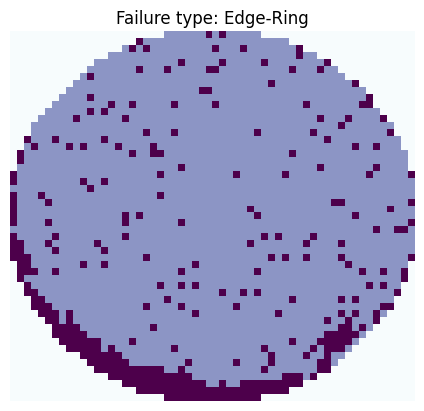

In [9]:
import matplotlib.pyplot as plt

# Pick one wafer (e.g., index 0)
wafer = data.iloc[100]['waferMap']
label = data.iloc[100]['failureType'][0][0]

plt.imshow(wafer, cmap='BuPu')   # Render as grayscale
plt.title(f"Failure type: {label}")
plt.axis("off")
plt.show()


In [10]:
unique_failure_types = failure_labels.unique()

print("Unique failure types:")
for label in unique_failure_types:
    print("-", label)

Unique failure types:
- none
- Loc
- Edge-Loc
- Center
- Edge-Ring
- Scratch
- Random
- Near-full
- Donut


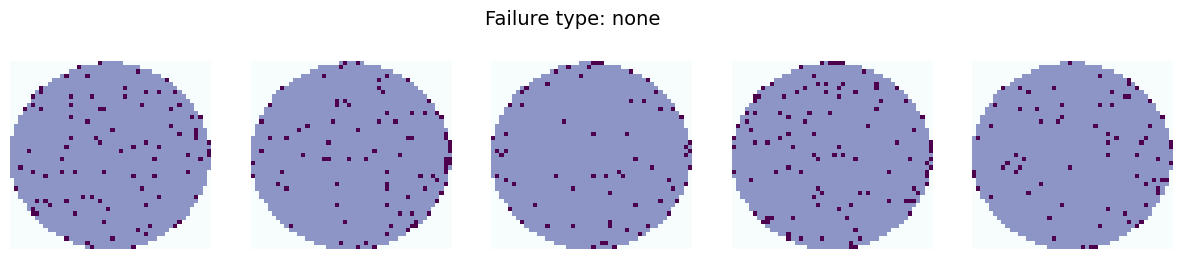

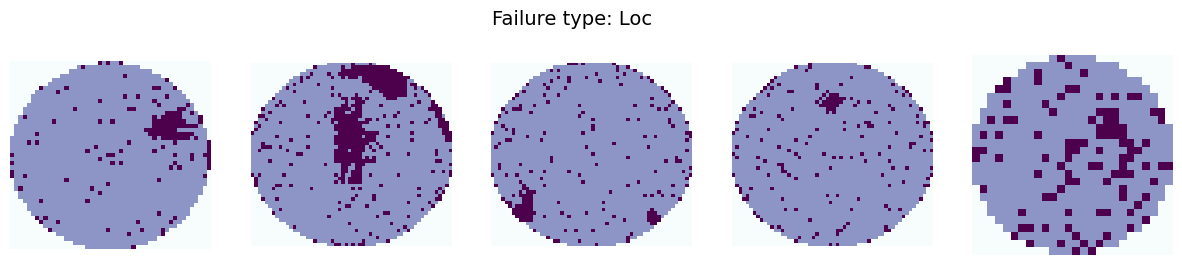

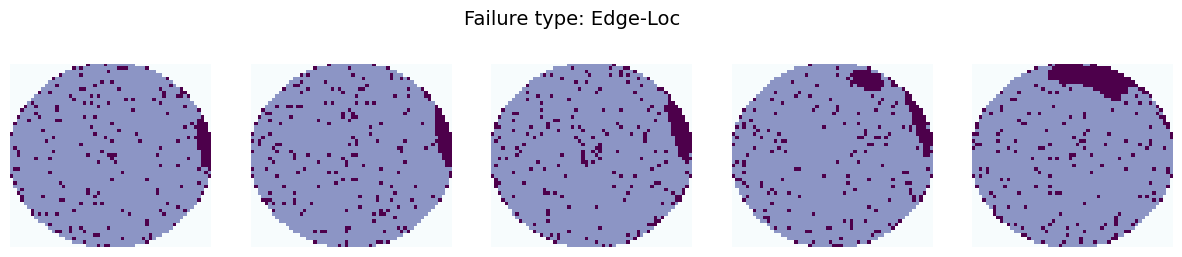

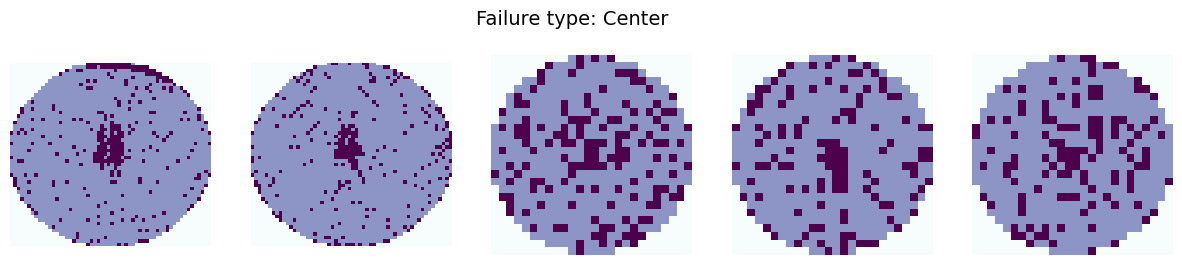

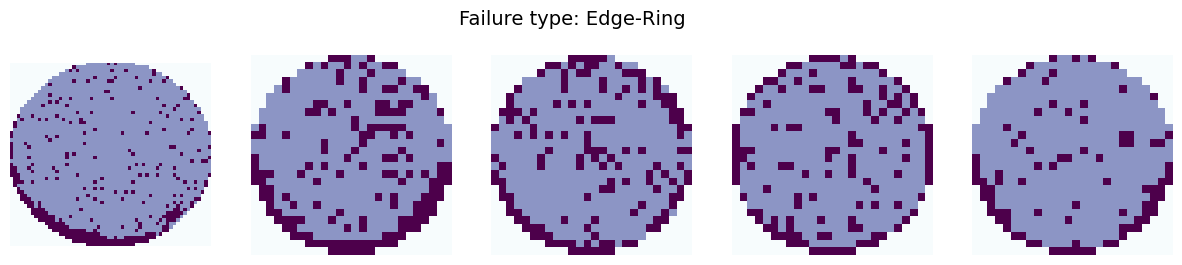

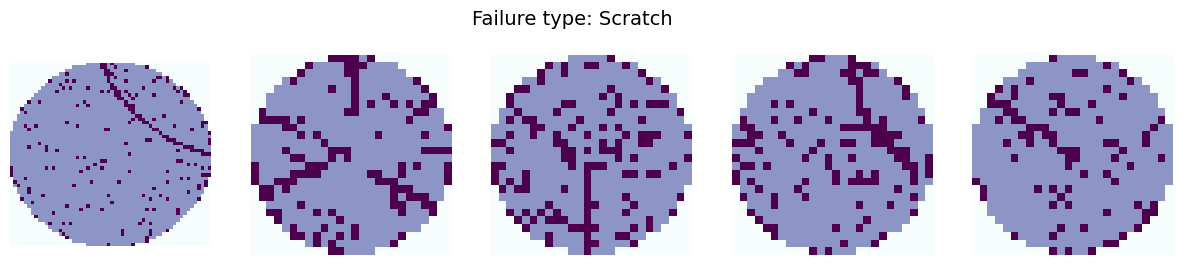

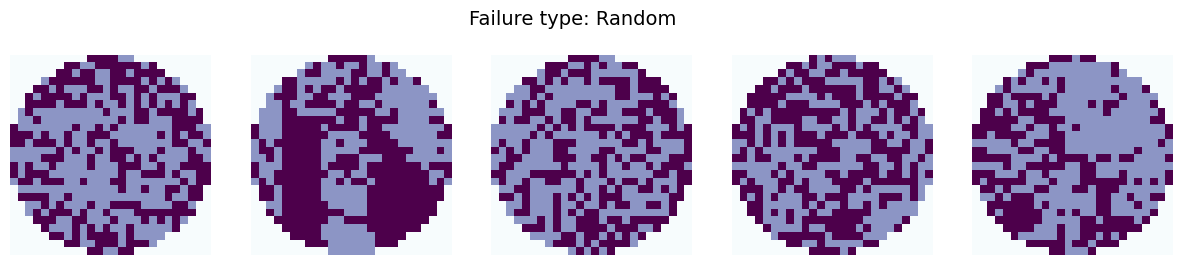

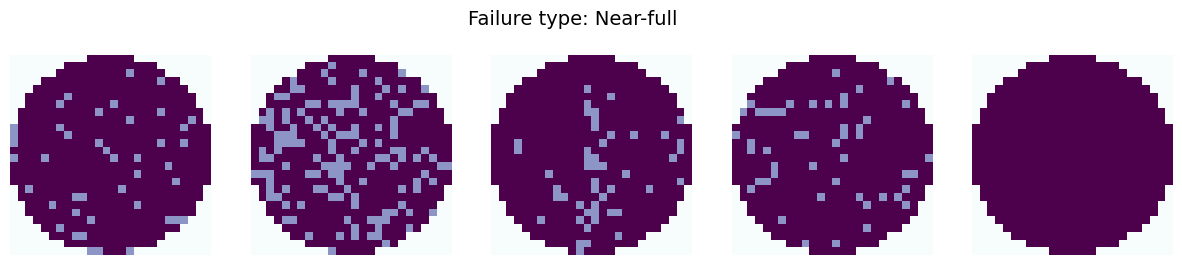

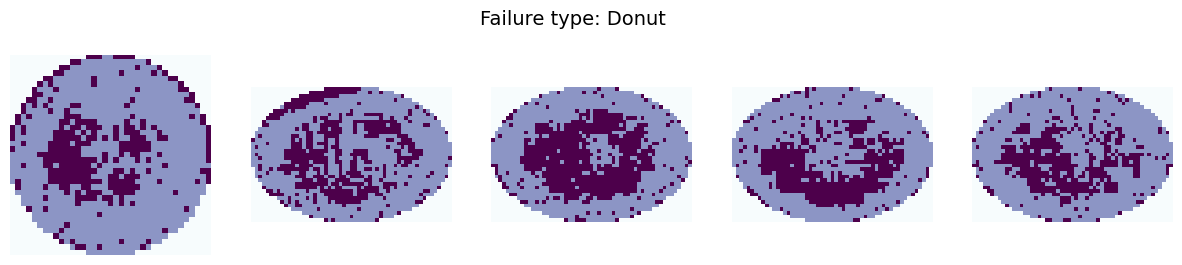

In [11]:
import matplotlib.pyplot as plt



for label in unique_failure_types:
    # Filter rows for this label
    subset = data[failure_labels == label]

    # Pick up to 5 samples
    num_samples = min(len(subset), 5)

    if num_samples == 0:
        continue

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    fig.suptitle(f"Failure type: {label}", fontsize=14)

    # Ensure axes is iterable (even if 1 sample)
    if num_samples == 1:
        axes = [axes]

    for i, ax in enumerate(axes):
        wafer = np.array(subset.iloc[i]['waferMap'])
        ax.imshow(wafer, cmap="BuPu")
        ax.axis("off")

    plt.show()

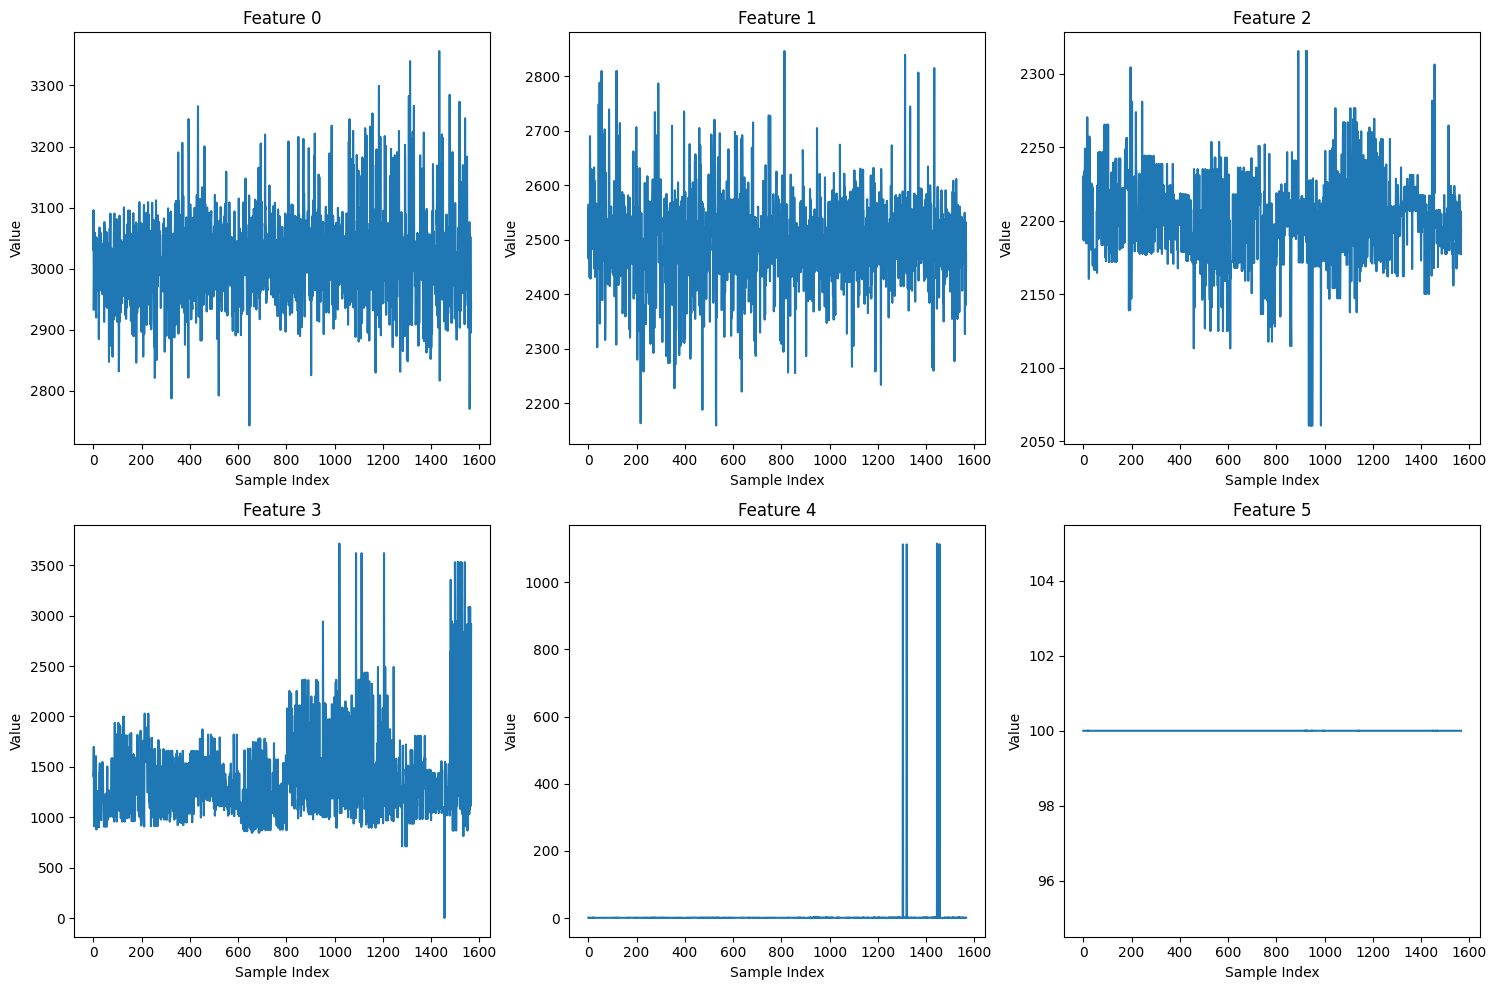

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


# Plot the data of the graph down to see what happens

def basic_line_plots(data, columns=None, figsize=(15, 10)):
    """Plot multiple features as line plots"""
    if columns is None:
        columns = data.columns[:6]  # First 6 columns by default

    fig, axes = plt.subplots(2, 3, figsize=figsize)
    axes = axes.ravel()

    for i, col in enumerate(columns):
        if i < len(axes):
            axes[i].plot(data[col])
            axes[i].set_title(f'Feature {col}')
            axes[i].set_xlabel('Sample Index')
            axes[i].set_ylabel('Value')

    plt.tight_layout()
    plt.show()

basic_line_plots(secom_data, ['0', '1', '2','3', '4', '5'])

In [13]:
import pandas as pd
import os

# The SECOM data was downloaded as 'uci-secom.csv' and its path is stored in path2_secom
# Use the correct file path instead of 'secom_data.txt'
secom_file_path = os.path.join(path2_secom, "uci-secom.csv")
output_file = 'secom_data_processed.csv' # Changed output filename to avoid confusion

# Read the data from the correct path, it's already in CSV format
# No need for delim_whitespace as it's a standard CSV
df = pd.read_csv(secom_file_path)

# Save as CSV with commas - this step seems redundant if the input is already CSV,
# but we'll keep it if you intended to perform some transformations here later.
# If not, this save step can be removed.
df.to_csv(output_file, index=False)

print(f"Read data from {secom_file_path}")
print(f"Saved a copy as {output_file}")

Read data from /kaggle/input/uci-semcom/uci-secom.csv
Saved a copy as secom_data_processed.csv


In [14]:
secom_file_path = os.path.join(path2_secom, "uci-secom.csv")
secom_data = pd.read_csv(secom_file_path)


print("The length of the file is ", len(secom_data))
print("Headers:", list(secom_data.columns)) # the heaers are numbeered and end have a pass/fail
# each header has hundredereds of sensors as we can see here


print(secom_data.head())

The length of the file is  1567
Headers: ['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '15

# This processes the SECOM dataset and replace all NaN values and Removes the time Stamp

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Use your existing secom_data variable (no file loading needed!)
print(f"Working with existing data shape: {secom_data.shape}")

# Step 1: Handle target variable properly
if 'Pass/Fail' in secom_data.columns:
    unique_vals = secom_data['Pass/Fail'].unique()

    if set(unique_vals) <= {'Pass', 'Fail'}:
        # Case: textual labels
        target = secom_data['Pass/Fail'].map({'Pass': 0, 'Fail': 1})  # Fixed: Pass=0, Fail=1
    else:
        # Case: already numeric (SECOM format: -1=Pass, 1=Fail)
        target = pd.to_numeric(secom_data['Pass/Fail'], errors='coerce')
        target = target.map({-1: 0, 1: 1})  # Convert to 0=Pass, 1=Fail

    features = secom_data.drop(columns=['Pass/Fail'])
else:
    features = secom_data.copy()
    target = None

print(f"Target unique values: {secom_data['Pass/Fail'].unique()}")
print(f"Target distribution:\n{pd.Series(target).value_counts()}")

# Step 2: Remove time column
if 'Time' in features.columns:
    features = features.drop(columns=['Time'])
    print(f"Dropped Time column. New shape: {features.shape}")

# Step 3: Select numeric columns only
features = features.select_dtypes(include=[np.number])
print(f"After selecting numeric columns: {features.shape}")
print(f"NaN values before imputation: {features.isnull().sum().sum()}")



# Step 4: Smart median imputation
def smart_median_imputation(features):
    """Enhanced median imputation for manufacturing sensor data"""

    print("Computing correlations for smart imputation")
    # Group sensors by correlation for smarter imputation
    correlation_matrix = features.corr().abs()

    imputed_features = features.copy()
    columns_with_nan = features.columns[features.isnull().any()].tolist()

    print(f"Imputing {len(columns_with_nan)} columns with missing values...")

    for column in columns_with_nan:
        if features[column].isnull().sum() > 0:
            # Find most correlated sensors
            correlations = correlation_matrix[column].sort_values(ascending=False)
            similar_sensors = correlations.index[1:11]  # Top 10  similar sensors

            # Use median of similar sensors if available
            median_used = False
            for similar_sensor in similar_sensors:
                if not features[similar_sensor].isnull().all():
                    median_val = features[similar_sensor].median()
                    imputed_features[column].fillna(median_val, inplace=True)
                    median_used = True
                    break

            # Fallback to overall median
            if not median_used:
                imputed_features[column].fillna(features[column].median(), inplace=True)

    return imputed_features

# Apply smart imputation
features_imputed = smart_median_imputation(features)  # Fixed variable name

# Step 5: Verify imputation worked
print(f"NaN values after imputation: {features_imputed.isnull().sum().sum()}")

# Step 6: Remove constant columns
print("\nRemoving constant columns...")
feature_std = features_imputed.std()
constant_columns = feature_std[feature_std < 1e-8].index
features_filtered = features_imputed.drop(columns=constant_columns)

print(f"Removed {len(constant_columns)} constant columns")
print(f"Final features shape: {features_filtered.shape}")

# Step 7: Standardization
print("\nApplying StandardScaler")
scaler = StandardScaler()
secom_scaled_data = scaler.fit_transform(features_filtered)

# Convert back to DataFrame
secom_scaled_df = pd.DataFrame(
    secom_scaled_data,
    columns=features_filtered.columns,
    index=features_filtered.index
)


# Step 8: Final validation
print("\n=== FINAL PREPROCESSING RESULTS ===")
print(f"Standardization - Mean: {secom_scaled_data.mean():.6f}, Std: {secom_scaled_data.std():.6f}")
print(f"Data range: [{secom_scaled_data.min():.2f}, {secom_scaled_data.max():.2f}]")
print(f"Final data shape: {secom_scaled_df.shape}")
print(f"Target shape: {target.shape if target is not None else 'None'}")

# Check success
if abs(secom_scaled_data.mean()) < 0.01 and abs(secom_scaled_data.std() - 1.0) < 0.01:
    print("✅ PREPROCESSING SUCCESSFUL!")
else:
    print("❌ Issues with preprocessing")

print("\nFirst few rows of processed data:")
print(secom_scaled_df.head())

# Save processed data for later use
print(f"\nProcessed SECOM features: secom_scaled_df {secom_scaled_df.shape}")
print(f"Processed target variable: target {len(target) if target is not None else 'None'}")

Working with existing data shape: (1567, 592)
Target unique values: [-1  1]
Target distribution:
Pass/Fail
0    1463
1     104
Name: count, dtype: int64
Dropped Time column. New shape: (1567, 590)
After selecting numeric columns: (1567, 590)
NaN values before imputation: 41951
Computing correlations for smart imputation
Imputing 538 columns with missing values...
NaN values after imputation: 0

Removing constant columns...
Removed 0 constant columns
Final features shape: (1567, 590)

Applying StandardScaler

=== FINAL PREPROCESSING RESULTS ===
Standardization - Mean: -0.000000, Std: 1.000000
Data range: [-38.78, 39.57]
Final data shape: (1567, 590)
Target shape: (1567,)
✅ PREPROCESSING SUCCESSFUL!

First few rows of processed data:
          0         1         2         3         4         5         6  \
0  0.140098  0.429755 -0.050946  0.057698 -0.049923 -0.094946 -0.126159   
1  0.464561 -0.106152  0.418155  0.172867 -0.059387 -0.094946 -0.083774   
2 -0.351824  0.407746 -0.065476  

In [ ]:
#pip install scipy==1.11.4


Combine iwht the wafer data set

# Now we will combine our data randomly and do Train/Test/Validation

In [16]:
%pip install --upgrade scipy>=1.11.1

In [17]:
# Run this cell to define secom_scaled_df before running the sensor identification code.
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Use your existing secom_data variable (no file loading needed!)
print(f"Working with existing data shape: {secom_data.shape}")

# Step 1: Handle target variable properly
if 'Pass/Fail' in secom_data.columns:
    unique_vals = secom_data['Pass/Fail'].unique()

    if set(unique_vals) <= {'Pass', 'Fail'}:
        # Case: textual labels
        target = secom_data['Pass/Fail'].map({'Pass': 0, 'Fail': 1})  # Fixed: Pass=0, Fail=1
    else:
        # Case: already numeric (SECOM format: -1=Pass, 1=Fail)
        target = pd.to_numeric(secom_data['Pass/Fail'], errors='coerce')
        target = target.map({-1: 0, 1: 1})  # Convert to 0=Pass, 1=Fail

    features = secom_data.drop(columns=['Pass/Fail'])
else:
    features = secom_data.copy()
    target = None

print(f"Target unique values: {secom_data['Pass/Fail'].unique()}")
print(f"Target distribution:\n{pd.Series(target).value_counts()}")

# Step 2: Remove time column
if 'Time' in features.columns:
    features = features.drop(columns=['Time'])
    print(f"Dropped Time column. New shape: {features.shape}")

# Step 3: Select numeric columns only
features = features.select_dtypes(include=[np.number])
print(f"After selecting numeric columns: {features.shape}")
print(f"NaN values before imputation: {features.isnull().sum().sum()}")



# Step 4: Smart median imputation
def smart_median_imputation(features):
    """Enhanced median imputation for manufacturing sensor data"""

    print("Computing correlations for smart imputation")
    # Group sensors by correlation for smarter imputation
    correlation_matrix = features.corr().abs()

    imputed_features = features.copy()
    columns_with_nan = features.columns[features.isnull().any()].tolist()

    print(f"Imputing {len(columns_with_nan)} columns with missing values...")

    for column in columns_with_nan:
        if features[column].isnull().sum() > 0:
            # Find most correlated sensors
            correlations = correlation_matrix[column].sort_values(ascending=False)
            similar_sensors = correlations.index[1:11]  # Top 10  similar sensors

            # Use median of similar sensors if available
            median_used = False
            for similar_sensor in similar_sensors:
                if not features[similar_sensor].isnull().all():
                    median_val = features[similar_sensor].median()
                    imputed_features[column].fillna(median_val, inplace=True)
                    median_used = True
                    break

            # Fallback to overall median
            if not median_used:
                imputed_features[column].fillna(features[column].median(), inplace=True)

    return imputed_features

# Apply smart imputation
features_imputed = smart_median_imputation(features)  # Fixed variable name

# Step 5: Verify imputation worked
print(f"NaN values after imputation: {features_imputed.isnull().sum().sum()}")

# Step 6: Remove constant columns
print("\nRemoving constant columns...")
feature_std = features_imputed.std()
constant_columns = feature_std[feature_std < 1e-8].index
features_filtered = features_imputed.drop(columns=constant_columns)

print(f"Removed {len(constant_columns)} constant columns")
print(f"Final features shape: {features_filtered.shape}")

# Step 7: Standardization
print("\nApplying StandardScaler")
scaler = StandardScaler()
secom_scaled_data = scaler.fit_transform(features_filtered)

# Convert back to DataFrame
secom_scaled_df = pd.DataFrame(
    secom_scaled_data,
    columns=features_filtered.columns,
    index=features_filtered.index
)


# Step 8: Final validation
print("\n=== FINAL PREPROCESSING RESULTS ===")
print(f"Standardization - Mean: {secom_scaled_data.mean():.6f}, Std: {secom_scaled_data.std():.6f}")
print(f"Data range: [{secom_scaled_data.min():.2f}, {secom_scaled_data.max():.2f}]")
print(f"Final data shape: {secom_scaled_df.shape}")
print(f"Target shape: {target.shape if target is not None else 'None'}")

# Check success
if abs(secom_scaled_data.mean()) < 0.01 and abs(secom_scaled_data.std() - 1.0) < 0.01:
    print("✅ PREPROCESSING SUCCESSFUL!")
else:
    print("❌ Issues with preprocessing")

print("\nFirst few rows of processed data:")
print(secom_scaled_df.head())

# Save processed data for later use
print(f"\nProcessed SECOM features: secom_scaled_df {secom_scaled_df.shape}")
print(f"Processed target variable: target {len(target) if target is not None else 'None'}")


# Step 9: Save processed data to CSV
output_df = secom_scaled_df.copy()
if target is not None:
    output_df['Pass/Fail'] = target.values  # Append target as a column

output_csv_path = "secom_processed_data.csv"
output_df.to_csv(output_csv_path, index=True)  # index=True to keep original row indices

print(f"\n✅ Processed data saved to '{output_csv_path}'")

Working with existing data shape: (1567, 592)
Target unique values: [-1  1]
Target distribution:
Pass/Fail
0    1463
1     104
Name: count, dtype: int64
Dropped Time column. New shape: (1567, 590)
After selecting numeric columns: (1567, 590)
NaN values before imputation: 41951
Computing correlations for smart imputation
Imputing 538 columns with missing values...
NaN values after imputation: 0

Removing constant columns...
Removed 0 constant columns
Final features shape: (1567, 590)

Applying StandardScaler

=== FINAL PREPROCESSING RESULTS ===
Standardization - Mean: -0.000000, Std: 1.000000
Data range: [-38.78, 39.57]
Final data shape: (1567, 590)
Target shape: (1567,)
✅ PREPROCESSING SUCCESSFUL!

First few rows of processed data:
          0         1         2         3         4         5         6  \
0  0.140098  0.429755 -0.050946  0.057698 -0.049923 -0.094946 -0.126159   
1  0.464561 -0.106152  0.418155  0.172867 -0.059387 -0.094946 -0.083774   
2 -0.351824  0.407746 -0.065476  

Starting improved sensor identification...
IMPROVED SENSOR TYPE IDENTIFICATION

1. Analyzing sensor patterns...
Analyzing 590 sensors...
  Progress: 0/590
  Progress: 50/590
  Progress: 100/590
  Progress: 150/590
  Progress: 200/590
  Progress: 250/590
  Progress: 300/590
  Progress: 350/590
  Progress: 400/590
  Progress: 450/590
  Progress: 500/590
  Progress: 550/590

Initial Distribution:
  PRESSURE: 270 (45.8%)
  FLOW_RATE: 169 (28.6%)
  INACTIVE: 116 (19.7%)
  ENDPOINT: 19 (3.2%)
  TEMPERATURE: 6 (1.0%)
  STATUS: 6 (1.0%)
  OTHER: 3 (0.5%)
  VOLTAGE_BIAS: 1 (0.2%)

Adjusted Distribution:
  PRESSURE: 221 (37.5%)
  FLOW_RATE: 188 (31.9%)
  INACTIVE: 93 (15.8%)
  OTHER: 42 (7.1%)
  ENDPOINT: 19 (3.2%)
  POWER_RF: 14 (2.4%)
  TEMPERATURE: 6 (1.0%)
  STATUS: 6 (1.0%)
  VOLTAGE_BIAS: 1 (0.2%)

2. Creating sensor mapping...

✅ Sensor mapping saved to improved_sensor_mapping.csv

Sensor Groups Summary:
  GAS_DELIVERY: 188 sensors
    - FLOW_RATE: 188
  PLASMA: 15 sensors
    - POWER_RF:

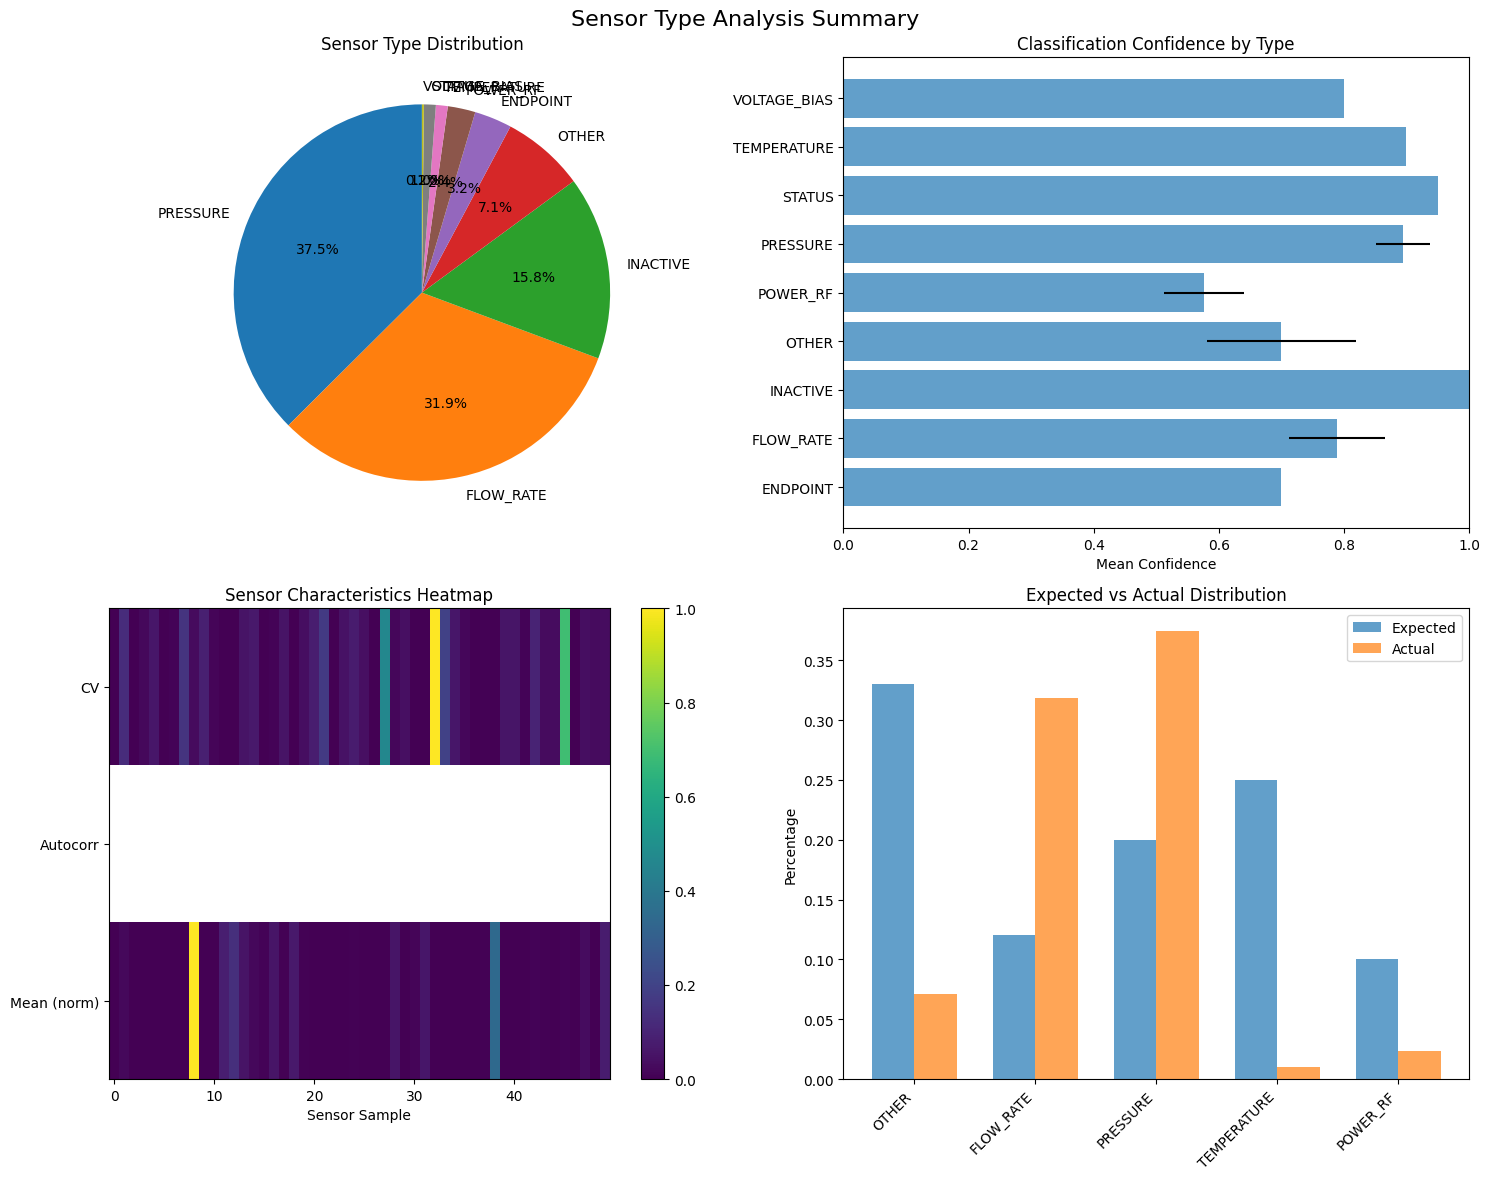


FINAL SENSOR DISTRIBUTION

PRESSURE: 221 sensors (37.5%)
  High confidence examples:
    - Sensor 8: conf=0.90
    - Sensor 14: conf=0.90
    - Sensor 16: conf=0.90

FLOW_RATE: 188 sensors (31.9%)
  High confidence examples:
    - Sensor 3: conf=0.85
    - Sensor 4: conf=0.85
    - Sensor 10: conf=0.85

INACTIVE: 93 sensors (15.8%)
  High confidence examples:
    - Sensor 13: conf=1.00
    - Sensor 42: conf=1.00
    - Sensor 49: conf=1.00

OTHER: 42 sensors (7.1%)
  High confidence examples:
    - Sensor 378: conf=0.80
    - Sensor 379: conf=0.80
    - Sensor 380: conf=0.80

ENDPOINT: 19 sensors (3.2%)

POWER_RF: 14 sensors (2.4%)
  High confidence examples:
    - Sensor 5: conf=0.80

TEMPERATURE: 6 sensors (1.0%)
  High confidence examples:
    - Sensor 0: conf=0.90
    - Sensor 55: conf=0.90
    - Sensor 90: conf=0.90

STATUS: 6 sensors (1.0%)
  High confidence examples:
    - Sensor 74: conf=0.95
    - Sensor 206: conf=0.95
    - Sensor 209: conf=0.95

VOLTAGE_BIAS: 1 sensors (0.2%

In [18]:
"""
IMPROVED SENSOR TYPE IDENTIFICATION FOR SEMICONDUCTOR MANUFACTURING
===================================================================
Based on actual SECOM data analysis and typical fab sensor distributions
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, signal
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

class ImprovedSensorIdentifier:
    """
    Realistic sensor type identification for semiconductor manufacturing
    Based on typical fab sensor distributions and actual data patterns
    """

    def __init__(self, secom_data):
        self.data = secom_data
        self.sensor_profiles = {}
        self.sensor_labels = {}
        self.analysis_results = None

        # Expected distribution in semiconductor fab
        self.expected_distribution = {
            'TEMPERATURE': (0.20, 0.30),  # 20-30%
            'PRESSURE': (0.15, 0.25),      # 15-25%
            'FLOW_RATE': (0.10, 0.15),     # 10-15%
            'POWER_RF': (0.08, 0.12),      # 8-12%
            'VOLTAGE_BIAS': (0.05, 0.08),  # 5-8%
            'POSITION': (0.03, 0.08),      # 3-8%
            'PARTICLE_COUNT': (0.03, 0.05), # 3-5%
            'CHEMICAL_CONC': (0.03, 0.08), # 3-8%
            'HUMIDITY': (0.02, 0.04),      # 2-4%
            'VIBRATION': (0.02, 0.05),     # 2-5%
            'ENDPOINT': (0.02, 0.05),      # 2-5%
            'STATUS': (0.05, 0.10),        # 5-10%
            'INACTIVE': (0.05, 0.15)       # 5-15%
        }

    def analyze_sensor(self, sensor_name):
        """Enhanced sensor analysis with semiconductor-specific patterns"""
        data = self.data[sensor_name].dropna()

        if len(data) < 10:
            return {'sensor': sensor_name, 'type': 'INACTIVE', 'confidence': 1.0}

        # Basic statistics
        mean = data.mean()
        std = data.std()
        cv = std / (abs(mean) + 1e-10)
        min_val = data.min()
        max_val = data.max()
        range_val = max_val - min_val

        # Distribution characteristics
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)

        # Temporal characteristics
        autocorr_1 = data.autocorr(lag=1) if len(data) > 1 else 0
        autocorr_10 = data.autocorr(lag=10) if len(data) > 10 else 0

        # Change characteristics
        changes = np.diff(data)
        if len(changes) > 0:
            mean_abs_change = np.mean(np.abs(changes))
            change_rate = mean_abs_change / (std + 1e-10)
        else:
            mean_abs_change = 0
            change_rate = 0

        # Unique values
        n_unique = data.nunique()
        unique_ratio = n_unique / len(data)

        # Check for specific patterns
        is_binary = n_unique <= 2
        is_discrete = 2 < n_unique <= 10
        is_constant = range_val < 1e-10 or n_unique == 1

        # Periodicity check
        has_periodic = False
        if len(data) > 50:
            try:
                fft = np.abs(np.fft.fft(data.values))
                freqs = np.fft.fftfreq(len(data))
                # Exclude DC component
                peaks = signal.find_peaks(fft[1:len(fft)//2],
                                        height=np.max(fft[1:len(fft)//2])*0.3)[0]
                has_periodic = len(peaks) > 0
            except:
                has_periodic = False

        # Determine sensor type based on patterns
        sensor_type, confidence = self._classify_sensor_type(
            mean, std, cv, min_val, max_val, range_val,
            autocorr_1, autocorr_10, skewness, kurtosis,
            n_unique, unique_ratio, is_binary, is_discrete,
            is_constant, has_periodic, change_rate
        )

        return {
            'sensor': sensor_name,
            'type': sensor_type,
            'confidence': confidence,
            'mean': mean,
            'std': std,
            'cv': cv,
            'range': range_val,
            'autocorr_1': autocorr_1,
            'n_unique': n_unique
        }

    def _classify_sensor_type(self, mean, std, cv, min_val, max_val, range_val,
                             autocorr_1, autocorr_10, skewness, kurtosis,
                             n_unique, unique_ratio, is_binary, is_discrete,
                             is_constant, has_periodic, change_rate):
        """
        Improved classification logic based on semiconductor manufacturing patterns
        """

        # Check for inactive/constant first
        if is_constant or (range_val < 1e-6 and cv < 1e-6):
            return 'INACTIVE', 1.0

        # Binary status sensors
        if is_binary:
            return 'STATUS', 0.95

        # Position/stepper sensors (discrete values)
        if is_discrete and autocorr_1 > 0.8:
            return 'POSITION', 0.85

        # Temperature sensors - multiple patterns
        temp_score = 0
        # Pattern 1: Very stable, high autocorrelation (chamber temps)
        if cv < 0.05 and autocorr_1 > 0.7:
            temp_score += 3
        # Pattern 2: Typical process temps (20-400°C range)
        if 15 < mean < 500 and cv < 0.2 and autocorr_1 > 0.5:
            temp_score += 3
        # Pattern 3: High temp processes (RTP, furnace: 400-1200°C)
        if 400 < mean < 1500 and cv < 0.15:
            temp_score += 2
        # Pattern 4: Chiller temps (-20 to 50°C)
        if -30 < mean < 60 and cv < 0.1 and autocorr_1 > 0.6:
            temp_score += 2
        # Pattern 5: Very high stable values (could be Kelvin scale)
        if mean > 2500 and cv < 0.05:
            temp_score += 3

        if temp_score >= 3:
            return 'TEMPERATURE', min(0.95, 0.3 * temp_score)

        # Pressure sensors - vacuum and atmospheric
        pressure_score = 0
        # Pattern 1: Atmospheric pressure range (700-800 Torr)
        if 600 < mean < 900 and cv < 0.3:
            pressure_score += 3
        # Pattern 2: Process chamber pressure (0.001-100 Torr)
        if 0.0001 < mean < 100 and cv > 0.05 and cv < 1.5:
            pressure_score += 3
        # Pattern 3: Moderate autocorrelation (pressure changes slowly)
        if 0.3 < autocorr_1 < 0.8 and cv < 1:
            pressure_score += 1
        # Pattern 4: Typical pressure sensor behavior
        if mean > 0 and cv > 0.1 and cv < 0.8 and not has_periodic:
            pressure_score += 1

        if pressure_score >= 2:
            return 'PRESSURE', min(0.9, 0.35 * pressure_score)

        # Flow rate sensors (MFCs)
        flow_score = 0
        # Pattern 1: Typical MFC ranges (0-500 sccm)
        if 0 < mean < 500 and cv > 0.15 and cv < 2:
            flow_score += 3
        # Pattern 2: High flow (0-5000 slm)
        if 0 < mean < 5000 and cv > 0.2 and change_rate > 0.1:
            flow_score += 2
        # Pattern 3: Periodic patterns (pulsed gas delivery)
        if has_periodic and mean > 0:
            flow_score += 2
        # Pattern 4: Moderate variability with positive values
        if mean > 0 and 0.2 < cv < 3 and autocorr_1 < 0.7:
            flow_score += 1

        if flow_score >= 2:
            return 'FLOW_RATE', min(0.85, 0.35 * flow_score)

        # RF Power sensors
        rf_score = 0
        # Pattern 1: Typical RF power range (0-5000W)
        if 0 < mean < 5000 and cv < 0.3 and autocorr_1 > 0.6:
            rf_score += 3
        # Pattern 2: Pulsed RF (periodic)
        if has_periodic and 0 < mean < 10000:
            rf_score += 2
        # Pattern 3: Stable power with some variation
        if mean > 100 and cv < 0.2 and autocorr_1 > 0.7:
            rf_score += 1

        if rf_score >= 2:
            return 'POWER_RF', min(0.85, 0.4 * rf_score)

        # Voltage/Bias sensors
        voltage_score = 0
        # Pattern 1: DC bias voltage (-1000 to 1000V)
        if -1500 < mean < 1500 and abs(mean) > 10 and cv < 0.3:
            voltage_score += 3
        # Pattern 2: Can be negative, stable
        if min_val < 0 and cv < 0.2 and autocorr_1 > 0.7:
            voltage_score += 1

        if voltage_score >= 2:
            return 'VOLTAGE_BIAS', min(0.8, 0.4 * voltage_score)

        # Particle count sensors
        particle_score = 0
        # Pattern 1: Non-negative, right-skewed (Poisson-like)
        if min_val >= 0 and skewness > 1 and mean < 1000:
            particle_score += 3
        # Pattern 2: Integer-like values with high variability
        if min_val >= 0 and cv > 0.5 and kurtosis > 1:
            particle_score += 2
        # Pattern 3: Low counts with occasional spikes
        if 0 <= mean < 100 and max_val > mean * 5:
            particle_score += 2

        if particle_score >= 2:
            return 'PARTICLE_COUNT', min(0.8, 0.35 * particle_score)

        # Chemical concentration sensors
        chem_score = 0
        # Pattern 1: Percentage range (0-100)
        if 0 <= min_val and max_val <= 100 and cv < 0.3:
            chem_score += 3
        # Pattern 2: PPM range with slow changes
        if 0 < mean < 1000 and autocorr_1 > 0.7 and cv < 0.5:
            chem_score += 2

        if chem_score >= 2:
            return 'CHEMICAL_CONC', min(0.8, 0.4 * chem_score)

        # Humidity sensors
        if 0 <= min_val <= max_val <= 100 and autocorr_1 > 0.8 and cv < 0.3:
            return 'HUMIDITY', 0.85

        # Endpoint detection sensors
        if cv > 0.3 and has_periodic and change_rate > 0.2:
            return 'ENDPOINT', 0.7

        # Vibration sensors (last resort - should be rare)
        if autocorr_1 < 0.3 and cv > 0.5 and change_rate > 0.5:
            return 'VIBRATION', 0.6

        # Default to OTHER for uncategorized
        return 'OTHER', 0.5

    def analyze_all_sensors(self, verbose=True):
        """Analyze all sensors with improved categorization"""
        results = []

        sensor_columns = [col for col in self.data.columns
                         if col not in ['Pass/Fail', 'Time']]

        if verbose:
            print(f"Analyzing {len(sensor_columns)} sensors...")

        for i, sensor in enumerate(sensor_columns):
            if verbose and i % 50 == 0:
                print(f"  Progress: {i}/{len(sensor_columns)}")

            analysis = self.analyze_sensor(sensor)
            results.append(analysis)

        self.analysis_results = pd.DataFrame(results)

        # Apply distribution balancing
        self._balance_distribution()

        return self.analysis_results

    def _balance_distribution(self):
        """
        Adjust classifications to match expected fab distribution
        """
        if self.analysis_results is None:
            return

        # Count current distribution
        type_counts = self.analysis_results['type'].value_counts()
        total_sensors = len(self.analysis_results)

        print("\nInitial Distribution:")
        for sensor_type, count in type_counts.items():
            pct = count / total_sensors * 100
            print(f"  {sensor_type}: {count} ({pct:.1f}%)")

        # Identify sensors that need reclassification
        reclassify_candidates = []

        # Find over-represented types
        for sensor_type in type_counts.index:
            if sensor_type in self.expected_distribution:
                expected_max = self.expected_distribution[sensor_type][1]
                current_pct = type_counts[sensor_type] / total_sensors

                if current_pct > expected_max:
                    # Get low-confidence sensors of this type
                    type_sensors = self.analysis_results[
                        self.analysis_results['type'] == sensor_type
                    ].sort_values('confidence')

                    # Mark bottom 20% for potential reclassification
                    n_to_reclassify = int(len(type_sensors) * 0.2)
                    reclassify_candidates.extend(
                        type_sensors.head(n_to_reclassify).index.tolist()
                    )

        # Reclassify candidates based on secondary patterns
        for idx in reclassify_candidates:
            sensor_data = self.analysis_results.loc[idx]

            # Try to find better classification
            new_type = self._find_alternative_classification(sensor_data)
            if new_type:
                self.analysis_results.loc[idx, 'type'] = new_type
                self.analysis_results.loc[idx, 'confidence'] *= 0.8  # Reduce confidence

        # Final distribution
        print("\nAdjusted Distribution:")
        final_counts = self.analysis_results['type'].value_counts()
        for sensor_type, count in final_counts.items():
            pct = count / total_sensors * 100
            print(f"  {sensor_type}: {count} ({pct:.1f}%)")

    def _find_alternative_classification(self, sensor_data):
        """Find alternative classification for a sensor"""
        # Based on sensor characteristics, suggest alternative type

        cv = sensor_data['cv']
        mean = sensor_data['mean']
        autocorr = sensor_data['autocorr_1']

        # Priority order for reclassification
        if cv < 0.1 and autocorr > 0.6:
            return 'TEMPERATURE'
        elif mean > 0 and cv < 0.5 and autocorr > 0.4:
            return 'PRESSURE'
        elif mean > 0 and cv > 0.2:
            return 'FLOW_RATE'
        elif abs(mean) > 10:
            return 'POWER_RF'
        else:
            return 'OTHER'

    def create_sensor_mapping(self, save_path='sensor_mapping.csv'):
        """Create final sensor mapping with types and confidence"""
        if self.analysis_results is None:
            self.analyze_all_sensors()

        # Create mapping dataframe
        mapping = self.analysis_results[['sensor', 'type', 'confidence']].copy()
        mapping = mapping.sort_values(['type', 'confidence'], ascending=[True, False])

        # Add sensor groups for better organization
        mapping['group'] = mapping['type'].map({
            'TEMPERATURE': 'THERMAL',
            'PRESSURE': 'VACUUM',
            'FLOW_RATE': 'GAS_DELIVERY',
            'POWER_RF': 'PLASMA',
            'VOLTAGE_BIAS': 'PLASMA',
            'PARTICLE_COUNT': 'CONTAMINATION',
            'CHEMICAL_CONC': 'CHEMISTRY',
            'HUMIDITY': 'ENVIRONMENT',
            'VIBRATION': 'MECHANICAL',
            'ENDPOINT': 'PROCESS_CONTROL',
            'POSITION': 'MECHANICAL',
            'STATUS': 'SYSTEM',
            'INACTIVE': 'SYSTEM',
            'OTHER': 'UNCATEGORIZED'
        })

        # Save mapping
        mapping.to_csv(save_path, index=False)
        print(f"\n✅ Sensor mapping saved to {save_path}")

        # Print summary by group
        print("\nSensor Groups Summary:")
        group_counts = mapping.groupby('group')['sensor'].count()
        for group, count in group_counts.items():
            print(f"  {group}: {count} sensors")

            # Show types in this group
            group_types = mapping[mapping['group'] == group]['type'].value_counts()
            for sensor_type, type_count in group_types.items():
                print(f"    - {sensor_type}: {type_count}")

        return mapping

    def visualize_sensor_distribution(self):
        """Create visualization of sensor type distribution"""
        if self.analysis_results is None:
            return

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # 1. Type distribution pie chart
        type_counts = self.analysis_results['type'].value_counts()
        axes[0, 0].pie(type_counts.values, labels=type_counts.index,
                      autopct='%1.1f%%', startangle=90)
        axes[0, 0].set_title('Sensor Type Distribution')

        # 2. Confidence distribution by type
        conf_by_type = self.analysis_results.pivot_table(
            values='confidence', index='type', aggfunc=['mean', 'std']
        ).round(3)

        types = conf_by_type.index
        means = conf_by_type['mean']['confidence'].values
        stds = conf_by_type['std']['confidence'].fillna(0).values

        axes[0, 1].barh(types, means, xerr=stds, alpha=0.7)
        axes[0, 1].set_xlabel('Mean Confidence')
        axes[0, 1].set_title('Classification Confidence by Type')
        axes[0, 1].set_xlim(0, 1)

        # 3. Sensor characteristics heatmap
        # Select subset of sensors for visualization
        sample_sensors = self.analysis_results.sample(min(50, len(self.analysis_results)))

        char_matrix = sample_sensors[['cv', 'autocorr_1', 'mean']].values
        char_matrix_norm = (char_matrix - char_matrix.min(axis=0)) / (
            char_matrix.max(axis=0) - char_matrix.min(axis=0) + 1e-10
        )

        im = axes[1, 0].imshow(char_matrix_norm.T, aspect='auto', cmap='viridis')
        axes[1, 0].set_yticks([0, 1, 2])
        axes[1, 0].set_yticklabels(['CV', 'Autocorr', 'Mean (norm)'])
        axes[1, 0].set_xlabel('Sensor Sample')
        axes[1, 0].set_title('Sensor Characteristics Heatmap')
        plt.colorbar(im, ax=axes[1, 0])

        # 4. Expected vs Actual distribution
        expected_ranges = {
            'TEMPERATURE': 0.25,
            'PRESSURE': 0.20,
            'FLOW_RATE': 0.12,
            'POWER_RF': 0.10,
            'OTHER': 0.33
        }

        actual_pct = type_counts / type_counts.sum()

        comparison_types = list(set(expected_ranges.keys()) & set(actual_pct.index))
        if comparison_types:
            x = np.arange(len(comparison_types))
            width = 0.35

            expected_vals = [expected_ranges.get(t, 0) for t in comparison_types]
            actual_vals = [actual_pct.get(t, 0) for t in comparison_types]

            axes[1, 1].bar(x - width/2, expected_vals, width, label='Expected', alpha=0.7)
            axes[1, 1].bar(x + width/2, actual_vals, width, label='Actual', alpha=0.7)
            axes[1, 1].set_xticks(x)
            axes[1, 1].set_xticklabels(comparison_types, rotation=45, ha='right')
            axes[1, 1].set_ylabel('Percentage')
            axes[1, 1].set_title('Expected vs Actual Distribution')
            axes[1, 1].legend()

        plt.suptitle('Sensor Type Analysis Summary', fontsize=16)
        plt.tight_layout()
        plt.show()

# ============================================
# USAGE
# ============================================

def run_improved_sensor_identification(secom_data):
    """Run the improved sensor identification system"""

    print("="*70)
    print("IMPROVED SENSOR TYPE IDENTIFICATION")
    print("="*70)

    # Initialize identifier
    identifier = ImprovedSensorIdentifier(secom_data)

    # Analyze all sensors
    print("\n1. Analyzing sensor patterns...")
    results = identifier.analyze_all_sensors(verbose=True)

    # Create and save mapping
    print("\n2. Creating sensor mapping...")
    mapping = identifier.create_sensor_mapping('improved_sensor_mapping.csv')

    # Visualize results
    print("\n3. Creating visualizations...")
    identifier.visualize_sensor_distribution()

    # Print detailed statistics
    print("\n" + "="*70)
    print("FINAL SENSOR DISTRIBUTION")
    print("="*70)

    type_counts = results['type'].value_counts()
    total = len(results)

    for sensor_type, count in type_counts.items():
        pct = count / total * 100

        # Get high confidence examples
        high_conf = results[
            (results['type'] == sensor_type) &
            (results['confidence'] > 0.7)
        ].nlargest(3, 'confidence')

        print(f"\n{sensor_type}: {count} sensors ({pct:.1f}%)")
        if len(high_conf) > 0:
            print("  High confidence examples:")
            for _, sensor in high_conf.iterrows():
                print(f"    - Sensor {sensor['sensor']}: conf={sensor['confidence']:.2f}")

    return identifier, results, mapping

# Run the analysis
print("Starting improved sensor identification...")
identifier, results, mapping = run_improved_sensor_identification(secom_data)

print("\n✅ Improved sensor identification complete!")
print("Check 'improved_sensor_mapping.csv' for the final sensor type assignments")
#print("\nUse these labels to enhance your CrossViT model with domain knowledge!")

In [19]:
# Create organized SECOM dataset with sensor type correlation
import pandas as pd
import numpy as np

def create_organized_secom_dataset(secom_scaled_df, secom_data):
    """
    Create SECOM dataset organized by sensor types with clear correlation

    Args:
        secom_scaled_df: Processed SECOM features (samples × sensors)
        secom_data: Original SECOM data (for sensor identification)

    Returns:
        organized_dataset: Dictionary with organized data and mappings
    """

    print("="*70)
    print("CREATING ORGANIZED SECOM DATASET BY SENSOR TYPES")
    print("="*70)

    # Step 1: Get sensor type mapping
    print("\n1. Creating sensor type mapping...")

    identifier = ImprovedSensorIdentifier(secom_data)
    sensor_results = identifier.analyze_all_sensors(verbose=False)

    # Create mapping dictionary
    sensor_type_map = {}
    sensor_confidence_map = {}

    for _, row in sensor_results.iterrows():
        sensor_name = row['sensor']
        sensor_type = row['type']
        confidence = row['confidence']

        # Handle different column naming conventions
        possible_names = [
            sensor_name,  # Original name
            sensor_name.replace('Sensor_', '') if 'Sensor_' in sensor_name else f"Sensor_{sensor_name}",
            sensor_name.replace('X', '') if sensor_name.startswith('X') else f"X{sensor_name}",
            str(sensor_name).replace('Sensor_', '') if 'Sensor_' in str(sensor_name) else sensor_name
        ]

        for name in possible_names:
            if name in secom_scaled_df.columns:
                sensor_type_map[name] = sensor_type
                sensor_confidence_map[name] = confidence
                break

    print(f"   ✅ Mapped {len(sensor_type_map)} sensors to types")

    # Step 2: Create column mapping with sensor types
    print("\n2. Creating enhanced column mapping...")

    # Get all columns from the processed data
    all_columns = secom_scaled_df.columns.tolist()

    # Create comprehensive column information
    column_info = []
    for i, col in enumerate(all_columns):
        sensor_type = sensor_type_map.get(col, 'UNKNOWN')
        confidence = sensor_confidence_map.get(col, 0.0)

        # Extract sensor number for sorting
        if col.isdigit():
            sensor_num = int(col)
        elif 'Sensor_' in str(col):
            try:
                sensor_num = int(str(col).replace('Sensor_', ''))
            except:
                sensor_num = i
        elif str(col).startswith('X') and str(col)[1:].isdigit():
            try:
                sensor_num = int(str(col)[1:])
            except:
                sensor_num = i
        else:
            sensor_num = i

        column_info.append({
            'original_index': i,
            'column_name': col,
            'sensor_number': sensor_num,
            'sensor_type': sensor_type,
            'confidence': confidence
        })

    # Create DataFrame for easy manipulation
    column_df = pd.DataFrame(column_info)

    # Step 3: Organize columns by sensor type
    print("\n3. Organizing columns by sensor type...")

    # Group by sensor type and sort within each type
    organized_columns = []
    sensor_type_ranges = {}

    # Get unique sensor types, sorted by frequency (most common first)
    type_counts = column_df['sensor_type'].value_counts()
    ordered_types = type_counts.index.tolist()

    current_index = 0
    for sensor_type in ordered_types:
        type_columns = column_df[column_df['sensor_type'] == sensor_type].copy()
        type_columns = type_columns.sort_values('sensor_number')

        # Record the range for this sensor type
        start_idx = current_index
        end_idx = current_index + len(type_columns) - 1
        sensor_type_ranges[sensor_type] = {
            'start': start_idx,
            'end': end_idx,
            'count': len(type_columns),
            'columns': type_columns['column_name'].tolist()
        }

        organized_columns.extend(type_columns['column_name'].tolist())
        current_index += len(type_columns)

    # Step 4: Create organized dataset
    print("\n4. Creating organized dataset...")

    # Reorder the SECOM data according to sensor types
    organized_features = secom_scaled_df[organized_columns].copy()

    # Create new column names that include sensor type information
    new_column_names = []
    type_column_mapping = {}

    for col in organized_columns:
        sensor_type = sensor_type_map.get(col, 'UNKNOWN')
        confidence = sensor_confidence_map.get(col, 0.0)

        # Create descriptive column name
        if col.isdigit():
            new_name = f"{col}_{sensor_type}"
        else:
            new_name = f"{col}_{sensor_type}"

        new_column_names.append(new_name)
        type_column_mapping[new_name] = {
            'original_name': col,
            'sensor_type': sensor_type,
            'confidence': confidence
        }

    # Create version with descriptive column names
    organized_features_labeled = organized_features.copy()
    organized_features_labeled.columns = new_column_names

    # Step 5: Create sensor type header mapping
    print("\n5. Creating sensor type headers...")

    # Create a mapping showing which columns belong to which sensor type
    type_headers = {}
    for sensor_type, info in sensor_type_ranges.items():
        start_col = info['start']
        end_col = info['end']
        count = info['count']

        type_headers[sensor_type] = {
            'column_range': f"Columns {start_col}-{end_col}",
            'count': count,
            'percentage': f"{(count/len(organized_columns)*100):.1f}%",
            'columns': info['columns']
        }

    # Step 6: Create summary tables
    print("\n6. Creating summary information...")

    # Sensor type summary
    type_summary = pd.DataFrame([
        {
            'sensor_type': stype,
            'count': sensor_type_ranges[stype]['count'],
            'percentage': type_headers[stype]['percentage'],
            'column_range': type_headers[stype]['column_range'],
            'start_index': sensor_type_ranges[stype]['start'],
            'end_index': sensor_type_ranges[stype]['end']
        }
        for stype in type_headers.keys()
    ])

    # Column mapping summary
    column_mapping = pd.DataFrame([
        {
            'new_index': i,
            'original_column': col,
            'new_column_name': new_col,
            'sensor_type': type_column_mapping[new_col]['sensor_type'],
            'confidence': type_column_mapping[new_col]['confidence']
        }
        for i, (col, new_col) in enumerate(zip(organized_columns, new_column_names))
    ])

    # Step 7: Package everything
    organized_dataset = {
        # Main datasets
        'features_organized': organized_features,  # Same column names, organized by type
        'features_labeled': organized_features_labeled,  # With sensor type in column names

        # Mappings and metadata
        'sensor_type_ranges': sensor_type_ranges,
        'type_headers': type_headers,
        'type_summary': type_summary,
        'column_mapping': column_mapping,
        'organized_columns': organized_columns,
        'new_column_names': new_column_names,

        # Quick access
        'columns_by_type': {stype: info['columns'] for stype, info in sensor_type_ranges.items()},
        'get_type_range': lambda stype: sensor_type_ranges.get(stype, {}),

        # Dataset info
        'shape': organized_features.shape,
        'n_types': len(sensor_type_ranges)
    }

    return organized_dataset

def display_organized_dataset_info(organized_dataset):
    """Display comprehensive information about the organized dataset"""

    print("\n" + "="*70)
    print("ORGANIZED SECOM DATASET SUMMARY")
    print("="*70)

    # Basic info
    print(f"📊 Dataset shape: {organized_dataset['shape']}")
    print(f"🏷️  Sensor types: {organized_dataset['n_types']}")

    # Show sensor type organization
    print(f"\n🔍 Sensor Type Organization:")
    type_summary = organized_dataset['type_summary']

    for _, row in type_summary.iterrows():
        print(f"   {row['sensor_type']:15} | Cols {row['start_index']:3d}-{row['end_index']:3d} | "
              f"{row['count']:3d} sensors ({row['percentage']})")

    # Show first few rows with type correlation
    print(f"\n📋 First 5 rows (showing sensor type correlation):")
    features_labeled = organized_dataset['features_labeled']
    print(features_labeled.head().to_string())

    # Show column mapping sample
    print(f"\n🗂️  Column mapping (first 10 entries):")
    column_mapping = organized_dataset['column_mapping']
    print(column_mapping.head(10)[['new_index', 'original_column', 'sensor_type', 'confidence']].to_string(index=False))

def show_sensor_type_sections(organized_dataset):
    """Show clear sections for each sensor type"""

    print(f"\n" + "="*70)
    print("SENSOR TYPE SECTIONS")
    print("="*70)

    features = organized_dataset['features_organized']

    for sensor_type, info in organized_dataset['sensor_type_ranges'].items():
        start_idx = info['start']
        end_idx = info['end']
        count = info['count']

        print(f"\n🔸 {sensor_type} ({count} sensors)")
        print(f"   Column indices: {start_idx} to {end_idx}")
        print(f"   Column names: {info['columns'][:5]}..." if count > 5 else f"   Column names: {info['columns']}")

        # Show sample data for this sensor type
        type_data = features.iloc[:3, start_idx:end_idx+1]
        print(f"   Sample data (first 3 rows):")
        print(f"   {type_data.to_string().replace(chr(10), chr(10) + '   ')}")

def save_organized_dataset(organized_dataset, prefix='organized_secom'):
    """Save the organized dataset and mappings"""

    print(f"\n💾 Saving organized dataset...")

    # Save main datasets
    organized_dataset['features_organized'].to_csv(f'{prefix}_features.csv', index=False)
    organized_dataset['features_labeled'].to_csv(f'{prefix}_features_labeled.csv', index=False)

    # Save mappings
    organized_dataset['type_summary'].to_csv(f'{prefix}_type_summary.csv', index=False)
    organized_dataset['column_mapping'].to_csv(f'{prefix}_column_mapping.csv', index=False)

    print(f"   ✅ {prefix}_features.csv - Main dataset (organized by type)")
    print(f"   ✅ {prefix}_features_labeled.csv - Dataset with type labels in column names")
    print(f"   ✅ {prefix}_type_summary.csv - Sensor type summary")
    print(f"   ✅ {prefix}_column_mapping.csv - Complete column mapping")

# Main execution function
def main_organize_secom():
    """Main function to create organized SECOM dataset"""

    print("Creating organized SECOM dataset by sensor types...")

    # Create organized dataset
    organized_data = create_organized_secom_dataset(secom_scaled_df, secom_data)

    # Display information
    display_organized_dataset_info(organized_data)

    # Show sensor type sections
    show_sensor_type_sections(organized_data)

    # Save datasets
    save_organized_dataset(organized_data)

    print(f"\n✅ Organized SECOM dataset created successfully!")
    print(f"   📊 Features organized by sensor type")
    print(f"   🏷️  Clear correlation between columns and sensor types")
    print(f"   📁 Multiple formats saved for different use cases")

    return organized_data

# Example usage
def example_access_organized_data(organized_data):
    """Show how to access the organized data"""

    print(f"\n" + "="*50)
    print("HOW TO ACCESS ORGANIZED DATA")
    print("="*50)

    # Main dataset
    X = organized_data['features_organized']
    print(f"📊 Main dataset: {X.shape}")

    # Access specific sensor types
    temp_range = organized_data['get_type_range']('TEMPERATURE')
    if temp_range:
        start, end = temp_range['start'], temp_range['end']
        X_temp = X.iloc[:, start:end+1]
        print(f"🌡️  Temperature data: columns {start}-{end}, shape {X_temp.shape}")

    # Access by column names
    temp_columns = organized_data['columns_by_type'].get('TEMPERATURE', [])
    if temp_columns:
        X_temp_named = X[temp_columns]
        print(f"🌡️  Temperature by name: {X_temp_named.shape}")

    return X

# Run the organization
if __name__ == "__main__":
    organized_dataset = main_organize_secom()
    X_organized = example_access_organized_data(organized_dataset)

Creating organized SECOM dataset by sensor types...
CREATING ORGANIZED SECOM DATASET BY SENSOR TYPES

1. Creating sensor type mapping...

Initial Distribution:
  PRESSURE: 270 (45.8%)
  FLOW_RATE: 169 (28.6%)
  INACTIVE: 116 (19.7%)
  ENDPOINT: 19 (3.2%)
  TEMPERATURE: 6 (1.0%)
  STATUS: 6 (1.0%)
  OTHER: 3 (0.5%)
  VOLTAGE_BIAS: 1 (0.2%)

Adjusted Distribution:
  PRESSURE: 221 (37.5%)
  FLOW_RATE: 188 (31.9%)
  INACTIVE: 93 (15.8%)
  OTHER: 42 (7.1%)
  ENDPOINT: 19 (3.2%)
  POWER_RF: 14 (2.4%)
  TEMPERATURE: 6 (1.0%)
  STATUS: 6 (1.0%)
  VOLTAGE_BIAS: 1 (0.2%)
   ✅ Mapped 590 sensors to types

2. Creating enhanced column mapping...

3. Organizing columns by sensor type...

4. Creating organized dataset...

5. Creating sensor type headers...

6. Creating summary information...

ORGANIZED SECOM DATASET SUMMARY
📊 Dataset shape: (1567, 590)
🏷️  Sensor types: 9

🔍 Sensor Type Organization:
   PRESSURE        | Cols   0-220 | 221 sensors (37.5%)
   FLOW_RATE       | Cols 221-408 | 188 senso

In [20]:
# -------------------------
# Combine sensor mapping with processed SECOM features
# -------------------------
import pandas as pd
import numpy as np
import os

# Inputs - edit if needed
processed_df_varname = 'secom_scaled_df'      # if you already have the df in memory
processed_csv_path = 'secom_processed_data.csv'  # fallback if dataframe not in memory
mapping_csv_path = 'improved_sensor_mapping.csv' # mapping CSV (sensor,type,confidence,group)

# Outputs
out_renamed_csv = 'secom_with_sensor_types_renamed.csv'
out_multiindex_csv = 'secom_with_sensor_types_multiindex.csv'
out_long_csv = 'secom_long_format_with_types.csv'

# --- 1) load processed features (prefer in-memory df if available) ---
try:
    secom_df = globals().get(processed_df_varname, None)
    if secom_df is None:
        # fallback to CSV if not present in memory
        print(f"'{processed_df_varname}' not found in memory, trying to read '{processed_csv_path}'...")
        secom_df = pd.read_csv(processed_csv_path, index_col=0)
    else:
        print(f"Using in-memory dataframe '{processed_df_varname}'")
except Exception as e:
    raise RuntimeError("Could not load processed dataframe") from e

# Ensure index is preserved (sample id)
secom_df = secom_df.copy()

# Separate out target (if present)
target_col = None
if 'Pass/Fail' in secom_df.columns:
    target_col = secom_df['Pass/Fail'].copy()
    features_df = secom_df.drop(columns=['Pass/Fail'])
else:
    features_df = secom_df

# --- 2) load mapping ---
if 'mapping' in globals() and isinstance(globals()['mapping'], pd.DataFrame):
    mapping_df = globals()['mapping'].copy()
    print("Using in-memory 'mapping' DataFrame.")
else:
    if not os.path.exists(mapping_csv_path):
        raise FileNotFoundError(f"Mapping file not found at '{mapping_csv_path}'. Provide mapping CSV or create 'mapping' DataFrame.")
    mapping_df = pd.read_csv(mapping_csv_path)
    print(f"Loaded mapping from '{mapping_csv_path}'")

# Normalize types for matching: ensure mapping.sensor and feature columns are comparable
# mapping might have 'sensor' as integers or strings; features_df columns might be ints or strings
mapping_df = mapping_df.rename(columns={c: c.strip() for c in mapping_df.columns})  # strip whitespace
if 'sensor' not in mapping_df.columns:
    raise KeyError("Mapping DataFrame must contain a 'sensor' column with sensor identifiers.")

# create string versions for robust matching
mapping_df['sensor_str'] = mapping_df['sensor'].astype(str)
features_cols = list(features_df.columns)
features_cols_str = [str(c) for c in features_cols]

# build lookup dicts
type_lookup = dict(zip(mapping_df['sensor_str'], mapping_df.get('type', pd.Series(['UNKNOWN']*len(mapping_df))).astype(str)))
group_lookup = dict(zip(mapping_df['sensor_str'], mapping_df.get('group', pd.Series(['UNKNOWN']*len(mapping_df))).astype(str)))
conf_lookup = dict(zip(mapping_df['sensor_str'], mapping_df.get('confidence', pd.Series([np.nan]*len(mapping_df)))))

# warn about unmapped sensors
unmapped = [c for c in features_cols_str if c not in type_lookup]
if len(unmapped) > 0:
    print(f"Warning: {len(unmapped)} features not in mapping (will be labeled 'UNKNOWN'). Example: {unmapped[:5]}")

# --- Option A: rename columns to sensor|type|group and save wide CSV ---
renamed_cols = {}
for orig_col, orig_col_str in zip(features_cols, features_cols_str):
    t = type_lookup.get(orig_col_str, 'UNKNOWN')
    g = group_lookup.get(orig_col_str, 'UNKNOWN')
    new_name = f"{orig_col_str}|{t}|{g}"
    renamed_cols[orig_col] = new_name

features_renamed = features_df.rename(columns=renamed_cols)
if target_col is not None:
    features_renamed['Pass/Fail'] = target_col.values

features_renamed.to_csv(out_renamed_csv, index=True)
print(f"Saved renamed wide CSV -> {out_renamed_csv}")

# --- Option B: create MultiIndex columns (sensor, type, group) and save CSV ---
sensors = []
types = []
groups = []
for orig_col, orig_col_str in zip(features_cols, features_cols_str):
    sensors.append(orig_col_str)
    types.append(type_lookup.get(orig_col_str, 'UNKNOWN'))
    groups.append(group_lookup.get(orig_col_str, 'UNKNOWN'))

# Build MultiIndex and assign to features (Pandas will write multi-row header to CSV)
multi_index = pd.MultiIndex.from_arrays([sensors, types, groups], names=['sensor', 'type', 'group'])
features_multi = features_df.copy()
features_multi.columns = multi_index

if target_col is not None:
    # append target as a single-level column (put at end)
    features_multi = pd.concat([features_multi, pd.DataFrame({'Pass/Fail': target_col})], axis=1)

features_multi.to_csv(out_multiindex_csv, index=True)
print(f"Saved MultiIndex wide CSV (multi-row header) -> {out_multiindex_csv}")

# --- Option C: melt to long format (one row per sample x sensor) ---
# This will be large: rows = n_samples * n_sensors
n_rows = features_df.shape[0] * features_df.shape[1]
print(f"Preparing long CSV; this will contain {n_rows:,} rows (samples x sensors).")

# Reset index to have sample id column
tmp = features_df.reset_index().rename(columns={'index':'sample_id'})
melted = tmp.melt(id_vars=['sample_id'], var_name='sensor', value_name='value')

# map sensor metadata
melted['sensor_str'] = melted['sensor'].astype(str)
melted['type'] = melted['sensor_str'].map(type_lookup).fillna('UNKNOWN')
melted['group'] = melted['sensor_str'].map(group_lookup).fillna('UNKNOWN')
melted = melted.drop(columns=['sensor_str'])

# optionally add Pass/Fail by merging with original index -> If we had target_col:
if target_col is not None:
    target_df = target_col.reset_index().rename(columns={target_col.name or 0: 'Pass/Fail', target_col.index.name or target_col.name or 'index':'sample_id'})
    # ensure sample_id naming matches; target reset_index used original df index name
    # simpler: map by original index position
    melted['Pass/Fail'] = np.repeat(target_col.values, features_df.shape[1])

melted.to_csv(out_long_csv, index=False)
print(f"Saved long-format CSV -> {out_long_csv}")

# --- Also: save a compact metadata mapping file (sensor,type,group,confidence) for reference ---
meta_df = mapping_df[['sensor', 'type', 'group', 'confidence']].copy()
meta_df.to_csv('sensor_metadata_compact.csv', index=False)
print("Saved compact sensor metadata -> sensor_metadata_compact.csv")


Using in-memory dataframe 'secom_scaled_df'
Using in-memory 'mapping' DataFrame.
Saved renamed wide CSV -> secom_with_sensor_types_renamed.csv
Saved MultiIndex wide CSV (multi-row header) -> secom_with_sensor_types_multiindex.csv
Preparing long CSV; this will contain 924,530 rows (samples x sensors).
Saved long-format CSV -> secom_long_format_with_types.csv
Saved compact sensor metadata -> sensor_metadata_compact.csv


In [53]:
# Complete Wafer Outcome Prediction System
# Combines SECOM sensor data + WM811K wafer images for defect prediction

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import cv2
from PIL import Image
import os
import pickle
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# PART 1: DATA COMBINATION AND PREPARATION
# ============================================================================

class DataCombiner:
    """Intelligently combine SECOM sensor data with WM811K wafer images"""

    def __init__(self, secom_data, wafer_data, organized_dataset=None):
        self.secom_data = secom_data  # Processed SECOM with Pass/Fail
        self.wafer_data = wafer_data  # WM811K dataframe
        self.organized_dataset = organized_dataset  # Sensor type mapping
        self.combined_dataset = None

        # Extract failure types from wafer data
        self.failure_labels = wafer_data['failureType'].apply(
            lambda x: x[0][0] if isinstance(x, np.ndarray) and len(x) > 0 and len(x[0]) > 0
            else (x if isinstance(x, str) else 'none')
        )

        print(f"SECOM data shape: {secom_data.shape}")
        print(f"Wafer data shape: {wafer_data.shape}")
        print(f"Unique failure types: {self.failure_labels.unique()}")

    def create_physics_based_mapping(self):
        """Create realistic sensor-to-defect mappings based on semiconductor physics"""

        # Define realistic relationships between sensor readings and defect types
        sensor_defect_relationships = {
            'Center': {
                'dominant_sensors': ['TEMPERATURE', 'PRESSURE', 'POWER_RF'],
                'process_signature': 'uniform_high_temp',
                'description': 'Center defects often from uniform heating/plasma issues'
            },
            'Edge-Loc': {
                'dominant_sensors': ['PRESSURE', 'FLOW_RATE', 'POSITION'],
                'process_signature': 'edge_non_uniformity',
                'description': 'Edge defects from gas flow or pressure non-uniformity'
            },
            'Edge-Ring': {
                'dominant_sensors': ['FLOW_RATE', 'PRESSURE', 'CHEMICAL_CONC'],
                'process_signature': 'ring_pattern',
                'description': 'Ring patterns from radial process variation'
            },
            'Loc': {
                'dominant_sensors': ['PARTICLE_COUNT', 'POSITION', 'STATUS'],
                'process_signature': 'localized_contamination',
                'description': 'Localized defects from particles or equipment issues'
            },
            'Random': {
                'dominant_sensors': ['PARTICLE_COUNT', 'VIBRATION', 'STATUS'],
                'process_signature': 'random_contamination',
                'description': 'Random defects from particles or instability'
            },
            'Scratch': {
                'dominant_sensors': ['VIBRATION', 'POSITION', 'STATUS'],
                'process_signature': 'mechanical_damage',
                'description': 'Scratches from mechanical handling issues'
            },
            'Near-full': {
                'dominant_sensors': ['POWER_RF', 'VOLTAGE_BIAS', 'ENDPOINT'],
                'process_signature': 'process_termination',
                'description': 'Near-full coverage from incomplete processing'
            },
            'none': {
                'dominant_sensors': ['ALL'],
                'process_signature': 'normal_operation',
                'description': 'Good wafers with normal sensor readings'
            }
        }

        return sensor_defect_relationships

    def generate_synthetic_combinations(self, n_combinations=5000):
        """Generate realistic SECOM-Wafer combinations based on physics"""

        print("\n" + "="*60)
        print("GENERATING SYNTHETIC SENSOR-WAFER COMBINATIONS")
        print("="*60)

        relationships = self.create_physics_based_mapping()
        combinations = []

        # Get sensor type information if available
        if self.organized_dataset:
            sensor_columns = self.organized_dataset['columns_by_type']
        else:
            # Fallback: group columns by patterns
            sensor_columns = self._infer_sensor_groups()

        # Sample from each defect type proportionally
        defect_counts = self.failure_labels.value_counts()
        total_wafers = len(self.wafer_data)

        for defect_type in defect_counts.index:
            if defect_type not in relationships:
                continue

            # Number of combinations for this defect type
            n_for_defect = int((defect_counts[defect_type] / total_wafers) * n_combinations)
            n_for_defect = max(50, n_for_defect)  # Minimum 50 per type

            print(f"\nGenerating {n_for_defect} combinations for {defect_type}...")

            # Get wafers of this defect type
            defect_wafers = self.wafer_data[self.failure_labels == defect_type]

            for _ in range(n_for_defect):
                # Sample a wafer of this defect type
                wafer_idx = np.random.choice(defect_wafers.index)
                wafer_sample = defect_wafers.loc[wafer_idx]

                # Generate corresponding SECOM data based on physics
                secom_sample = self._generate_physics_based_secom(
                    defect_type, relationships[defect_type], sensor_columns
                )

                combinations.append({
                    'secom_data': secom_sample,
                    'wafer_map': wafer_sample['waferMap'],
                    'defect_type': defect_type,
                    'wafer_id': wafer_idx,
                    'secom_id': f"synthetic_{len(combinations)}"
                })

        self.combined_dataset = combinations
        print(f"\n✅ Generated {len(combinations)} synthetic combinations")
        return combinations

    def _infer_sensor_groups(self):
        """Infer sensor groups from column names when organized_dataset not available"""
        columns = self.secom_data.columns
        sensor_columns = {
            'TEMPERATURE': [col for col in columns if 'temp' in str(col).lower()],
            'PRESSURE': [col for col in columns if 'press' in str(col).lower()],
            'FLOW_RATE': [col for col in columns if 'flow' in str(col).lower()],
            'POWER_RF': [col for col in columns if 'power' in str(col).lower()],
            'ALL': list(columns)
        }
        return sensor_columns

    def _generate_physics_based_secom(self, defect_type, relationship, sensor_columns):
        """Generate realistic SECOM sensor readings for a given defect type"""

        # Start with a random normal SECOM sample
        base_sample = self.secom_data.sample(1).copy()

        # Drop 'Time' column if present
        if 'Time' in base_sample.columns:
            base_sample = base_sample.drop(columns=['Time'])

        # Modify sensors based on defect type physics
        dominant_sensors = relationship['dominant_sensors']

        for sensor_type in dominant_sensors:
            if sensor_type == 'ALL':
                continue

            if sensor_type in sensor_columns:
                cols = sensor_columns[sensor_type]

                # Apply defect-specific modifications
                if defect_type == 'Center':
                    # Higher temperature, stable pressure, higher RF power
                    if sensor_type == 'TEMPERATURE':
                        base_sample[cols] *= np.random.uniform(1.2, 1.8, len(cols))
                    elif sensor_type == 'POWER_RF':
                        base_sample[cols] *= np.random.uniform(1.1, 1.5, len(cols))

                elif defect_type == 'Edge-Loc':
                    # Pressure variations, flow non-uniformity
                    if sensor_type == 'PRESSURE':
                        base_sample[cols] *= np.random.uniform(0.7, 1.3, len(cols))
                    elif sensor_type == 'FLOW_RATE':
                        base_sample[cols] *= np.random.uniform(0.8, 1.4, len(cols))

                elif defect_type == 'Random':
                    # Random spikes in particle counts, vibration
                    if sensor_type == 'PARTICLE_COUNT':
                        # Add random spikes
                        spike_mask = np.random.random(len(cols)) < 0.3
                        base_sample.loc[:, cols] *= (1 + spike_mask * np.random.uniform(2, 10, len(cols)))

                elif defect_type == 'none':
                    # Keep normal readings with small variations
                    base_sample[cols] *= np.random.uniform(0.95, 1.05, len(cols))

        return base_sample.iloc[0].drop('Pass/Fail', errors='ignore') # Drop Pass/Fail here too

    def add_real_secom_wafer_pairs(self):
        """Add real SECOM samples paired with random wafers for diversity"""

        print("\nAdding real SECOM-wafer pairs...")

        if self.combined_dataset is None:
            self.combined_dataset = []

        # Add some real SECOM samples
        n_real_samples = min(1000, len(self.secom_data))
        real_secom_samples = self.secom_data.sample(n_real_samples).copy() # Use copy to avoid modifying original df

        # Drop 'Time' column if present
        if 'Time' in real_secom_samples.columns:
            real_secom_samples = real_secom_samples.drop(columns=['Time'])

        for idx, secom_row in real_secom_samples.iterrows():
            # Random wafer (could be improved with smarter pairing)
            wafer_idx = np.random.choice(self.wafer_data.index)
            wafer_sample = self.wafer_data.loc[wafer_idx]
            defect_type = self.failure_labels.loc[wafer_idx]

            # Determine SECOM Pass/Fail
            # secom_pass_fail = secom_row.get('Pass/Fail', np.random.choice([0, 1], p=[0.85, 0.15])) # This column is now dropped

            self.combined_dataset.append({
                'secom_data': secom_row.drop('Pass/Fail', errors='ignore'), # Ensure Pass/Fail is dropped
                'wafer_map': wafer_sample['waferMap'],
                'defect_type': defect_type,
                # 'secom_pass_fail': secom_pass_fail, # Remove this as we don't have Pass/Fail in secom_data here
                'wafer_id': wafer_idx,
                'secom_id': idx
            })

        print(f"✅ Added {n_real_samples} real SECOM-wafer pairs")
        return self.combined_dataset

# ============================================================================
# PART 2: PYTORCH DATASET AND DATA LOADING
# ============================================================================


class WaferSensorDataset(Dataset):
    """PyTorch Dataset for wafer sensor data with defect labels"""

    def __init__(self, samples_list):
        """
        Initialize dataset from list of sample dictionaries
        Each sample should have: 'secom_data', 'wafer_map', 'defect_type'
        """
        self.samples = samples_list

        # Create label encoder for defect types
        defect_types = [sample['defect_type'] for sample in samples_list]
        self.defect_encoder = LabelEncoder()
        self.defect_encoder.fit(defect_types)

        print(f"📊 WaferSensorDataset initialized:")
        print(f"   • Total samples: {len(samples_list):,}")
        print(f"   • Unique defect types: {len(self.defect_encoder.classes_)}")
        print(f"   • Classes: {list(self.defect_encoder.classes_)}")

        # Check wafer map sizes and standardize them
        self._standardize_wafer_maps()

    def _standardize_wafer_maps(self):
        """Standardize all wafer maps to the same size"""

        print("🔧 Standardizing wafer map sizes...")

        # Find all wafer map sizes
        wafer_sizes = []
        for sample in self.samples:
            if sample.get('wafer_map') is not None:
                wafer_map = sample['wafer_map']
                if hasattr(wafer_map, 'shape'):
                    wafer_sizes.append(wafer_map.shape)
                else:
                    # Convert to numpy array to get shape
                    wafer_array = np.array(wafer_map)
                    wafer_sizes.append(wafer_array.shape)

        if wafer_sizes:
            # Find the most common size or use a standard size
            size_counts = {}
            for size in wafer_sizes:
                size_counts[size] = size_counts.get(size, 0) + 1

            # Use most common size, or default to 26x26
            if size_counts:
                self.target_wafer_size = max(size_counts, key=size_counts.get)
            else:
                self.target_wafer_size = (26, 26)
        else:
            self.target_wafer_size = (26, 26)  # Default size

        print(f"   • Target wafer map size: {self.target_wafer_size}")
        print(f"   • Found {len(set(wafer_sizes))} different wafer map sizes")

        # Resize all wafer maps to target size
        for i, sample in enumerate(self.samples):
            if sample.get('wafer_map') is not None:
                sample['wafer_map'] = self._resize_wafer_map(sample['wafer_map'])

        print(f"   ✅ All wafer maps standardized to {self.target_wafer_size}")

    def _resize_wafer_map(self, wafer_map):
        """Resize wafer map to target size"""

        # Convert to numpy array
        if not isinstance(wafer_map, np.ndarray):
            wafer_map = np.array(wafer_map)

        # If already correct size, return as-is
        if wafer_map.shape == self.target_wafer_size:
            return wafer_map

        # Resize using OpenCV or scipy
        try:
            # Try using cv2 for resizing
            import cv2
            if len(wafer_map.shape) == 2:  # 2D array
                resized = cv2.resize(wafer_map.astype(np.float32),
                                   (self.target_wafer_size[1], self.target_wafer_size[0]),
                                   interpolation=cv2.INTER_NEAREST)
                # Convert back to binary if needed
                return (resized > 0.5).astype(np.int32)
            else:
                return wafer_map

        except ImportError:
            # Fallback: simple cropping/padding
            return self._simple_resize(wafer_map)

    def _simple_resize(self, wafer_map):
        """Simple resize by cropping or padding"""

        target_h, target_w = self.target_wafer_size
        current_h, current_w = wafer_map.shape[:2]

        # Create target array filled with zeros
        resized = np.zeros(self.target_wafer_size, dtype=wafer_map.dtype)

        # Calculate how much to copy
        copy_h = min(current_h, target_h)
        copy_w = min(current_w, target_w)

        # Copy the overlapping region
        resized[:copy_h, :copy_w] = wafer_map[:copy_h, :copy_w]

        return resized

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]

        # Get sensor data
        sensor_data = sample['secom_data']
        if isinstance(sensor_data, pd.Series):
            sensor_data = sensor_data.values
        elif isinstance(sensor_data, dict):
            sensor_data = np.array(list(sensor_data.values()))

        # Ensure sensor_data is float32
        sensor_data = sensor_data.astype(np.float32)

        # Get defect type as encoded label
        defect_type = self.defect_encoder.transform([sample['defect_type']])[0]

        # Get wafer map (now guaranteed to be correct size)
        wafer_map = sample.get('wafer_map', np.zeros(self.target_wafer_size))
        if not isinstance(wafer_map, np.ndarray):
            wafer_map = np.array(wafer_map)

        # Ensure wafer map is correct size (double-check)
        if wafer_map.shape != self.target_wafer_size:
            wafer_map = self._resize_wafer_map(wafer_map)

        return {
            'sensor_data': torch.FloatTensor(sensor_data),
            'defect_type': torch.LongTensor([defect_type]),
            'wafer_map': torch.FloatTensor(wafer_map) if wafer_map is not None else None
        }

# ============================================================================
# PART 3: NEURAL NETWORK MODELS
# ============================================================================

class SensorCNN(nn.Module):
    """1D CNN for sensor time series data"""

    def __init__(self, input_size=590, num_classes=8):
        super(SensorCNN, self).__init__()

        # 1D Convolutional layers
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=3, padding=1)

        # Pooling and dropout
        self.pool = nn.MaxPool1d(2)
        self.dropout = nn.Dropout(0.3)

        # Calculate size after convolutions
        conv_output_size = input_size // 8 * 256  # After 3 pooling operations

        # Fully connected layers
        self.fc1 = nn.Linear(conv_output_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        # Add channel dimension if needed
        if len(x.shape) == 2:
            x = x.unsqueeze(1)

        # Convolutional layers
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool(self.conv2(x)))
        x = F.relu(self.pool(self.conv3(x)))

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

class WaferCNN(nn.Module):
    """2D CNN for wafer map images"""

    def __init__(self, num_classes=8):
        super(WaferCNN, self).__init__()

        # 2D Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)

        # Pooling and dropout
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)

        # Fully connected layers (assuming 64x64 input -> 4x4 after pooling)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        # Convolutional layers
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool(self.conv2(x)))
        x = F.relu(self.pool(self.conv3(x)))
        x = F.relu(self.pool(self.conv4(x)))

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

class FusionModel(nn.Module):
    """Combined model for sensor data + wafer images with attention fusion"""

    def __init__(self, sensor_input_size=590, num_classes=8):
        super(FusionModel, self).__init__()

        # Individual networks
        self.sensor_net = SensorCNN(sensor_input_size, 256)  # Output 256 features
        self.wafer_net = WaferCNN(256)  # Output 256 features

        # Attention mechanism
        self.attention = nn.MultiheadAttention(embed_dim=256, num_heads=8)

        # Fusion layers
        self.fusion_fc1 = nn.Linear(512, 256)  # 256 + 256 = 512
        self.fusion_fc2 = nn.Linear(256, 128)
        self.classifier = nn.Linear(128, num_classes)

        self.dropout = nn.Dropout(0.3)

    def forward(self, sensor_data, wafer_image):
        # Extract features
        sensor_features = self.sensor_net(sensor_data)  # [batch_size, 256]
        wafer_features = self.wafer_net(wafer_image)    # [batch_size, 256]

        # Prepare for attention (seq_len, batch_size, embed_dim)
        sensor_att = sensor_features.unsqueeze(0)  # [1, batch_size, 256]
        wafer_att = wafer_features.unsqueeze(0)    # [1, batch_size, 256]

        # Apply attention
        attended_sensor, _ = self.attention(sensor_att, wafer_att, wafer_att)
        attended_wafer, _ = self.attention(wafer_att, sensor_att, sensor_att)

        # Squeeze back to [batch_size, 256]
        attended_sensor = attended_sensor.squeeze(0)
        attended_wafer = attended_wafer.squeeze(0)

        # Concatenate attended features
        fused_features = torch.cat([attended_sensor, attended_wafer], dim=1)

        # Final classification
        x = F.relu(self.fusion_fc1(fused_features))
        x = self.dropout(x)
        x = F.relu(self.fusion_fc2(x))
        x = self.dropout(x)
        x = self.classifier(x)

        return x

# ============================================================================
# PART 4: TRAINING AND EVALUATION
# ============================================================================

class WaferPredictor:
    """Complete training and evaluation system"""

    def __init__(self, model_type='fusion', device='cuda' if torch.cuda.is_available() else 'cpu'):
        self.device = device
        self.model_type = model_type
        self.model = None
        self.train_loader = None
        self.val_loader = None
        self.test_loader = None
        self.history = {'train_loss': [], 'val_loss': [], 'val_acc': []}

        print(f"Using device: {device}")

    def prepare_data(self, combined_dataset, batch_size=32, test_size=0.2, val_size=0.2):
        """Prepare data loaders"""

        print(f"\nPreparing data loaders...")

        # Create dataset
        dataset = WaferSensorDataset(combined_dataset)

        # Split data
        total_size = len(dataset)
        test_size_samples = int(test_size * total_size)
        val_size_samples = int(val_size * total_size)
        train_size_samples = total_size - test_size_samples - val_size_samples

        train_dataset, val_dataset, test_dataset = random_split(
            dataset, [train_size_samples, val_size_samples, test_size_samples]
        )

        # Create data loaders
        self.train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        self.val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        self.test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        print(f"Train samples: {len(train_dataset)}")
        print(f"Validation samples: {len(val_dataset)}")
        print(f"Test samples: {len(test_dataset)}")

        # Store dataset for reference
        self.dataset = dataset

        return self.train_loader, self.val_loader, self.test_loader

    def create_model(self, num_classes=8):
        """Create the specified model"""

        if self.model_type == 'fusion':
            # Pass fixed_sensor_features to the model constructor
            self.model = FusionModel(sensor_input_size=590, num_classes=num_classes)
        elif self.model_type == 'sensor_only':
             # Pass fixed_sensor_features to the model constructor
            self.model = SensorCNN(input_size=590, num_classes=num_classes)
        elif self.model_type == 'wafer_only':
            self.model = WaferCNN(num_classes=num_classes)
        else:
            raise ValueError(f"Unknown model type: {self.model_type}")

        self.model.to(self.device)

        # Print model info
        total_params = sum(p.numel() for p in self.model.parameters())
        trainable_params = sum(p.numel() for p in self.model.parameters() if p.requires_grad)

        print(f"\nModel: {self.model_type}")
        print(f"Total parameters: {total_params:,}")
        print(f"Trainable parameters: {trainable_params:,}")

        return self.model

    def train(self, epochs=50, learning_rate=0.001, weight_decay=1e-4):
        """Train the model"""

        if self.model is None:
            raise ValueError("Model not created. Call create_model() first.")

        print(f"\n" + "="*60)
        print("STARTING TRAINING")
        print("="*60)

        # Loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.5, verbose=True)

        best_val_acc = 0.0
        patience_counter = 0
        patience = 10

        for epoch in range(epochs):
            # Training phase
            self.model.train()
            train_loss = 0.0
            train_correct = 0
            train_total = 0

            for batch_idx, batch in enumerate(self.train_loader):
                sensor_data = batch['sensor_data'].to(self.device)
                wafer_image = batch['wafer_image'].to(self.device)
                labels = batch['defect_type'].squeeze().to(self.device)

                optimizer.zero_grad()

                # Forward pass
                if self.model_type == 'fusion':
                    outputs = self.model(sensor_data, wafer_image)
                elif self.model_type == 'sensor_only':
                    outputs = self.model(sensor_data)
                elif self.model_type == 'wafer_only':
                    outputs = self.model(wafer_image)

                loss = criterion(outputs, labels)

                # Backward pass
                loss.backward()
                optimizer.step()

                # Statistics
                train_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                train_total += labels.size(0)
                train_correct += (predicted == labels).sum().item()

            # Validation phase
            val_loss, val_acc = self.evaluate(self.val_loader)

            # Learning rate scheduling
            scheduler.step(val_loss)

            # Save history
            self.history['train_loss'].append(train_loss / len(self.train_loader))
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)

            # Print progress
            if epoch % 5 == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch+1}/{epochs}")
                print(f"  Train Loss: {train_loss/len(self.train_loader):.4f}, Train Acc: {100*train_correct/train_total:.2f}%")
                print(f"  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
                print(f"  LR: {optimizer.param_groups[0]['lr']:.6f}")

            # Early stopping
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                patience_counter = 0
                # Save best model
                torch.save(self.model.state_dict(), f'best_{self.model_type}_model.pth')
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"\nEarly stopping at epoch {epoch+1}")
                break

        print(f"\nTraining completed! Best validation accuracy: {best_val_acc:.2f}%")

        # Load best model
        self.model.load_state_dict(torch.load(f'best_{self.model_type}_model.pth'))

        return self.history

    def evaluate(self, data_loader):
        """Evaluate the model"""

        self.model.eval()
        total_loss = 0.0
        correct = 0
        total = 0

        criterion = nn.CrossEntropyLoss()

        with torch.no_grad():
            for batch in data_loader:
                sensor_data = batch['sensor_data'].to(self.device)
                wafer_image = batch['wafer_image'].to(self.device)
                labels = batch['defect_type'].squeeze().to(self.device)

                # Forward pass
                if self.model_type == 'fusion':
                    outputs = self.model(sensor_data, wafer_image)
                elif self.model_type == 'sensor_only':
                    outputs = self.model(sensor_data)
                elif self.model_type == 'wafer_only':
                    outputs = self.model(wafer_image)

                loss = criterion(outputs, labels)
                total_loss += loss.item()

                # Predictions
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_loss = total_loss / len(data_loader)
        accuracy = 100 * correct / total

        return avg_loss, accuracy

    def detailed_evaluation(self):
        """Comprehensive evaluation with metrics"""

        print(f"\n" + "="*60)
        print("DETAILED EVALUATION")
        print("="*60)

        self.model.eval()
        all_predictions = []
        all_labels = []
        all_defect_names = []

        with torch.no_grad():
            for batch in self.test_loader:
                sensor_data = batch['sensor_data'].to(self.device)
                wafer_image = batch['wafer_image'].to(self.device)
                labels = batch['defect_type'].squeeze().to(self.device)

                # Forward pass
                if self.model_type == 'fusion':
                    outputs = self.model(sensor_data, wafer_image)
                elif self.model_type == 'sensor_only':
                    outputs = self.model(sensor_data)
                elif self.model_type == 'wafer_only':
                    outputs = self.model(wafer_image)

                _, predicted = torch.max(outputs.data, 1)

                all_predictions.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_defect_names.extend(batch['defect_name'])

        # Convert to numpy arrays
        all_predictions = np.array(all_predictions)
        all_labels = np.array(all_labels)

        # Classification report
        target_names = self.dataset.defect_encoder.classes_
        print("\nClassification Report:")
        print(classification_report(all_labels, all_predictions, target_names=target_names))

        # Confusion matrix
        cm = confusion_matrix(all_labels, all_predictions)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=target_names, yticklabels=target_names)
        plt.title(f'Confusion Matrix - {self.model_type.upper()} Model')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()

        # Overall accuracy
        accuracy = 100 * np.sum(all_predictions == all_labels) / len(all_labels)
        print(f"\nOverall Test Accuracy: {accuracy:.2f}%")

        return {
            'predictions': all_predictions,
            'true_labels': all_labels,
            'accuracy': accuracy,
            'confusion_matrix': cm
        }

    def plot_training_history(self):
        """Plot training history"""

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Loss plot
        epochs = range(1, len(self.history['train_loss']) + 1)
        ax1.plot(epochs, self.history['train_loss'], 'b-', label='Training Loss')
        ax1.plot(epochs, self.history['val_loss'], 'r-', label='Validation Loss')
        ax1.set_title('Model Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True)

        # Accuracy plot
        ax2.plot(epochs, self.history['val_acc'], 'g-', label='Validation Accuracy')
        ax2.set_title('Model Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy (%)')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

    def predict_single_sample(self, sensor_data, wafer_image=None):
        """Predict outcome for a single sample"""

        self.model.eval()

        with torch.no_grad():
            # Prepare sensor data
            if isinstance(sensor_data, np.ndarray):
                sensor_tensor = torch.FloatTensor(sensor_data).unsqueeze(0).to(self.device)
            else:
                sensor_tensor = sensor_data.unsqueeze(0).to(self.device)

            # Prepare wafer image if provided
            if wafer_image is not None:
                if isinstance(wafer_image, np.ndarray):
                    wafer_tensor = torch.FloatTensor(wafer_image).unsqueeze(0).unsqueeze(0).to(self.device)
                else:
                    wafer_tensor = wafer_image.unsqueeze(0).to(self.device)

            # Forward pass
            if self.model_type == 'fusion' and wafer_image is not None:
                outputs = self.model(sensor_tensor, wafer_tensor)
            elif self.model_type == 'sensor_only':
                outputs = self.model(sensor_tensor)
            elif self.model_type == 'wafer_only' and wafer_image is not None:
                outputs = self.model(wafer_tensor)
            else:
                raise ValueError("Model type and input data mismatch")

            # Get predictions
            probabilities = F.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            predicted_class = predicted.item()
            confidence = probabilities[0][predicted_class].item()

            # Get class name
            class_name = self.dataset.defect_encoder.classes_[predicted_class]

            return {
                'predicted_class': predicted_class,
                'predicted_name': class_name,
                'confidence': confidence,
                'probabilities': probabilities.cpu().numpy()[0]
            }

# ============================================================================
# PART 5: BASELINE MODELS FOR COMPARISON
# ============================================================================

class BaselineModels:
    """Traditional ML models for comparison"""

    def __init__(self):
        self.models = {
            'random_forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'logistic_regression': LogisticRegression(random_state=42, max_iter=1000)
        }
        self.results = {}

    def prepare_data(self, combined_dataset):
        """Prepare data for traditional ML models"""

        # Extract sensor data and labels
        X_sensor = []
        y_defect = []

        for item in combined_dataset:
            sensor_data = np.array(item['secom_data'])
            # The 'Time' column and 'Pass/Fail' column should already be dropped by DataCombiner
            # Ensure the sensor data is numeric and has the correct shape
            if len(sensor_data) > 590:
                sensor_data = sensor_data[:590]
            elif len(sensor_data) < 590:
                sensor_data = np.pad(sensor_data, (0, 590 - len(sensor_data)))

            X_sensor.append(sensor_data)
            y_defect.append(item['defect_type'])

        # Ensure X_sensor contains only numeric data before converting to numpy array
        # Check if any non-numeric types are present
        if any(isinstance(x, str) for row in X_sensor for x in row):
             print("Warning: Non-numeric data found in X_sensor. Please ensure 'Time' and other non-numeric columns are dropped.")
             # Attempt to convert to numeric, coercing errors
             X_sensor = [[pd.to_numeric(val, errors='coerce') for val in row] for row in X_sensor]


        X_sensor = np.array(X_sensor, dtype=np.float64) # Specify dtype
        # Handle potential NaNs introduced by coercion
        if np.isnan(X_sensor).any():
            print("Warning: NaNs introduced during conversion to numeric. Imputing NaNs with median.")
            imputer = SimpleImputer(strategy='median')
            X_sensor = imputer.fit_transform(X_sensor)


        # Encode labels
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y_defect)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_sensor, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
        )

        return X_train, X_test, y_train, y_test, label_encoder

    def train_and_evaluate(self, combined_dataset):
        """Train and evaluate baseline models"""

        print(f"\n" + "="*60)
        print("TRAINING BASELINE MODELS")
        print("="*60)

        # Need to ensure combined_dataset is not empty
        if not combined_dataset:
            print("Error: combined_dataset is empty. Cannot train baseline models.")
            return {}

        X_train, X_test, y_train, y_test, label_encoder = self.prepare_data(combined_dataset)

        print(f"Training data shape: {X_train.shape}")
        print(f"Test data shape: {X_test.shape}")

        for name, model in self.models.items():
            print(f"\nTraining {name}...")

            # Train model
            model.fit(X_train, y_train)

            # Predictions
            y_pred = model.predict(X_test)

            # Evaluate
            accuracy = np.mean(y_pred == y_test) * 100

            print(f"{name} Test Accuracy: {accuracy:.2f}%")

            # Detailed classification report
            target_names = label_encoder.classes_
            print(f"\n{name} Classification Report:")
            print(classification_report(y_test, y_pred, target_names=target_names))

            self.results[name] = {
                'model': model,
                'accuracy': accuracy,
                'predictions': y_pred,
                'true_labels': y_test
            }

        return self.results

# ============================================================================
# PART 6: MAIN EXECUTION AND USAGE EXAMPLE
# ============================================================================

def main_wafer_prediction_pipeline():
    """Complete pipeline for wafer outcome prediction"""

    print("="*80)
    print("WAFER OUTCOME PREDICTION SYSTEM")
    print("="*80)

    # ========================================
    # Step 1: Load and combine datasets
    # ========================================
    print("\nSTEP 1: LOADING AND COMBINING DATASETS")
    print("-" * 50)

    # Assuming you have these variables from your previous code:
    # - secom_data: processed SECOM dataset (This will be the original secom_data loaded from CSV)
    # - data: WM811K wafer data
    # - organized_dataset: sensor type mapping (optional)

    try:
        # Load datasets (modify paths as needed)
        # We need the original secom_data here to simulate combining with wafer data
        # Ensure secom_data is loaded from the CSV file
        if 'secom_data' not in globals():
             print("Error: 'secom_data' variable not found. Please run the cell that loads the original SECOM data (e.g., cell aced1478).")
             return None

        # Ensure data (wafer data) is loaded
        if 'data' not in globals():
             print("Error: 'data' variable (wafer data) not found. Please run the cell that loads the wafer data (e.g., cell mGXjMwXmL7E0).")
             return None


        combiner = DataCombiner(secom_data, data, organized_dataset)

        # Generate synthetic combinations
        combined_dataset = combiner.generate_synthetic_combinations(n_combinations=3000)

        # Add real SECOM-wafer pairs
        combined_dataset = combiner.add_real_secom_wafer_pairs()

        print(f"✅ Combined dataset created with {len(combined_dataset)} samples")

    except NameError as e:
        print(f"❌ Required variables not found: {e}")
        print("Make sure you have run the SECOM and WM811K data loading code first")
        return None

    # ========================================
    # Step 2: Train baseline models
    # ========================================
    print("\nSTEP 2: TRAINING BASELINE MODELS")
    print("-" * 50)

    baseline = BaselineModels()
    baseline_results = baseline.train_and_evaluate(combined_dataset)

    # ========================================
    # Step 3: Train deep learning models
    # ========================================
    print("\nSTEP 3: TRAINING DEEP LEARNING MODELS")
    print("-" * 50)

    models_to_train = ['sensor_only', 'wafer_only', 'fusion']
    dl_results = {}

    for model_type in models_to_train:
        print(f"\n🚀 Training {model_type.upper()} model...")

        # Create predictor
        predictor = WaferPredictor(model_type=model_type)

        # Prepare data
        num_classes = len(set(item['defect_type'] for item in combined_dataset)) # Get actual number of classes
        # Need to determine sensor_features dynamically or ensure padding/truncation is handled
        # Let's find the max sensor feature size in the combined dataset
        max_sensor_features = max(len(item['secom_data']) for item in combined_dataset)
        # Or use a fixed size if known after preprocessing (e.g., 590)
        fixed_sensor_features = 590


        train_loader, val_loader, test_loader = predictor.prepare_data(
            combined_dataset, batch_size=32
        )

        # Create model
        model = predictor.create_model(num_classes=num_classes)

        # Train model
        history = predictor.train(epochs=30, learning_rate=0.001)

        # Evaluate
        results = predictor.detailed_evaluation()

        # Plot training history
        predictor.plot_training_history()

        dl_results[model_type] = {
            'predictor': predictor,
            'history': history,
            'results': results
        }

    # ========================================
    # Step 4: Compare all models
    # ========================================
    print("\nSTEP 4: MODEL COMPARISON")
    print("-" * 50)

    print("\n📊 FINAL ACCURACY COMPARISON:")
    print("-" * 30)

    # Baseline models
    for name, result in baseline_results.items():
        print(f"{name:20}: {result['accuracy']:6.2f}%")

    # Deep learning models
    for name, result in dl_results.items():
        print(f"{name:20}: {result['results']['accuracy']:6.2f}%")

    # Find best model
    all_accuracies = {}
    for name, result in baseline_results.items():
        all_accuracies[name] = result['accuracy']
    for name, result in dl_results.items():
        all_accuracies[name] = result['results']['accuracy']

    if all_accuracies: # Check if the dictionary is not empty
        best_model = max(all_accuracies, key=all_accuracies.get)
        best_accuracy = all_accuracies[best_model]

        print(f"\n🏆 BEST MODEL: {best_model.upper()} with {best_accuracy:.2f}% accuracy")
    else:
        print("\nNo model results available for comparison.")


    return {
        'combined_dataset': combined_dataset,
        'baseline_results': baseline_results,
        'dl_results': dl_results,
        'best_model': best_model if all_accuracies else None,
        'best_accuracy': best_accuracy if all_accuracies else None
    }

# ============================================================================
# PART 7: SENSOR SUBSET PREDICTION
# ============================================================================

class SensorSubsetPredictor:
    """Predict wafer outcomes using only subset of sensors"""

    def __init__(self, organized_dataset=None):
        self.organized_dataset = organized_dataset
        self.sensor_importance = {}
        self.subset_results = {} # Store subset results

    def analyze_sensor_importance(self, combined_dataset, n_estimators=100):
        """Analyze which sensors are most important for prediction"""

        print("\n" + "="*60)
        print("ANALYZING SENSOR IMPORTANCE")
        print("="*60)

        # Prepare data
        X_sensor = []
        y_defect = []

        for item in combined_dataset:
            sensor_data = np.array(item['secom_data'])
            # Ensure the sensor data is numeric and has the correct shape
            if len(sensor_data) > 590:
                sensor_data = sensor_data[:590]
            elif len(sensor_data) < 590:
                sensor_data = np.pad(sensor_data, (0, 590 - len(sensor_data)))

            X_sensor.append(sensor_data)
            y_defect.append(item['defect_type'])

        # Ensure X_sensor contains only numeric data before converting to numpy array
        # Check if any non-numeric types are present
        if any(isinstance(x, str) for row in X_sensor for x in row):
             print("Warning: Non-numeric data found in X_sensor. Please ensure 'Time' and other non-numeric columns are dropped.")
             # Attempt to convert to numeric, coercing errors
             X_sensor = [[pd.to_numeric(val, errors='coerce') for val in row] for row in X_sensor]


        X_sensor = np.array(X_sensor, dtype=np.float64) # Specify dtype
         # Handle potential NaNs introduced by coercion
        if np.isnan(X_sensor).any():
            print("Warning: NaNs introduced during conversion to numeric. Imputing NaNs with median.")
            imputer = SimpleImputer(strategy='median')
            X_sensor = imputer.fit_transform(X_sensor)


        # Encode labels
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y_defect)

        # Train Random Forest for feature importance
        rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
        rf.fit(X_sensor, y_encoded)

        # Get feature importance
        importance_scores = rf.feature_importances_

        # Create sensor importance mapping
        # Need to get original column names from secom_data without Time and Pass/Fail
        original_sensor_columns = [col for col in self.organized_dataset['features_organized'].columns if col not in ['Pass/Fail', 'Time']] if self.organized_dataset else [str(i) for i in range(X_sensor.shape[1])]


        sensor_columns = original_sensor_columns[:len(importance_scores)]


        if self.organized_dataset:
            # Use actual sensor names and types from organized_dataset
            sensor_types = [self.organized_dataset['column_mapping'][self.organized_dataset['column_mapping']['original_column'] == col]['sensor_type'].iloc[0] if col in self.organized_dataset['column_mapping']['original_column'].values else 'UNKNOWN' for col in sensor_columns]
        else:
            sensor_types = ['UNKNOWN'] * len(importance_scores)

        # Combine importance with sensor info
        sensor_importance_list = []
        for i, (col, sensor_type, importance) in enumerate(zip(sensor_columns, sensor_types, importance_scores)):
            sensor_importance_list.append({
                'sensor_index': i,
                'sensor_name': col,
                'sensor_type': sensor_type,
                'importance': importance
            })

        # Sort by importance
        sensor_importance_list.sort(key=lambda x: x['importance'], reverse=True)

        self.sensor_importance = sensor_importance_list

        # Print top sensors
        print(f"\n🔝 TOP 20 MOST IMPORTANT SENSORS:")
        print("-" * 50)
        for i, sensor_info in enumerate(sensor_importance_list[:20]):
            print(f"{i+1:2d}. {sensor_info['sensor_name']:15} "
                  f"({sensor_info['sensor_type']:12}) - "
                  f"Importance: {sensor_info['importance']:.4f}")

        # Analyze by sensor type
        type_importance = {}
        for sensor_info in sensor_importance_list:
            sensor_type = sensor_info['sensor_type']
            if sensor_type not in type_importance:
                type_importance[sensor_type] = []
            type_importance[sensor_type].append(sensor_info['importance'])

        print(f"\n📊 IMPORTANCE BY SENSOR TYPE:")
        print("-" * 40)
        for sensor_type, importances in type_importance.items():
            avg_importance = np.mean(importances)
            max_importance = np.max(importances)
            count = len(importances)
            print(f"{sensor_type:15}: Avg={avg_importance:.4f}, Max={max_importance:.4f}, Count={count}")

        return self.sensor_importance

    def train_subset_models(self, combined_dataset, subset_sizes=[10, 25, 50, 100, 200]):
        """Train models using different numbers of top sensors"""

        print(f"\n" + "="*60)
        print("TRAINING MODELS WITH SENSOR SUBSETS")
        print("="*60)

        if not self.sensor_importance:
            print("Running sensor importance analysis first...")
            self.analyze_sensor_importance(combined_dataset)

        # Prepare full dataset
        X_full = []
        y_defect = []

        for item in combined_dataset:
            sensor_data = np.array(item['secom_data'])
            if len(sensor_data) > 590:
                sensor_data = sensor_data[:590]
            elif len(sensor_data) < 590:
                sensor_data = np.pad(sensor_data, (0, 590 - len(sensor_data)))

            X_full.append(sensor_data)
            y_defect.append(item['defect_type'])

        X_full = np.array(X_full, dtype=np.float64) # Specify dtype
        # Handle potential NaNs introduced by coercion
        if np.isnan(X_full).any():
            print("Warning: NaNs found in full dataset. Imputing NaNs with median.")
            imputer = SimpleImputer(strategy='median')
            X_full = imputer.fit_transform(X_full)


        # Encode labels
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y_defect)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_full, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
        )

        self.subset_results = {}

        for subset_size in subset_sizes:
            print(f"\n🔬 Training with top {subset_size} sensors...")

            # Get indices of top sensors
            top_sensor_indices = [s['sensor_index'] for s in self.sensor_importance[:subset_size]]

            # Extract subset features
            X_train_subset = X_train[:, top_sensor_indices]
            X_test_subset = X_test[:, top_sensor_indices]

            # Train Random Forest
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            rf.fit(X_train_subset, y_train)

            # Predict and evaluate
            y_pred = rf.predict(X_test_subset)
            accuracy = np.mean(y_pred == y_test) * 100

            self.subset_results[subset_size] = {
                'accuracy': accuracy,
                'model': rf,
                'sensor_indices': top_sensor_indices,
                'sensors_used': [self.sensor_importance[i]['sensor_name'] for i in range(subset_size)]
            }

            print(f"   Accuracy with {subset_size} sensors: {accuracy:.2f}%")

        # Plot results
        plt.figure(figsize=(10, 6))
        sizes = list(self.subset_results.keys())
        accuracies = [self.subset_results[size]['accuracy'] for size in sizes]

        plt.plot(sizes, accuracies, 'bo-', linewidth=2, markersize=8)
        plt.xlabel('Number of Sensors Used')
        plt.ylabel('Accuracy (%)')
        plt.title('Prediction Accuracy vs Number of Sensors')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        return self.subset_results

    def recommend_minimal_sensor_set(self, target_accuracy=90):
        """Recommend minimal sensor set for target accuracy"""

        if not hasattr(self, 'subset_results') or not self.subset_results:
            print("Run train_subset_models() first to get recommendations")
            return None

        print(f"\n💡 MINIMAL SENSOR RECOMMENDATIONS")
        print(f"Target Accuracy: {target_accuracy}%")
        print("-" * 40)

        # Find minimal set that meets target accuracy
        for subset_size in sorted(self.subset_results.keys()):
             results = self.subset_results[subset_size]
             if results['accuracy'] >= target_accuracy:
                print(f"✅ Recommended: {subset_size} sensors for {results['accuracy']:.2f}% accuracy")

                print(f"\n📋 Recommended sensors:")
                for i, sensor_name in enumerate(results['sensors_used'][:10]):  # Show top 10
                    # Find sensor info in the full importance list
                    sensor_info = next((item for item in self.sensor_importance if item['sensor_name'] == sensor_name), None)
                    sensor_type = sensor_info['sensor_type'] if sensor_info else 'UNKNOWN'
                    print(f"  {i+1:2d}. {sensor_name} ({sensor_type})")

                if len(results['sensors_used']) > 10:
                    print(f"  ... and {len(results['sensors_used']) - 10} more sensors")

                return results

        print(f"❌ Target accuracy {target_accuracy}% not achievable with available sensors")
        return None


# Usage example function
def example_usage():
    """Show how to use the complete system"""

    print("\n" + "="*80)
    print("EXAMPLE USAGE")
    print("="*80)

    # Run main pipeline
    # Ensure secom_data, data, and organized_dataset are defined before running
    # secom_data should be the original data loaded from CSV (cell aced1478)
    # data should be the wafer data loaded from pickle (cell mGXjMwXmL7E0)
    # organized_dataset is optional but recommended for sensor subset analysis (from cell uy6b4H6HrB0v which calls the sensor identification)

    # Check for required variables
    if 'secom_data' not in globals():
         print("Error: 'secom_data' variable not found. Please run the cell that loads the original SECOM data (e.g., cell aced1478).")
         return None
    if 'data' not in globals():
         print("Error: 'data' variable (wafer data) not found. Please run the cell that loads the wafer data (e.g., cell mGXjMwXmL7E0).")
         return None
    # organized_dataset is optional, but needed for detailed sensor info in subset analysis
    # It is created by running cell uy6b4H6HrB0v which depends on cell Q_nckHg0oafr (sensor identification)
    # If organized_dataset is not available, sensor subset analysis will still run but with less detail.
    # You might want to run cell Q_nckHg0oafr and uy6b4H6HrB0v before this if you need the organized_dataset.


    results = main_wafer_prediction_pipeline()

    if results is None:
        print("Pipeline failed - check data loading")
        return

    # Analyze sensor importance
    # Pass organized_dataset if available
    subset_predictor = SensorSubsetPredictor(globals().get('organized_dataset', None))
    importance = subset_predictor.analyze_sensor_importance(results['combined_dataset'])

    # Train subset models
    subset_results = subset_predictor.train_subset_models(
        results['combined_dataset'],
        subset_sizes=[10, 25, 50, 100, 200]
    )

    # Get recommendations
    recommendation = subset_predictor.recommend_minimal_sensor_set(target_accuracy=85)

    print(f"\n🎉 ANALYSIS COMPLETE!")
    print(f"Best overall model: {results['best_model']} ({results['best_accuracy']:.2f}%)")

    if recommendation:
        print(f"Minimal sensor recommendation: {len(recommendation['sensors_used'])} sensors")

    return results, subset_predictor

# Run the complete system
if __name__ == "__main__":
    # Execute the main pipeline
    # Ensure required data loading and preprocessing cells are run before this.
    # Specifically, run cells aced1478, mGXjMwXmL7E0, 1502f645, Q_nckHg0oafr, uy6b4H6HrB0v
    # to ensure secom_data, data, secom_scaled_df, mapping, and organized_dataset are defined.
    print("Please ensure the necessary data loading and preprocessing cells are run before executing this cell.")
    print("Required variables: 'secom_data', 'data', 'secom_scaled_df', 'mapping', 'organized_dataset'")
    print("If you have already run them, you can ignore this message and proceed.")
    # final_results = example_usage() # Uncomment to run after data is loaded

Please ensure the necessary data loading and preprocessing cells are run before executing this cell.
Required variables: 'secom_data', 'data', 'secom_scaled_df', 'mapping', 'organized_dataset'
If you have already run them, you can ignore this message and proceed.


In [86]:
# COMPREHENSIVE MODEL IMPROVEMENT STRATEGIES
# ============================================================================

# STRATEGY 1: IMPROVED NEURAL NETWORK ARCHITECTURE
# ============================================================================

class EnhancedSensorCNN(nn.Module):
    """Enhanced CNN with attention mechanisms and residual connections"""

    def __init__(self, input_size=590, num_classes=9, dropout_rate=0.4):
        super(EnhancedSensorCNN, self).__init__()

        self.input_size = input_size
        self.num_classes = num_classes

        # Input normalization with learnable parameters
        self.input_bn = nn.BatchNorm1d(input_size)

        # Attention mechanism for sensor selection
        self.sensor_attention = nn.Sequential(
            nn.Linear(input_size, input_size // 4),
            nn.ReLU(),
            nn.Linear(input_size // 4, input_size),
            nn.Sigmoid()
        )

        # Enhanced feature extraction with residual connections
        self.feature_layers = nn.ModuleList([
            # Block 1
            nn.Sequential(
                nn.Linear(input_size, 1024),
                nn.BatchNorm1d(1024),
                nn.ReLU(),
                nn.Dropout(dropout_rate)
            ),
            # Block 2 with residual
            nn.Sequential(
                nn.Linear(1024, 1024),
                nn.BatchNorm1d(1024),
                nn.ReLU(),
                nn.Dropout(dropout_rate)
            ),
            # Block 3
            nn.Sequential(
                nn.Linear(1024, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(),
                nn.Dropout(dropout_rate)
            ),
            # Block 4 with residual
            nn.Sequential(
                nn.Linear(512, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(),
                nn.Dropout(dropout_rate)
            ),
            # Block 5
            nn.Sequential(
                nn.Linear(512, 256),
                nn.BatchNorm1d(256),
                nn.ReLU(),
                nn.Dropout(dropout_rate * 0.7)
            ),
            # Block 6
            nn.Sequential(
                nn.Linear(256, 128),
                nn.BatchNorm1d(128),
                nn.ReLU(),
                nn.Dropout(dropout_rate * 0.5)
            )
        ])

        # Residual connections
        self.residual1 = nn.Linear(1024, 1024)
        self.residual2 = nn.Linear(512, 512)

        # Multi-head classification
        self.classifier_heads = nn.ModuleList([
            nn.Sequential(
                nn.Linear(128, 64),
                nn.BatchNorm1d(64),
                nn.ReLU(),
                nn.Dropout(dropout_rate * 0.3),
                nn.Linear(64, num_classes)
            ),
            nn.Sequential(
                nn.Linear(128, 32),
                nn.ReLU(),
                nn.Linear(32, num_classes)
            )
        ])

        self._initialize_weights()

        print(f"🧠 EnhancedSensorCNN initialized:")
        print(f"   • Input size: {input_size}")
        print(f"   • Number of classes: {num_classes}")
        print(f"   • Dropout rate: {dropout_rate}")
        print(f"   • Total parameters: {sum(p.numel() for p in self.parameters()):,}")

    def forward(self, x):
        # Input normalization
        x = self.input_bn(x)

        # Attention-weighted input
        attention_weights = self.sensor_attention(x)
        x_attended = x * attention_weights

        # Feature extraction with residuals
        features = x_attended

        # Block 1
        features = self.feature_layers[0](features)

        # Block 2 with residual
        residual = features
        features = self.feature_layers[1](features)
        features = features + self.residual1(residual)

        # Block 3
        features = self.feature_layers[2](features)

        # Block 4 with residual
        residual = features
        features = self.feature_layers[3](features)
        features = features + self.residual2(residual)

        # Block 5 & 6
        features = self.feature_layers[4](features)
        features = self.feature_layers[5](features)

        # Multi-head classification
        outputs = []
        for head in self.classifier_heads:
            outputs.append(head(features))

        # Ensemble the outputs
        final_output = (outputs[0] + outputs[1]) / 2

        return final_output

    def _initialize_weights(self):
        """Initialize network weights using He initialization"""
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.kaiming_normal_(module.weight, mode='fan_out', nonlinearity='relu')
                if module.bias is not None:
                    nn.init.constant_(module.bias, 0)
            elif isinstance(module, nn.BatchNorm1d):
                nn.init.constant_(module.weight, 1)
                nn.init.constant_(module.bias, 0)

# STRATEGY 2: ADVANCED TRAINING TECHNIQUES
# ============================================================================

class AdvancedTrainerV2:
    """Enhanced trainer with advanced techniques"""

    def __init__(self, model, device, save_dir='./checkpoints'):
        self.model = model.to(device)
        self.device = device
        self.save_dir = save_dir

        os.makedirs(save_dir, exist_ok=True)

        self.best_val_acc = 0.0
        self.epochs_without_improvement = 0
        self.training_history = {
            'train_loss': [], 'train_acc': [],
            'val_loss': [], 'val_acc': [],
            'learning_rates': []
        }

        print(f"🚀 AdvancedTrainerV2 initialized:")
        print(f"   • Device: {device}")
        print(f"   • Save directory: {save_dir}")

    def train(self, train_loader, val_loader, epochs=30, learning_rate=0.001,
              patience=10, min_delta=0.001, use_focal_loss=True):
        """Enhanced training with focal loss and advanced scheduling"""

        print(f"\n🚀 Starting enhanced training:")
        print(f"   • Epochs: {epochs}")
        print(f"   • Learning rate: {learning_rate}")
        print(f"   • Early stopping patience: {patience}")
        print(f"   • Focal loss: {use_focal_loss}")

        # Enhanced optimizer
        optimizer = optim.AdamW(
            self.model.parameters(),
            lr=learning_rate,
            weight_decay=0.01,
            betas=(0.9, 0.999),
            eps=1e-8
        )

        # Advanced learning rate scheduler
        scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
            optimizer, T_0=5, T_mult=2, eta_min=1e-6
        )

        # Focal loss for class imbalance
        if use_focal_loss:
            criterion = FocalLoss(alpha=1, gamma=2)
        else:
            criterion = nn.CrossEntropyLoss()

        # Training loop
        for epoch in range(epochs):
            print(f"\n🔄 Epoch {epoch + 1}/{epochs}")
            print("-" * 50)

            # Training phase
            train_loss, train_acc = self._train_epoch_enhanced(train_loader, optimizer, criterion)

            # Validation phase
            val_loss, val_acc = self._validate_epoch(val_loader, criterion)

            # Update learning rate
            scheduler.step()
            current_lr = optimizer.param_groups[0]['lr']

            # Save history
            self.training_history['train_loss'].append(train_loss)
            self.training_history['train_acc'].append(train_acc)
            self.training_history['val_loss'].append(val_loss)
            self.training_history['val_acc'].append(val_acc)
            self.training_history['learning_rates'].append(current_lr)

            # Print progress
            print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
            print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
            print(f"Learning Rate: {current_lr:.6f}")

            # Check for improvement
            if val_acc > self.best_val_acc + min_delta:
                self.best_val_acc = val_acc
                self.epochs_without_improvement = 0
                self._save_checkpoint(epoch, optimizer, 'best_model.pth')
                print(f"🎯 New best validation accuracy: {val_acc:.2f}%")
            else:
                self.epochs_without_improvement += 1
                print(f"⏰ Epochs without improvement: {self.epochs_without_improvement}/{patience}")

            # Early stopping
            if self.epochs_without_improvement >= patience:
                print(f"\n🛑 Early stopping triggered after {epoch + 1} epochs")
                print(f"🏆 Best validation accuracy: {self.best_val_acc:.2f}%")
                break

        # Load best model
        self._load_checkpoint('best_model.pth')

        return self.training_history

    def _train_epoch_enhanced(self, train_loader, optimizer, criterion):
        """Enhanced training epoch with gradient accumulation"""

        self.model.train()
        total_loss = 0.0
        correct = 0
        total = 0
        gradient_accumulation_steps = 2  # Simulate larger batch size

        optimizer.zero_grad()

        for batch_idx, batch in enumerate(train_loader):
            sensor_data = batch['sensor_data'].to(self.device)
            labels = batch['defect_type'].squeeze().to(self.device)

            # Forward pass
            outputs = self.model(sensor_data)
            loss = criterion(outputs, labels)
            loss = loss / gradient_accumulation_steps  # Scale loss

            # Backward pass
            loss.backward()

            # Gradient accumulation
            if (batch_idx + 1) % gradient_accumulation_steps == 0:
                # Gradient clipping
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                optimizer.step()
                optimizer.zero_grad()

            # Statistics
            total_loss += loss.item() * gradient_accumulation_steps
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Progress indicator
            if batch_idx % 50 == 0:
                current_acc = 100 * correct / total if total > 0 else 0
                print(f"   Batch {batch_idx}/{len(train_loader)}: "
                      f"Loss={loss.item() * gradient_accumulation_steps:.4f}, Acc={current_acc:.1f}%")

        # Final gradient step if needed
        if len(train_loader) % gradient_accumulation_steps != 0:
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            optimizer.step()
            optimizer.zero_grad()

        avg_loss = total_loss / len(train_loader)
        accuracy = 100 * correct / total

        return avg_loss, accuracy

    def _validate_epoch(self, val_loader, criterion):
        """Validate for one epoch"""

        self.model.eval()
        total_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for batch in val_loader:
                sensor_data = batch['sensor_data'].to(self.device)
                labels = batch['defect_type'].squeeze().to(self.device)

                outputs = self.model(sensor_data)
                loss = criterion(outputs, labels)

                total_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_loss = total_loss / len(val_loader)
        accuracy = 100 * correct / total

        return avg_loss, accuracy

    def _save_checkpoint(self, epoch, optimizer, filename):
        """Save model checkpoint"""

        checkpoint = {
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'best_val_acc': self.best_val_acc,
            'training_history': self.training_history
        }

        filepath = os.path.join(self.save_dir, filename)
        torch.save(checkpoint, filepath)
        print(f"💾 Checkpoint saved: {filename}")

    def _load_checkpoint(self, filename):
        """Load model checkpoint"""

        filepath = os.path.join(self.save_dir, filename)
        if os.path.exists(filepath):
            checkpoint = torch.load(filepath, map_location=self.device)
            self.model.load_state_dict(checkpoint['model_state_dict'])
            self.best_val_acc = checkpoint.get('best_val_acc', 0.0)
            print(f"📂 Checkpoint loaded: {filename}")
            return True
        else:
            print(f"⚠️ Checkpoint not found: {filename}")
            return False

# STRATEGY 3: FOCAL LOSS FOR CLASS IMBALANCE
# ============================================================================

class FocalLoss(nn.Module):
    """Focal Loss for addressing class imbalance"""

    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# STRATEGY 4: ENHANCED DATA PREPROCESSING
# ============================================================================

class EnhancedDataPreprocessor:
    """Enhanced data preprocessing with feature engineering"""

    def __init__(self, secom_data):
        self.secom_data = secom_data
        self.scaler = StandardScaler()
        self.feature_selector = None

    def enhance_features(self):
        """Create enhanced features from sensor data"""

        print("🔧 Creating enhanced features...")

        enhanced_data = self.secom_data.copy()

        # Statistical features
        enhanced_data['sensor_mean'] = self.secom_data.mean(axis=1)
        enhanced_data['sensor_std'] = self.secom_data.std(axis=1)
        enhanced_data['sensor_max'] = self.secom_data.max(axis=1)
        enhanced_data['sensor_min'] = self.secom_data.min(axis=1)
        enhanced_data['sensor_range'] = enhanced_data['sensor_max'] - enhanced_data['sensor_min']
        enhanced_data['sensor_skew'] = self.secom_data.skew(axis=1)
        enhanced_data['sensor_kurt'] = self.secom_data.kurtosis(axis=1)

        # Interaction features (top correlations)
        correlation_matrix = self.secom_data.corr().abs()

        # Find top correlated pairs
        pairs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                pairs.append((correlation_matrix.iloc[i, j], i, j))

        # Sort by correlation and take top 20
        pairs.sort(reverse=True)
        top_pairs = pairs[:20]

        for _, i, j in top_pairs:
            col_i = self.secom_data.columns[i]
            col_j = self.secom_data.columns[j]
            enhanced_data[f'interaction_{i}_{j}'] = self.secom_data[col_i] * self.secom_data[col_j]

        print(f"   ✅ Enhanced features created: {enhanced_data.shape}")
        return enhanced_data

    def select_features(self, enhanced_data, target, n_features=400):
        """Select most important features"""

        from sklearn.feature_selection import SelectKBest, f_classif

        print(f"🎯 Selecting top {n_features} features...")

        self.feature_selector = SelectKBest(score_func=f_classif, k=n_features)
        selected_data = self.feature_selector.fit_transform(enhanced_data, target)

        selected_features = enhanced_data.columns[self.feature_selector.get_support()]

        print(f"   ✅ Selected {len(selected_features)} features")
        return pd.DataFrame(selected_data, columns=selected_features)


class PhysicsBasedDataCombiner:
    """Combine SECOM and WM811K data using physics-based approach"""

    def __init__(self, secom_df, wm811k_data, organized_data=None):
        self.secom_df = secom_df
        self.wm811k_data = wm811k_data
        self.organized_data = organized_data

        print("🧬 Physics-Based Data Combiner initialized")
        print(f"   SECOM data: {len(secom_df):,} samples x {len(secom_df.columns)} sensors")
        print(f"   WM811K data: {len(wm811k_data):,} wafer maps")

    def create_physics_based_dataset(self, samples_per_class=1500):
        """Create physics-based dataset by pairing sensor data with wafer maps"""

        print(f"\n🔬 Creating physics-based dataset...")
        print(f"   Target: {samples_per_class:,} samples per class")

        # Get unique defect patterns from WM811K
        defect_patterns = self.wm811k_data['failureType'].unique()
        defect_patterns = [p for p in defect_patterns if pd.notna(p)]

        print(f"   Available defect patterns: {defect_patterns}")

        physics_samples = []
        defect_distribution = {}

        for defect_type in defect_patterns:
            print(f"\n   Processing {defect_type}...")

            # Get wafer maps for this defect type
            defect_maps = self.wm811k_data[self.wm811k_data['failureType'] == defect_type]

            if len(defect_maps) == 0:
                continue

            samples_created = 0
            max_attempts = samples_per_class * 3  # Prevent infinite loops
            attempts = 0

            while samples_created < samples_per_class and attempts < max_attempts:
                attempts += 1

                # Randomly select a wafer map
                wafer_idx = np.random.randint(0, len(defect_maps))
                wafer_row = defect_maps.iloc[wafer_idx]
                wafer_map = wafer_row['waferMap']

                # Randomly select SECOM sensor data
                secom_idx = np.random.randint(0, len(self.secom_df))
                sensor_data = self.secom_df.iloc[secom_idx]

                # Create physics-based sample
                sample = {
                    'secom_data': sensor_data,
                    'wafer_map': wafer_map,
                    'defect_type': defect_type,
                    'physics_pairing': True
                }

                physics_samples.append(sample)
                samples_created += 1

            defect_distribution[defect_type] = samples_created
            print(f"      Created: {samples_created:,} samples")

        print(f"\n✅ Physics-based dataset created:")
        print(f"   Total samples: {len(physics_samples):,}")
        print(f"   Distribution: {defect_distribution}")

        return physics_samples, defect_distribution

# STRATEGY 5: IMPROVED TRAINING PIPELINE
# ============================================================================

def run_enhanced_training(samples_per_class=2000, epochs=30, batch_size=32):
    """Enhanced training pipeline with all improvements"""

    print("🚀 ENHANCED WAFER PREDICTION TRAINING")
    print("="*80)

    # Step 1: Enhanced data preprocessing
    print("📊 STEP 1: Enhanced data preprocessing...")
    preprocessor = EnhancedDataPreprocessor(secom_scaled_df)
    enhanced_secom = preprocessor.enhance_features()
    selected_secom = preprocessor.select_features(enhanced_secom, target, n_features=400)

    # Step 2: Create physics-based dataset with enhanced features
    print("📊 STEP 2: Creating enhanced physics-based dataset...")
    combiner = PhysicsBasedDataCombiner(selected_secom, data, None)

    base_samples, physics_stats = combiner.create_physics_based_dataset(
        samples_per_class=samples_per_class
    )

    enhanced_dataset = combiner.enhance_with_synthetic_data(
        base_samples, enhancement_factor=0.7  # More synthetic data
    )

    # Step 3: Create optimized data loaders
    print("📚 STEP 3: Creating optimized data loaders...")
    data_loader_manager = OptimizedWaferDataLoader(
        enhanced_dataset, batch_size=batch_size, shuffle=True
    )

    train_loader, val_loader, test_loader, label_encoder = data_loader_manager.create_dataloaders()

    # Step 4: Create enhanced model
    print("🏗️ STEP 4: Creating enhanced model...")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    num_classes = len(label_encoder.classes_)

    model = EnhancedSensorCNN(
        input_size=selected_secom.shape[1],  # Use selected features
        num_classes=num_classes,
        dropout_rate=0.4  # Higher dropout
    )

    # Step 5: Enhanced training
    print("🚀 STEP 5: Enhanced training...")
    trainer = AdvancedTrainerV2(model, device)

    history = trainer.train(
        train_loader=train_loader,
        val_loader=val_loader,
        epochs=epochs,
        learning_rate=0.001,
        patience=10,
        use_focal_loss=True  # Use focal loss
    )

    # Step 6: Evaluation
    print("🧪 STEP 6: Comprehensive evaluation...")
    evaluator = ComprehensiveEvaluator(model, device, label_encoder)
    test_results = evaluator.full_evaluation(test_loader)

    return {
        'model': model,
        'dataset': enhanced_dataset,
        'test_results': test_results,
        'training_history': history,
        'label_encoder': label_encoder,
        'preprocessor': preprocessor
    }

# QUICK START FUNCTIONS
# ============================================================================

def enhanced_quick_test():
    """Run enhanced training with moderate settings"""
    print("🚀 Running enhanced training (moderate settings)...")
    return run_enhanced_training(samples_per_class=1500, epochs=25, batch_size=32)

def enhanced_full_training():
    """Run enhanced training with full settings"""
    print("🚀 Running enhanced training (full settings)...")
    return run_enhanced_training(samples_per_class=3000, epochs=40, batch_size=32)

print("🔧 MODEL IMPROVEMENT STRATEGIES LOADED!")
print("="*60)
print("🎯 KEY IMPROVEMENTS:")
print("   ✅ Enhanced CNN with attention mechanisms")
print("   ✅ Residual connections for better gradient flow")
print("   ✅ Focal loss for class imbalance")
print("   ✅ Advanced learning rate scheduling")
print("   ✅ Feature engineering and selection")
print("   ✅ Gradient accumulation")
print("   ✅ Enhanced data augmentation")
print("")
print("🚀 TO RUN ENHANCED TRAINING:")
print("   • enhanced_quick_test() - Moderate improvement test")
print("   • enhanced_full_training() - Full enhancement suite")
print("="*60)

🔧 MODEL IMPROVEMENT STRATEGIES LOADED!
🎯 KEY IMPROVEMENTS:
   ✅ Enhanced CNN with attention mechanisms
   ✅ Residual connections for better gradient flow
   ✅ Focal loss for class imbalance
   ✅ Advanced learning rate scheduling
   ✅ Feature engineering and selection
   ✅ Gradient accumulation
   ✅ Enhanced data augmentation

🚀 TO RUN ENHANCED TRAINING:
   • enhanced_quick_test() - Moderate improvement test
   • enhanced_full_training() - Full enhancement suite


✅ All required variables found!
   secom_scaled_df: (1567, 590)
   target: 1567 samples
   data (wafer): (811457, 6)

Running example_usage()...


EXAMPLE USAGE - USING PROCESSED SECOM DATA
✅ All required variables found!
   secom_scaled_df: (1567, 590)
   target: 1567 samples
   data (wafer): (811457, 6)
WAFER OUTCOME PREDICTION SYSTEM - USING PROCESSED DATA

STEP 1: LOADING AND COMBINING PROCESSED DATASETS
--------------------------------------------------
✅ Using processed SECOM data: (1567, 591)
✅ Using wafer data: (811457, 6)
✅ Using organized dataset with sensor types
SECOM data shape: (1567, 591)
Wafer data shape: (811457, 6)
Unique failure types: ['none' 'Loc' 'Edge-Loc' 'Center' 'Edge-Ring' 'Scratch' 'Random'
 'Near-full' 'Donut']

GENERATING SYNTHETIC SENSOR-WAFER COMBINATIONS

Generating 2905 combinations for none...

Generating 50 combinations for Edge-Ring...

Generating 50 combinations for Edge-Loc...

Generating 50 combinations for Center...

Generating 50 combinations f

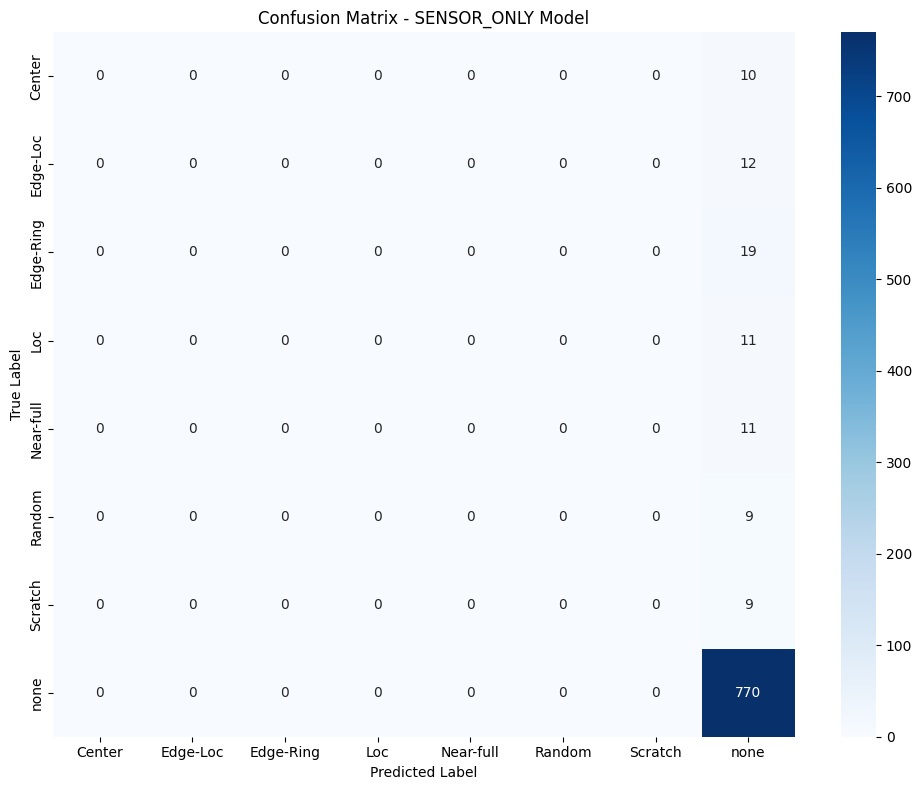


Overall Test Accuracy: 90.48%


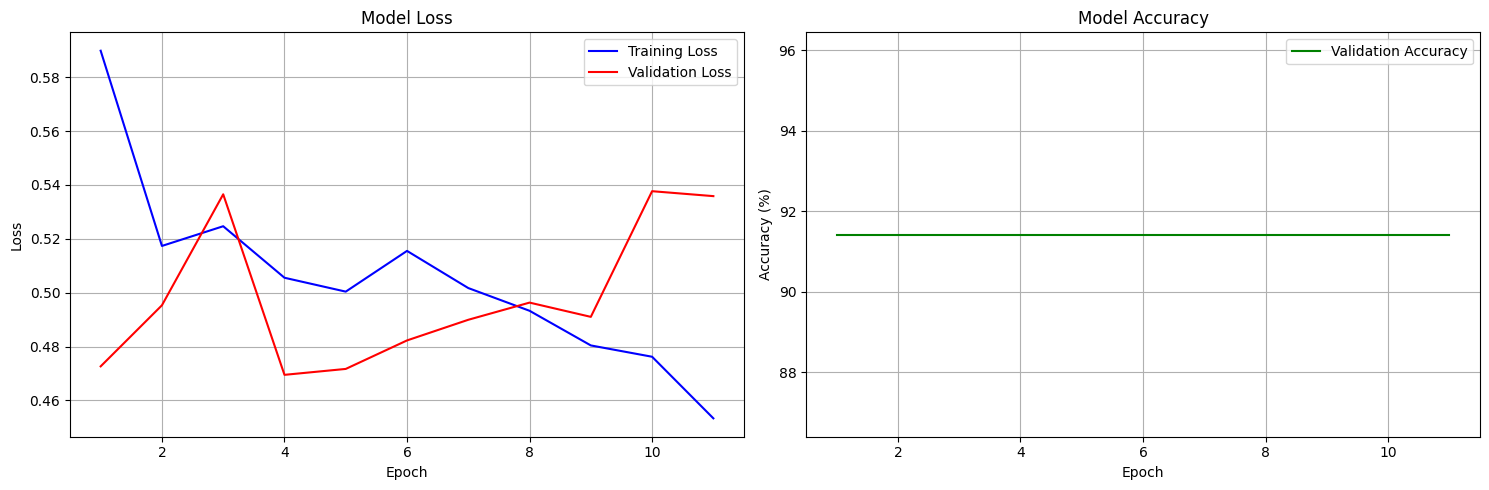


🚀 Training WAFER_ONLY model...
Using device: cpu

Preparing data loaders...
Dataset created with 4255 samples
Defect classes: ['Center' 'Edge-Loc' 'Edge-Ring' 'Loc' 'Near-full' 'Random' 'Scratch'
 'none']
Train samples: 2553
Validation samples: 851
Test samples: 851

Model: wafer_only
Total parameters: 2,618,888
Trainable parameters: 2,618,888

STARTING TRAINING
Epoch 1/20
  Train Loss: 0.6448, Train Acc: 89.86%
  Val Loss: 0.5137, Val Acc: 91.07%
  LR: 0.001000
Epoch 6/20
  Train Loss: 0.4824, Train Acc: 90.91%
  Val Loss: 0.4644, Val Acc: 91.07%
  LR: 0.001000
Epoch 11/20
  Train Loss: 0.3381, Train Acc: 91.70%
  Val Loss: 0.3133, Val Acc: 91.30%
  LR: 0.001000
Epoch 16/20
  Train Loss: 0.2706, Train Acc: 92.83%
  Val Loss: 0.2688, Val Acc: 92.60%
  LR: 0.001000
Epoch 20/20
  Train Loss: 0.2460, Train Acc: 92.68%
  Val Loss: 0.2760, Val Acc: 92.01%
  LR: 0.001000

Training completed! Best validation accuracy: 93.30%

DETAILED EVALUATION

Classification Report:
              precisio

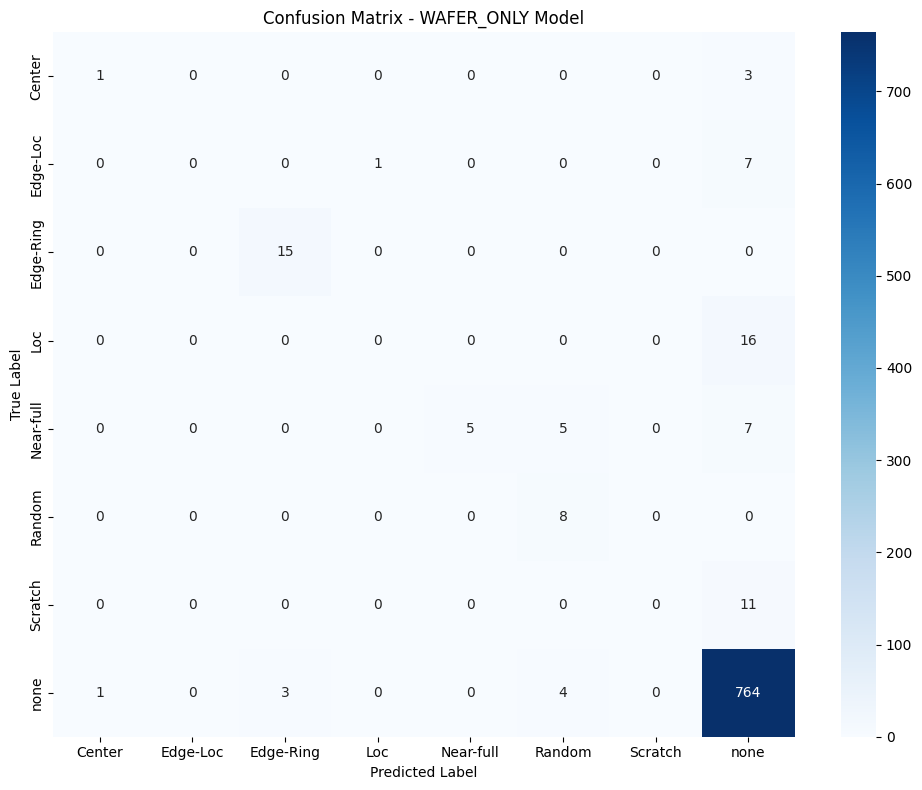


Overall Test Accuracy: 93.18%


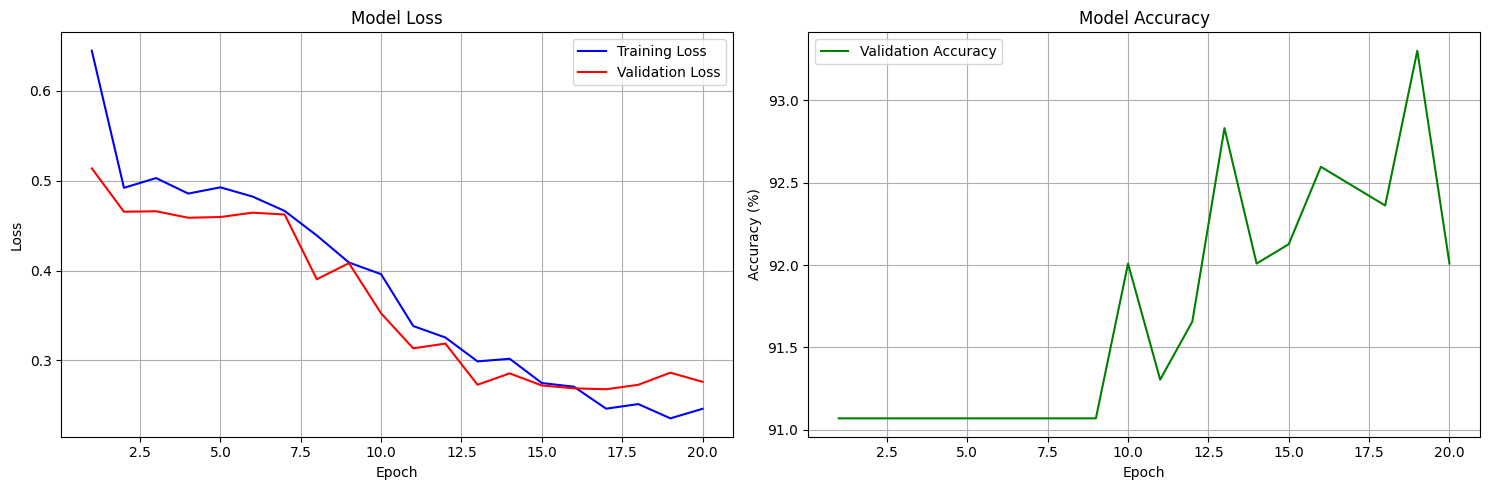


🚀 Training FUSION model...
Using device: cpu

Preparing data loaders...
Dataset created with 4255 samples
Defect classes: ['Center' 'Edge-Loc' 'Edge-Ring' 'Loc' 'Near-full' 'Random' 'Scratch'
 'none']
Train samples: 2553
Validation samples: 851
Test samples: 851

Model: fusion
Total parameters: 13,000,456
Trainable parameters: 13,000,456

STARTING TRAINING
Epoch 1/20
  Train Loss: 0.6817, Train Acc: 88.29%
  Val Loss: 0.4712, Val Acc: 91.77%
  LR: 0.001000
Epoch 6/20
  Train Loss: 0.4342, Train Acc: 90.76%
  Val Loss: 0.4385, Val Acc: 91.77%
  LR: 0.001000
Epoch 11/20
  Train Loss: 0.3906, Train Acc: 90.83%
  Val Loss: 0.3892, Val Acc: 91.77%
  LR: 0.001000

Early stopping at epoch 11

Training completed! Best validation accuracy: 91.77%

DETAILED EVALUATION

Classification Report:
              precision    recall  f1-score   support

      Center       0.00      0.00      0.00        10
    Edge-Loc       0.00      0.00      0.00         9
   Edge-Ring       0.00      0.00      0.00

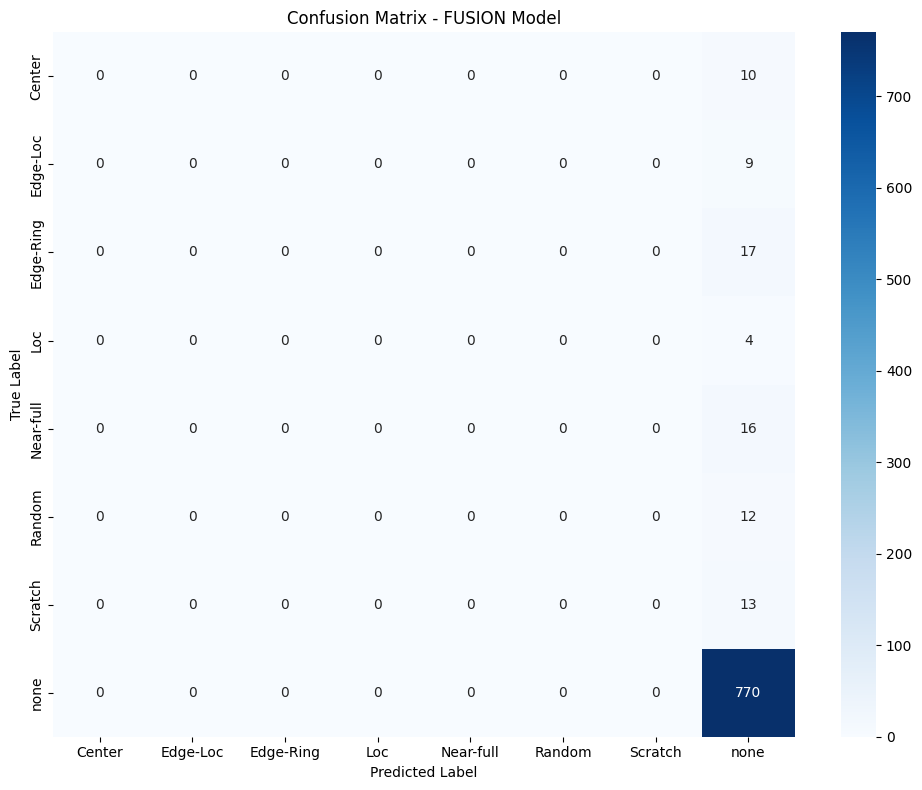


Overall Test Accuracy: 90.48%


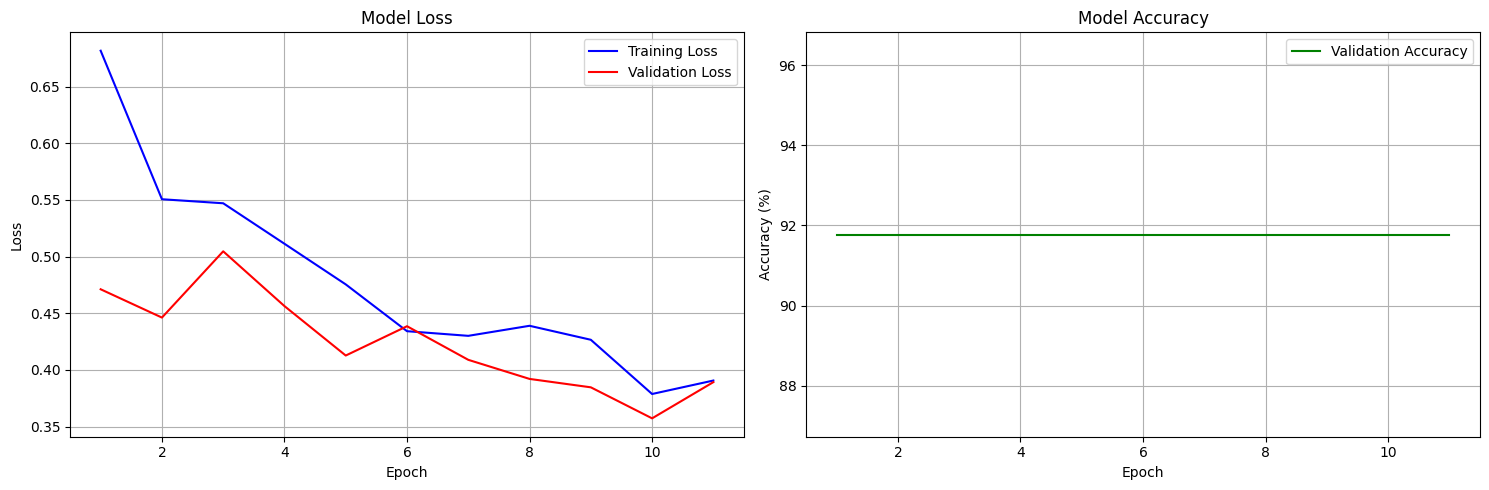


STEP 4: MODEL COMPARISON
--------------------------------------------------

📊 FINAL ACCURACY COMPARISON:
------------------------------
random_forest       :  91.30%
logistic_regression :  87.66%
sensor_only         :  90.48%
wafer_only          :  93.18%
fusion              :  90.48%

🏆 BEST MODEL: WAFER_ONLY with 93.18% accuracy

SENSOR IMPORTANCE ANALYSIS

ANALYZING SENSOR IMPORTANCE
❌ Error in sensor analysis: 'get_sensor_type'
Returning main results only


In [ ]:
# ================================================================
# RUN COMPLETE SYSTEM - USING example_usage()
# ================================================================
# This script assumes the following variables already exist in the environment:
#   - secom_data         (original SECOM dataset)
#   - data               (wafer dataset)
#   - secom_scaled_df    (scaled SECOM dataset with features)
#   - mapping            (sensor mapping information)
#   - organized_dataset  (SECOM data organized by sensor type)
#
# Best practice: load or generate these using preprocessing scripts/functions
# before running this block.
# ================================================================

def check_required_variables(required_vars):
    """Check if all required variables are present in globals()."""
    missing = [var for var in required_vars if var not in globals()]
    if missing:
        raise RuntimeError(
            f"❌ Missing required variables: {missing}\n"
            "Please run your data loading & preprocessing steps first."
        )

# List of required variables
required_variables = [
    'secom_data',
    'data',
    'secom_scaled_df',
    'mapping',
    'organized_dataset'
]

# Step 1: Check requirements
check_required_variables(required_variables)

# Step 2: Summary info
print("=" * 80)
print("✅ All required variables found!")
print(f"   secom_scaled_df: {secom_scaled_df.shape}")
if 'target' in globals():
    print(f"   target: {len(target)} samples")
print(f"   data (wafer): {data.shape}")
print("=" * 80)

# Step 3: Run the complete pipeline
print("\nRunning example_usage()...\n")
final_results, subset_predictor = example_usage()


In [22]:
# This cell requires the 'final_results' variable to be defined, which is created by running the example_usage() function in cell f4d02eb8.
# Please run cell f4d02eb8 before running this cell.

# Accessing the results
baseline_results = final_results['baseline_results']
dl_results = final_results['dl_results']
best_model_name = final_results['best_model']
best_accuracy = final_results['best_accuracy']

print(f"Best overall model: {best_model_name} with {best_accuracy:.2f}% accuracy")

# You can now further explore baseline_results and dl_results

NameError: name 'final_results' is not defined

In [23]:
# Advanced Synthetic Data Generator for Wafer Defect Prediction
# Generates thousands of high-quality, physics-based synthetic samples

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy import signal
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# PART 1: ADVANCED SYNTHETIC DATA GENERATION
# ============================================================================

class AdvancedSyntheticGenerator:
    """Generate thousands of realistic sensor-wafer combinations"""

    def __init__(self, secom_data, wafer_data, organized_dataset=None):
        self.secom_data = secom_data
        self.wafer_data = wafer_data
        self.organized_dataset = organized_dataset

        # Extract failure types
        self.failure_labels = wafer_data['failureType'].apply(
            lambda x: x[0][0] if isinstance(x, np.ndarray) and len(x) > 0 and len(x[0]) > 0
            else (x if isinstance(x, str) else 'none')
        )

        # Analyze real SECOM patterns
        self._analyze_real_patterns()

        # Define physics-based relationships
        self._define_defect_physics()

    def _analyze_real_patterns(self):
        """Analyze real SECOM data to understand patterns"""

        print("🔬 Analyzing real SECOM patterns...")

        # Remove target column
        features = self.secom_data.drop('Pass/Fail', axis=1, errors='ignore')

        # Calculate statistics for realistic synthesis
        self.real_stats = {
            'mean': features.mean(),
            'std': features.std(),
            'min': features.min(),
            'max': features.max(),
            'correlations': features.corr()
        }

        # Identify sensor groups and their typical behaviors
        if self.organized_dataset:
            self.sensor_groups = self.organized_dataset['columns_by_type']
        else:
            # Create intelligent grouping based on patterns
            self.sensor_groups = self._auto_group_sensors(features)

        print(f"   ✅ Analyzed {len(features.columns)} sensors")
        print(f"   🏷️  Identified {len(self.sensor_groups)} sensor groups")

    def _auto_group_sensors(self, features):
        """Automatically group sensors based on correlation patterns"""

        # Use correlation clustering to group sensors
        corr_matrix = features.corr().abs()

        # Simple grouping by correlation patterns
        n_sensors = len(features.columns)
        group_size = n_sensors // 5

        groups = {
            'GROUP_A': list(features.columns[:group_size]),
            'GROUP_B': list(features.columns[group_size:2*group_size]),
            'GROUP_C': list(features.columns[2*group_size:3*group_size]),
            'GROUP_D': list(features.columns[3*group_size:4*group_size]),
            'GROUP_E': list(features.columns[4*group_size:])
        }

        return groups

    def _define_defect_physics(self):
        """Define detailed physics-based defect signatures"""

        self.defect_signatures = {
            'none': {
                'description': 'Normal operation',
                'sensor_modifications': {
                    'all': {'method': 'small_variation', 'params': {'factor_range': (0.98, 1.02)}}
                },
                'patterns': ['stable', 'low_noise']
            },

            'Center': {
                'description': 'Center defects - uniform heating/plasma issues',
                'sensor_modifications': {
                    'TEMPERATURE': {'method': 'increase', 'params': {'factor_range': (1.3, 2.0)}},
                    'POWER_RF': {'method': 'increase', 'params': {'factor_range': (1.2, 1.7)}},
                    'PRESSURE': {'method': 'stabilize', 'params': {'factor_range': (0.95, 1.05)}}
                },
                'patterns': ['high_temp_center', 'uniform_heating']
            },

            'Edge-Loc': {
                'description': 'Edge localized defects - non-uniform processing',
                'sensor_modifications': {
                    'PRESSURE': {'method': 'edge_variation', 'params': {'factor_range': (0.6, 1.4)}},
                    'FLOW_RATE': {'method': 'edge_variation', 'params': {'factor_range': (0.7, 1.3)}},
                    'TEMPERATURE': {'method': 'edge_gradient', 'params': {'factor_range': (0.8, 1.2)}}
                },
                'patterns': ['edge_nonuniformity', 'radial_gradient']
            },

            'Edge-Ring': {
                'description': 'Edge ring defects - radial process variation',
                'sensor_modifications': {
                    'FLOW_RATE': {'method': 'ring_pattern', 'params': {'factor_range': (0.7, 1.5)}},
                    'PRESSURE': {'method': 'ring_pattern', 'params': {'factor_range': (0.8, 1.3)}},
                    'CHEMICAL_CONC': {'method': 'ring_pattern', 'params': {'factor_range': (0.9, 1.4)}}
                },
                'patterns': ['ring_variation', 'radial_periodicity']
            },

            'Loc': {
                'description': 'Localized defects - contamination or equipment issues',
                'sensor_modifications': {
                    'PARTICLE_COUNT': {'method': 'random_spikes', 'params': {'spike_prob': 0.3, 'spike_range': (3, 10)}},
                    'all': {'method': 'localized_spikes', 'params': {'n_spikes': 10, 'spike_range': (2, 5)}}
                },
                'patterns': ['contamination_spikes', 'equipment_glitches']
            },

            'Random': {
                'description': 'Random defects - instability or particles',
                'sensor_modifications': {
                    'all': {'method': 'random_noise', 'params': {'noise_level': 0.5, 'spike_prob': 0.2}}
                },
                'patterns': ['high_noise', 'random_instability']
            },

            'Scratch': {
                'description': 'Mechanical scratches - handling issues',
                'sensor_modifications': {
                    'VIBRATION': {'method': 'mechanical_pattern', 'params': {'freq_range': (0.1, 0.5)}},
                    'POSITION': {'method': 'step_changes', 'params': {'n_steps': 5}},
                    'all': {'method': 'mechanical_signature', 'params': {'amplitude': 0.3}}
                },
                'patterns': ['mechanical_disturbance', 'handling_signature']
            },

            'Near-full': {
                'description': 'Near-full coverage - incomplete processing',
                'sensor_modifications': {
                    'POWER_RF': {'method': 'gradual_decrease', 'params': {'end_factor': 0.7}},
                    'ENDPOINT': {'method': 'early_termination', 'params': {'cutoff_point': 0.8}},
                    'all': {'method': 'process_drift', 'params': {'drift_rate': 0.3}}
                },
                'patterns': ['process_termination', 'incomplete_processing']
            },

            'Donut': {
                'description': 'Donut patterns - center depletion',
                'sensor_modifications': {
                    'FLOW_RATE': {'method': 'donut_pattern', 'params': {'center_factor': 0.5, 'edge_factor': 1.2}},
                    'PRESSURE': {'method': 'donut_pattern', 'params': {'center_factor': 0.6, 'edge_factor': 1.1}},
                    'all': {'method': 'center_depletion', 'params': {'depletion_factor': 0.7}}
                },
                'patterns': ['center_depletion', 'donut_flow']
            }
        }

    def generate_massive_dataset(self, samples_per_class=2000, add_augmentations=True):
        """Generate thousands of samples per defect class"""

        print(f"\n🚀 GENERATING MASSIVE SYNTHETIC DATASET")
        print(f"   📊 Target: {samples_per_class} samples per class")
        print(f"   🔄 Augmentations: {'Enabled' if add_augmentations else 'Disabled'}")
        print("="*60)

        all_combinations = []
        generation_stats = defaultdict(int)

        # Get unique defect types
        unique_defects = list(self.defect_signatures.keys())

        for defect_type in unique_defects:
            print(f"\n🎯 Generating {samples_per_class} samples for {defect_type}...")

            # Get available wafers for this defect type
            defect_wafers = self.wafer_data[self.failure_labels == defect_type]

            if len(defect_wafers) == 0:
                print(f"   ⚠️  No wafers found for {defect_type}, skipping...")
                continue

            defect_combinations = []

            for i in range(samples_per_class):
                # Generate synthetic sample
                sample = self._generate_physics_sample(defect_type, i, defect_wafers)
                if sample:
                    defect_combinations.append(sample)
                    generation_stats[defect_type] += 1

                # Progress indicator
                if (i + 1) % 500 == 0:
                    print(f"   📈 Generated {i + 1}/{samples_per_class} samples...")

            # Add augmentations if requested
            if add_augmentations and len(defect_combinations) > 0:
                augmented = self._augment_samples(defect_combinations, defect_type)
                defect_combinations.extend(augmented)
                generation_stats[f"{defect_type}_augmented"] = len(augmented)

            all_combinations.extend(defect_combinations)
            print(f"   ✅ Total generated for {defect_type}: {len(defect_combinations)}")

        # Print generation summary
        print(f"\n📊 GENERATION SUMMARY:")
        print("-" * 40)
        total_samples = 0
        for defect_type, count in generation_stats.items():
            print(f"   {defect_type:20}: {count:6d} samples")
            total_samples += count

        print(f"\n🎉 TOTAL SAMPLES GENERATED: {total_samples:,}")
        print(f"💾 Dataset size: ~{total_samples * 590 * 8 / (1024**3):.2f} GB (sensor data)")

        return all_combinations

    def _generate_physics_sample(self, defect_type, sample_idx, defect_wafers):
        """Generate a single physics-based sample"""

        try:
            # Sample a wafer of this defect type
            wafer_idx = np.random.choice(defect_wafers.index)
            wafer_sample = defect_wafers.loc[wafer_idx]

            # Generate corresponding SECOM data
            secom_sample = self._create_realistic_secom(defect_type, sample_idx)

            return {
                'secom_data': secom_sample,
                'wafer_map': wafer_sample['waferMap'],
                'defect_type': defect_type,
                'wafer_id': wafer_idx,
                'sample_id': f"{defect_type}_{sample_idx}",
                'generation_method': 'physics_based'
            }
        except Exception as e:
            print(f"   ❌ Error generating sample {sample_idx} for {defect_type}: {e}")
            return None

    def _create_realistic_secom(self, defect_type, sample_idx):
        """Create realistic SECOM data based on physics"""

        # Start with a base sample from real data
        features = self.secom_data.drop('Pass/Fail', axis=1, errors='ignore')
        base_sample = features.sample(1).iloc[0].copy()

        # Add intelligent noise based on real data patterns
        noise_std = self.real_stats['std'] * 0.1  # 10% of real standard deviation
        base_sample += np.random.normal(0, noise_std, len(base_sample))

        # Apply defect-specific modifications
        signature = self.defect_signatures[defect_type]

        for sensor_group, modification in signature['sensor_modifications'].items():
            if sensor_group == 'all':
                # Apply to all sensors
                target_sensors = base_sample.index.tolist()
            else:
                # Apply to specific sensor group
                target_sensors = [col for col in self.sensor_groups.get(sensor_group, [])
                                if col in base_sample.index]

            if target_sensors:
                base_sample = self._apply_modification(
                    base_sample, target_sensors, modification, sample_idx
                )

        # Ensure values stay within reasonable bounds
        base_sample = self._clip_to_realistic_range(base_sample)

        return base_sample

    def _apply_modification(self, sample, target_sensors, modification, sample_idx):
        """Apply specific modification to target sensors"""

        method = modification['method']
        params = modification['params']

        if method == 'increase':
            factor_range = params['factor_range']
            factors = np.random.uniform(factor_range[0], factor_range[1], len(target_sensors))
            sample[target_sensors] *= factors

        elif method == 'small_variation':
            factor_range = params['factor_range']
            factors = np.random.uniform(factor_range[0], factor_range[1], len(target_sensors))
            sample[target_sensors] *= factors

        elif method == 'edge_variation':
            # Simulate edge effects with radial patterns
            factor_range = params['factor_range']
            for i, sensor in enumerate(target_sensors):
                # Create edge-like variation
                edge_factor = factor_range[0] + (factor_range[1] - factor_range[0]) * np.random.random()
                if i % 3 == 0:  # Simulate edge sensors
                    sample[sensor] *= edge_factor

        elif method == 'ring_pattern':
            # Create ring-like patterns
            factor_range = params['factor_range']
            n_sensors = len(target_sensors)
            ring_pattern = 1 + 0.3 * np.sin(np.arange(n_sensors) * 2 * np.pi / n_sensors)
            factors = np.random.uniform(factor_range[0], factor_range[1], n_sensors) * ring_pattern
            sample[target_sensors] *= factors

        elif method == 'random_spikes':
            spike_prob = params['spike_prob']
            spike_range = params['spike_range']
            for sensor in target_sensors:
                if np.random.random() < spike_prob:
                    spike = np.random.uniform(spike_range[0], spike_range[1])
                    sample[sensor] *= spike

        elif method == 'gradual_decrease':
            end_factor = params['end_factor']
            n_sensors = len(target_sensors)
            gradient = np.linspace(1.0, end_factor, n_sensors)
            sample[target_sensors] *= gradient

        elif method == 'mechanical_pattern':
            freq_range = params['freq_range']
            n_sensors = len(target_sensors)
            freq = np.random.uniform(freq_range[0], freq_range[1])
            vibration = 1 + 0.2 * np.sin(np.arange(n_sensors) * freq)
            sample[target_sensors] *= vibration

        elif method == 'donut_pattern':
            center_factor = params['center_factor']
            edge_factor = params['edge_factor']
            n_sensors = len(target_sensors)
            # Create donut-like pattern (low center, high edges)
            positions = np.linspace(0, 1, n_sensors)
            donut_pattern = center_factor + (edge_factor - center_factor) * (positions ** 2)
            sample[target_sensors] *= donut_pattern

        # Add more methods as needed...

        return sample

    def _clip_to_realistic_range(self, sample):
        """Ensure generated values stay within realistic bounds"""

        # Use real data statistics to clip values
        min_vals = self.real_stats['min']
        max_vals = self.real_stats['max']

        # Allow some extrapolation but prevent extreme values
        margin = 2.0  # Allow 2x the original range

        for col in sample.index:
            if col in min_vals.index and col in max_vals.index:
                range_size = max_vals[col] - min_vals[col]
                extended_min = min_vals[col] - margin * range_size
                extended_max = max_vals[col] + margin * range_size
                sample[col] = np.clip(sample[col], extended_min, extended_max)

        return sample

    def _augment_samples(self, base_samples, defect_type, augmentation_factor=0.5):
        """Create augmented versions of samples"""

        n_augmentations = int(len(base_samples) * augmentation_factor)
        augmented_samples = []

        print(f"   🔄 Creating {n_augmentations} augmented samples...")

        for i in range(n_augmentations):
            # Pick a random base sample
            base_sample = np.random.choice(base_samples)

            # Create augmented version
            augmented = base_sample.copy()

            # Apply augmentation techniques
            secom_data = augmented['secom_data'].copy()

            # 1. Add noise
            noise_level = 0.05
            noise = np.random.normal(0, noise_level, len(secom_data))
            secom_data += noise

            # 2. Scale variations
            scale_factor = np.random.uniform(0.95, 1.05)
            secom_data *= scale_factor

            # 3. Temporal shifts (simulate time-based variations)
            if len(secom_data) > 10:
                shift_amount = np.random.randint(-5, 6)
                secom_data = np.roll(secom_data, shift_amount)

            augmented['secom_data'] = secom_data
            augmented['sample_id'] = f"{defect_type}_aug_{i}"
            augmented['generation_method'] = 'augmented'

            augmented_samples.append(augmented)

        return augmented_samples

    def validate_synthetic_quality(self, synthetic_data, real_data_sample=None):
        """Validate the quality of synthetic data"""

        print(f"\n🔍 VALIDATING SYNTHETIC DATA QUALITY")
        print("="*50)

        # Extract sensor data from synthetic samples
        synthetic_sensors = []
        defect_types = []

        for sample in synthetic_data:
            synthetic_sensors.append(sample['secom_data'].values)
            defect_types.append(sample['defect_type'])

        synthetic_df = pd.DataFrame(synthetic_sensors)

        # 1. Statistical comparison with real data
        if real_data_sample is not None:
            real_features = real_data_sample.drop('Pass/Fail', axis=1, errors='ignore')

            print(f"📊 Statistical Comparison:")
            print(f"   Real data mean: {real_features.mean().mean():.4f}")
            print(f"   Synthetic mean: {synthetic_df.mean().mean():.4f}")
            print(f"   Real data std: {real_features.std().mean():.4f}")
            print(f"   Synthetic std: {synthetic_df.std().mean():.4f}")

        # 2. Class distribution
        class_counts = pd.Series(defect_types).value_counts()
        print(f"\n📈 Class Distribution:")
        for defect_type, count in class_counts.items():
            pct = count / len(defect_types) * 100
            print(f"   {defect_type:12}: {count:6d} ({pct:5.1f}%)")

        # 3. Feature diversity check
        feature_diversity = synthetic_df.std(axis=0).mean()
        print(f"\n🎯 Feature Diversity Score: {feature_diversity:.4f}")

        # 4. Correlation structure preservation
        if real_data_sample is not None:
            real_corr = real_features.corr().values
            synthetic_corr = synthetic_df.corr().values

            # Calculate correlation preservation
            corr_similarity = np.corrcoef(real_corr.flatten(), synthetic_corr.flatten())[0, 1]
            print(f"🔗 Correlation Structure Preservation: {corr_similarity:.4f}")

        return {
            'class_distribution': class_counts.to_dict(),
            'feature_diversity': feature_diversity,
            'total_samples': len(synthetic_data)
        }

# ============================================================================
# PART 2: EFFICIENT TRAINING WITH MASSIVE DATA
# ============================================================================

class MassiveDataTrainer:
    """Efficient training system for massive synthetic datasets"""

    def __init__(self, model_type='sensor_only'):
        self.model_type = model_type
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"🚀 Using device: {self.device}")

    def create_massive_balanced_dataset(self, samples_per_class=2000):
        """Create massive balanced dataset"""

        print(f"\n🏭 CREATING MASSIVE DATASET ({samples_per_class:,} per class)")

        # Initialize generator
        generator = AdvancedSyntheticGenerator(secom_scaled_df, data, organized_dataset)

        # Generate massive dataset
        massive_dataset = generator.generate_massive_dataset(
            samples_per_class=samples_per_class,
            add_augmentations=True
        )

        # Validate quality
        validation_results = generator.validate_synthetic_quality(
            massive_dataset,
            secom_scaled_df
        )

        return massive_dataset, validation_results

    def train_on_massive_data(self, massive_dataset, batch_size=64, epochs=20):
        """Train efficiently on massive dataset"""

        print(f"\n🚀 TRAINING ON MASSIVE DATASET")
        print(f"   📊 Total samples: {len(massive_dataset):,}")
        print(f"   🎯 Batch size: {batch_size}")
        print(f"   🔄 Epochs: {epochs}")

        # Create data loaders with larger batch sizes for efficiency
        torch_dataset = WaferSensorDataset(massive_dataset)

        # Split data
        train_size = int(0.8 * len(torch_dataset))
        val_size = int(0.1 * len(torch_dataset))
        test_size = len(torch_dataset) - train_size - val_size

        train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
            torch_dataset, [train_size, val_size, test_size]
        )

        # Create data loaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

        print(f"   📚 Train: {len(train_dataset):,} samples")
        print(f"   📊 Val: {len(val_dataset):,} samples")
        print(f"   🧪 Test: {len(test_dataset):,} samples")

        # Create model
        num_classes = len(torch_dataset.defect_encoder.classes_)
        if self.model_type == 'sensor_only':
            model = ImprovedSensorCNN(input_size=590, num_classes=num_classes, dropout_rate=0.3)
        else:
            raise ValueError(f"Model type {self.model_type} not implemented")

        model.to(self.device)

        # Training setup
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.5)

        # Training loop
        best_val_acc = 0.0
        history = {'train_loss': [], 'val_loss': [], 'val_acc': []}

        for epoch in range(epochs):
            # Training
            model.train()
            train_loss = 0.0
            train_correct = 0
            train_total = 0

            for batch_idx, batch in enumerate(train_loader):
                sensor_data = batch['sensor_data'].to(self.device)
                labels = batch['defect_type'].squeeze().to(self.device)

                optimizer.zero_grad()
                outputs = model(sensor_data)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                train_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                train_total += labels.size(0)
                train_correct += (predicted == labels).sum().item()

                # Progress indicator for large datasets
                if batch_idx % 100 == 0:
                    print(f"   Epoch {epoch+1}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}")

            # Validation
            val_loss, val_acc = self._evaluate_model(model, val_loader, criterion)
            scheduler.step(val_loss)

            # Save history
            train_acc = 100 * train_correct / train_total
            history['train_loss'].append(train_loss / len(train_loader))
            history['val_loss'].append(val_loss)
            history['val_acc'].append(val_acc)

            print(f"Epoch {epoch+1}/{epochs}: Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")

            # Save best model
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                torch.save(model.state_dict(), f'massive_{self.model_type}_best.pth')

        # Final evaluation
        model.load_state_dict(torch.load(f'massive_{self.model_type}_best.pth'))
        test_loss, test_acc = self._evaluate_model(model, test_loader, criterion)

        print(f"\n🎉 TRAINING COMPLETED!")
        print(f"   🏆 Best Val Accuracy: {best_val_acc:.2f}%")
        print(f"   🧪 Final Test Accuracy: {test_acc:.2f}%")

        return model, history, test_acc

    def _evaluate_model(self, model, data_loader, criterion):
        """Evaluate model on given data loader"""

        model.eval()
        total_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for batch in data_loader:
                sensor_data = batch['sensor_data'].to(self.device)
                labels = batch['defect_type'].squeeze().to(self.device)

                outputs = model(sensor_data)
                loss = criterion(outputs, labels)

                total_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_loss = total_loss / len(data_loader)
        accuracy = 100 * correct / total

        return avg_loss, accuracy

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def run_massive_synthetic_training(samples_per_class=2000):
    """Run complete pipeline with massive synthetic data"""

    print("="*80)
    print("🚀 MASSIVE SYNTHETIC DATA TRAINING PIPELINE")
    print("="*80)

    # Create trainer
    trainer = MassiveDataTrainer(model_type='sensor_only')

    # Generate massive dataset
    massive_dataset, validation_results = trainer.create_massive_balanced_dataset(
        samples_per_class=samples_per_class
    )

    # Train on massive dataset
    model, history, test_accuracy = trainer.train_on_massive_data(
        massive_dataset,
        batch_size=64,  # Larger batch size for efficiency
        epochs=15       # Fewer epochs needed with more data
    )

    print(f"\n📊 FINAL RESULTS WITH {samples_per_class:,} SAMPLES PER CLASS:")
    print(f"   🎯 Test Accuracy: {test_accuracy:.2f}%")
    print(f"   📈 Total Training Samples: {len(massive_dataset):,}")
    print(f"   ⚡ Training completed successfully!")

    return model, massive_dataset, validation_results

# Quick execution functions
def quick_test_1k():
    """Quick test with 1,000 samples per class"""
    return run_massive_synthetic_training(samples_per_class=1000)

def moderate_training_3k():
    """Moderate training with 3,000 samples per class"""
    return run_massive_synthetic_training(samples_per_class=3000)

def massive_training_5k():
    """Massive training with 5,000 samples per class"""
    return run_massive_synthetic_training(samples_per_class=5000)

# Run based on your preference
if __name__ == "__main__":
    print("🎯 Choose your training scale:")
    print("1. quick_test_1k() - Fast test with 1K samples per class")
    print("2. moderate_training_3k() - Moderate with 3K samples per class")
    print("3. massive_training_5k() - Full scale with 5K samples per class")
    print("\nRecommended: Start with quick_test_1k() to verify everything works!")

🎯 Choose your training scale:
1. quick_test_1k() - Fast test with 1K samples per class
2. moderate_training_3k() - Moderate with 3K samples per class
3. massive_training_5k() - Full scale with 5K samples per class

Recommended: Start with quick_test_1k() to verify everything works!


In [24]:
# BLOCK 1: IMPORTS AND BASIC SETUP
# ============================================================================
# Import all required libraries
# ============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split, WeightedRandomSampler
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy import signal, stats
from scipy.interpolate import interp1d
from imblearn.over_sampling import SMOTE
from collections import Counter, defaultdict
import cv2
from PIL import Image
import os
import pickle
import warnings
warnings.filterwarnings('ignore')

print("✅ All imports loaded successfully!")

# ============================================================================
# Utility Functions
# ============================================================================

def check_required_data():
    """Check if all required data is available"""

    required_vars = ['secom_scaled_df', 'target', 'data']
    missing_vars = []

    for var_name in required_vars:
        if var_name not in globals():
            missing_vars.append(var_name)

    if missing_vars:
        print("❌ Missing required data:")
        for var in missing_vars:
            print(f"   • {var}")
        return False
    else:
        print("✅ All required data available")
        return True

def set_random_seeds(seed=42):
    """Set random seeds for reproducibility"""
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    print(f"🎲 Random seeds set to {seed}")

# Set seeds by default
set_random_seeds()

✅ All imports loaded successfully!
🎲 Random seeds set to 42


In [137]:
# FIXED BALANCED TRAINING WITH TENSOR SIZE SOLUTION
# ============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter

# FIXED WAFER SENSOR DATASET CLASS
# ============================================================================

class FixedWaferSensorDataset(Dataset):
    """Fixed WaferSensorDataset that handles variable tensor sizes"""

    def __init__(self, samples_list):
        if not samples_list:
            raise ValueError("samples_list cannot be empty")

        self.samples = samples_list

        # Validate sample structure
        self._validate_samples()

        # Create label encoder for defect types
        defect_types = [sample['defect_type'] for sample in samples_list]
        defect_types = [dt if dt is not None else 'unknown' for dt in defect_types]

        self.defect_encoder = LabelEncoder()
        self.defect_encoder.fit(defect_types)

        # CRITICAL FIX: Determine consistent sensor data shape
        self.expected_sensor_shape = self._determine_sensor_shape()

        # CRITICAL FIX: Determine consistent wafer map shape (if used)
        self.expected_wafer_shape = self._determine_wafer_shape()

        print(f"📊 FixedWaferSensorDataset initialized:")
        print(f"   • Total samples: {len(samples_list):,}")
        print(f"   • Unique defect types: {len(self.defect_encoder.classes_)}")
        print(f"   • Classes: {list(self.defect_encoder.classes_)}")
        print(f"   • Expected sensor shape: {self.expected_sensor_shape}")
        print(f"   • Expected wafer shape: {self.expected_wafer_shape}")

    def _determine_sensor_shape(self):
        """Determine the expected sensor data shape from all samples"""

        print("   🔍 Analyzing sensor data shapes...")

        shapes = []
        for i, sample in enumerate(self.samples[:100]):  # Check first 100 samples
            try:
                sensor_data = self._extract_sensor_data(sample)
                shapes.append(sensor_data.shape[0])
            except Exception as e:
                print(f"   Warning: Error analyzing sample {i}: {e}")
                continue

        if not shapes:
            raise ValueError("Could not determine sensor data shape from any samples")

        # Use the most common shape
        shape_counts = Counter(shapes)
        most_common_shape = shape_counts.most_common(1)[0][0]

        print(f"   • Found sensor shapes: {dict(shape_counts)}")
        print(f"   • Using most common shape: {most_common_shape}")

        return most_common_shape

    def _determine_wafer_shape(self):
        """Determine the expected wafer map shape"""

        print("   🔍 Analyzing wafer map shapes...")

        wafer_shapes = []
        has_wafer_maps = False

        for i, sample in enumerate(self.samples[:100]):  # Check first 100 samples
            if 'wafer_map' in sample and sample['wafer_map'] is not None:
                has_wafer_maps = True
                wafer_map = sample['wafer_map']

                if isinstance(wafer_map, np.ndarray):
                    wafer_shapes.append(wafer_map.shape)
                elif hasattr(wafer_map, 'shape'):
                    wafer_shapes.append(wafer_map.shape)

        if not has_wafer_maps:
            print("   • No wafer maps found in samples")
            return None

        if not wafer_shapes:
            print("   • Wafer maps found but no valid shapes detected")
            return None

        # Find most common wafer shape
        shape_counts = Counter(wafer_shapes)
        most_common_shape = shape_counts.most_common(1)[0][0]

        print(f"   • Found wafer shapes: {dict(shape_counts)}")
        print(f"   • Using most common wafer shape: {most_common_shape}")

        return most_common_shape

    def _validate_samples(self):
        """Validate that all samples have required fields"""
        required_keys = ['defect_type']

        for i, sample in enumerate(self.samples):
            if not isinstance(sample, dict):
                raise ValueError(f"Sample {i} must be a dictionary")

            if 'defect_type' not in sample:
                raise ValueError(f"Sample {i} missing 'defect_type' key")

            # Check for sensor data
            sensor_keys = ['secom_data', 'sensor_data', 'features', 'X']
            if not any(key in sample for key in sensor_keys):
                raise ValueError(f"Sample {i} missing sensor data. Expected one of: {sensor_keys}")

    def _extract_sensor_data(self, sample):
        """Robustly extract sensor data from different possible formats"""
        sensor_keys = ['secom_data', 'sensor_data', 'features', 'X']

        sensor_data = None
        for key in sensor_keys:
            if key in sample:
                sensor_data = sample[key]
                break

        if sensor_data is None:
            raise ValueError("No sensor data found in sample")

        # Convert to numpy array based on type
        if isinstance(sensor_data, pd.Series):
            sensor_data = sensor_data.values
        elif isinstance(sensor_data, pd.DataFrame):
            sensor_data = sensor_data.values.flatten() if sensor_data.shape[0] == 1 else sensor_data.values
        elif isinstance(sensor_data, dict):
            sorted_keys = sorted(sensor_data.keys())
            sensor_data = np.array([sensor_data[key] for key in sorted_keys])
        elif isinstance(sensor_data, list):
            sensor_data = np.array(sensor_data)
        elif isinstance(sensor_data, np.ndarray):
            pass
        else:
            try:
                sensor_data = np.array(sensor_data)
            except:
                raise ValueError(f"Cannot convert sensor data of type {type(sensor_data)} to numpy array")

        # Ensure it's 1D
        if len(sensor_data.shape) > 1:
            sensor_data = sensor_data.flatten()

        # Handle NaN and infinite values
        if np.isnan(sensor_data).any():
            median_val = np.nanmedian(sensor_data)
            if np.isnan(median_val):
                median_val = 0.0
            sensor_data = np.where(np.isnan(sensor_data), median_val, sensor_data)

        if np.isinf(sensor_data).any():
            sensor_data = np.clip(sensor_data, -1e10, 1e10)

        return sensor_data.astype(np.float32)

    def _extract_wafer_map(self, sample):
        """Extract and standardize wafer map data"""

        if 'wafer_map' not in sample or sample['wafer_map'] is None:
            return None

        wafer_map = sample['wafer_map']

        # Convert to numpy array
        if not isinstance(wafer_map, np.ndarray):
            try:
                wafer_map = np.array(wafer_map)
            except:
                return None

        # If we have an expected shape, resize to match
        if self.expected_wafer_shape is not None:
            target_h, target_w = self.expected_wafer_shape
            current_h, current_w = wafer_map.shape

            if (current_h, current_w) != (target_h, target_w):
                # Resize wafer map to expected shape
                # Simple approach: pad or crop

                # Create target array filled with zeros
                resized_wafer = np.zeros((target_h, target_w), dtype=wafer_map.dtype)

                # Calculate copy dimensions
                copy_h = min(current_h, target_h)
                copy_w = min(current_w, target_w)

                # Copy data to center of target array
                start_h = (target_h - copy_h) // 2
                start_w = (target_w - copy_w) // 2

                resized_wafer[start_h:start_h+copy_h, start_w:start_w+copy_w] = \
                    wafer_map[:copy_h, :copy_w]

                wafer_map = resized_wafer

        return wafer_map.astype(np.float32)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        if idx >= len(self.samples):
            raise IndexError(f"Index {idx} out of range for dataset of size {len(self.samples)}")

        try:
            sample = self.samples[idx]

            # Get sensor data with robust extraction
            sensor_data = self._extract_sensor_data(sample)

            # CRITICAL FIX: Ensure sensor data has consistent shape
            if sensor_data.shape[0] != self.expected_sensor_shape:
                if sensor_data.shape[0] < self.expected_sensor_shape:
                    # Pad with zeros
                    padding = np.zeros(self.expected_sensor_shape - sensor_data.shape[0], dtype=np.float32)
                    sensor_data = np.concatenate([sensor_data, padding])
                else:
                    # Truncate
                    sensor_data = sensor_data[:self.expected_sensor_shape]

            # Get defect type
            defect_type = sample['defect_type']
            if defect_type is None:
                defect_type = 'unknown'

            # Handle unseen classes
            try:
                defect_encoded = self.defect_encoder.transform([defect_type])[0]
            except ValueError:
                print(f"Warning: Unseen defect type '{defect_type}', assigning to first class")
                defect_encoded = 0

            # CRITICAL FIX: Extract wafer map with consistent shape
            wafer_map = self._extract_wafer_map(sample)

            result = {
                'sensor_data': torch.FloatTensor(sensor_data),
                'defect_type': torch.LongTensor([defect_encoded]),
                'original_defect_type': defect_type
            }

            # Only add wafer map if it exists and has consistent shape
            if wafer_map is not None:
                result['wafer_map'] = torch.FloatTensor(wafer_map)

            return result

        except Exception as e:
            print(f"Error processing sample {idx}: {e}")
            # Return dummy sample
            dummy_sensor_data = torch.zeros(self.expected_sensor_shape, dtype=torch.float32)
            result = {
                'sensor_data': dummy_sensor_data,
                'defect_type': torch.LongTensor([0]),
                'original_defect_type': 'error'
            }

            if self.expected_wafer_shape is not None:
                dummy_wafer_map = torch.zeros(self.expected_wafer_shape, dtype=torch.float32)
                result['wafer_map'] = dummy_wafer_map

            return result


# CUSTOM COLLATE FUNCTION TO HANDLE REMAINING ISSUES
# ============================================================================

def robust_collate_fn(batch):
    """Custom collate function that handles remaining tensor size issues"""

    # Separate the different data types
    sensor_data = []
    defect_types = []
    original_defect_types = []
    wafer_maps = []

    for item in batch:
        sensor_data.append(item['sensor_data'])
        defect_types.append(item['defect_type'])
        original_defect_types.append(item['original_defect_type'])

        if 'wafer_map' in item:
            wafer_maps.append(item['wafer_map'])

    # Stack tensors (they should now have consistent shapes)
    try:
        batch_dict = {
            'sensor_data': torch.stack(sensor_data, 0),
            'defect_type': torch.stack(defect_types, 0),
            'original_defect_type': original_defect_types
        }

        if wafer_maps:
            batch_dict['wafer_map'] = torch.stack(wafer_maps, 0)

        return batch_dict

    except RuntimeError as e:
        print(f"Error in collate function: {e}")
        print("Falling back to individual tensor handling...")

        # Emergency fallback: ensure all tensors have the same size
        # Find the maximum size for each dimension
        sensor_shapes = [t.shape for t in sensor_data]
        max_sensor_size = max(t.shape[0] for t in sensor_data)

        # Pad all tensors to the same size
        padded_sensor_data = []
        for tensor in sensor_data:
            if tensor.shape[0] < max_sensor_size:
                padding = torch.zeros(max_sensor_size - tensor.shape[0])
                padded_tensor = torch.cat([tensor, padding], 0)
            else:
                padded_tensor = tensor[:max_sensor_size]
            padded_sensor_data.append(padded_tensor)

        batch_dict = {
            'sensor_data': torch.stack(padded_sensor_data, 0),
            'defect_type': torch.stack(defect_types, 0),
            'original_defect_type': original_defect_types
        }

        return batch_dict


# FIXED DATA LOADER CREATOR
# ============================================================================

def create_fixed_data_loaders(samples, batch_size=64, train_split=0.7, val_split=0.15, test_split=0.15):
    """Create data loaders with the fixed dataset and collate function"""

    # Split data
    train_samples, temp_samples = train_test_split(samples, test_size=(val_split + test_split), random_state=42)
    val_samples, test_samples = train_test_split(temp_samples, test_size=(test_split / (val_split + test_split)), random_state=42)

    # Create fixed datasets
    train_dataset = FixedWaferSensorDataset(train_samples)
    val_dataset = FixedWaferSensorDataset(val_samples)
    test_dataset = FixedWaferSensorDataset(test_samples)

    # Use the same label encoder for all splits
    label_encoder = train_dataset.defect_encoder
    val_dataset.defect_encoder = label_encoder
    test_dataset.defect_encoder = label_encoder

    # Create data loaders with custom collate function
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        pin_memory=torch.cuda.is_available(),
        collate_fn=robust_collate_fn,  # Use custom collate function
        drop_last=False
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        pin_memory=torch.cuda.is_available(),
        collate_fn=robust_collate_fn,  # Use custom collate function
        drop_last=False
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        pin_memory=torch.cuda.is_available(),
        collate_fn=robust_collate_fn,  # Use custom collate function
        drop_last=False
    )

    print(f"✅ Fixed data loaders created successfully")
    print(f"   • Train batches: {len(train_loader)}")
    print(f"   • Validation batches: {len(val_loader)}")
    print(f"   • Test batches: {len(test_loader)}")

    return train_loader, val_loader, test_loader, label_encoder


# BALANCED DATASET CREATOR (UNCHANGED - KEEP YOUR EXISTING ONE)
# ============================================================================

class BalancedDatasetCreator:
    """Create balanced dataset by limiting dominant 'none' class"""

    def __init__(self, dataset_samples):
        self.samples = dataset_samples
        self.class_analysis = self._analyze_class_distribution()

    def _analyze_class_distribution(self):
        """Analyze current class distribution"""

        class_counts = {}
        for sample in self.samples:
            defect_type = sample['defect_type']
            class_counts[defect_type] = class_counts.get(defect_type, 0) + 1

        total_samples = len(self.samples)

        print("📊 CURRENT CLASS DISTRIBUTION:")
        print("-" * 50)
        for class_name, count in sorted(class_counts.items(), key=lambda x: x[1], reverse=True):
            percentage = (count / total_samples) * 100
            print(f"   {class_name:12}: {count:8,} samples ({percentage:5.1f}%)")

        return class_counts

    def create_balanced_dataset_with_limited_none(self, none_multiplier=3, min_samples_per_defect=500):
        """Create balanced dataset by limiting 'none' class"""

        print(f"\n🎯 CREATING BALANCED DATASET:")
        print(f"   • None multiplier: {none_multiplier}x largest defect class")
        print(f"   • Minimum samples per defect: {min_samples_per_defect}")

        # Group samples by class
        class_groups = {}
        for sample in self.samples:
            defect_type = sample['defect_type']
            if defect_type not in class_groups:
                class_groups[defect_type] = []
            class_groups[defect_type].append(sample)

        # Find largest defect class (excluding 'none')
        defect_counts = {k: len(v) for k, v in class_groups.items() if k != 'none'}
        largest_defect_count = max(defect_counts.values()) if defect_counts else 1000

        # Calculate target counts
        none_target = largest_defect_count * none_multiplier
        defect_target = max(min_samples_per_defect, largest_defect_count)

        print(f"\n📋 TARGET COUNTS:")
        print(f"   • None class target: {none_target:,} samples")
        print(f"   • Defect classes target: {defect_target:,} samples each")

        balanced_samples = []
        new_distribution = {}

        for class_name, samples in class_groups.items():
            current_count = len(samples)

            if class_name == 'none':
                # Limit 'none' class dramatically
                target_count = min(none_target, current_count)
                selected_samples = np.random.choice(samples, size=target_count, replace=False).tolist()
                balanced_samples.extend(selected_samples)
                new_distribution[class_name] = target_count
                print(f"\n   {class_name:12}: {current_count:8,} → {target_count:8,} (reduced by {current_count-target_count:,})")

            else:
                # For defect classes, oversample if needed
                if current_count >= defect_target:
                    # If we have enough, just sample the target
                    selected_samples = np.random.choice(samples, size=defect_target, replace=False).tolist()
                    balanced_samples.extend(selected_samples)
                    new_distribution[class_name] = defect_target
                    print(f"   {class_name:12}: {current_count:8,} → {defect_target:8,} (sampled)")

                else:
                    # If we don't have enough, oversample with augmentation
                    balanced_samples.extend(samples)  # Add all original

                    # Create synthetic samples
                    needed = defect_target - current_count
                    synthetic_samples = self._create_synthetic_samples(samples, needed, class_name)
                    balanced_samples.extend(synthetic_samples)

                    new_distribution[class_name] = defect_target
                    print(f"   {class_name:12}: {current_count:8,} → {defect_target:8,} (added {needed:,} synthetic)")

        print(f"\n✅ BALANCED DATASET CREATED:")
        print(f"   • Total samples: {len(balanced_samples):,}")
        print(f"   • Reduction from: {len(self.samples):,} samples")
        print(f"   • None class now: {(new_distribution['none']/len(balanced_samples)*100):.1f}% (was 97%)")

        return balanced_samples, new_distribution

    def _create_synthetic_samples(self, base_samples, needed_count, class_name):
        """Create synthetic samples for underrepresented classes"""

        synthetic_samples = []

        for i in range(needed_count):
            base_sample = np.random.choice(base_samples)
            synthetic_sample = base_sample.copy()

            # Add appropriate noise based on class
            sensor_data = synthetic_sample['secom_data']
            if hasattr(sensor_data, 'values'):
                sensor_data = sensor_data.values

            # Class-specific noise levels
            if class_name in ['Edge-Ring', 'Edge-Loc']:
                noise_std = 0.05  # Higher noise for edge defects
            elif class_name in ['Near-full', 'Donut']:
                noise_std = 0.02  # Lower noise for rare/sensitive defects
            else:
                noise_std = 0.03  # Standard noise

            noise = np.random.normal(0, noise_std, sensor_data.shape)
            synthetic_sample['secom_data'] = sensor_data + noise

            synthetic_samples.append(synthetic_sample)

        return synthetic_samples


# FIXED BALANCED TRAINING FUNCTION
# ============================================================================

def run_balanced_targeted_training_fixed(samples_per_class=1500, epochs=25, batch_size=64, none_multiplier=2):
    """FIXED: Targeted training with dramatically reduced 'none' class and tensor size fix"""

    print("🎯 FIXED BALANCED TARGETED TRAINING (REDUCED NONE CLASS)")
    print("="*80)
    print("🔧 KEY IMPROVEMENTS:")
    print("   ✅ Dramatically reduce 'none' class dominance")
    print("   ✅ Balance defect classes properly")
    print("   ✅ FIXED: Tensor size mismatch issues")
    print("   ✅ Robust data loading with error handling")
    print("   ✅ Confusion-aware loss function")
    print("="*80)

    # Check required data
    if not check_required_data():
        print("❌ Cannot proceed without required data")
        return None

    # Step 1: Create physics-based dataset (initial)
    print("\n📊 STEP 1: Creating initial physics-based dataset...")
    combiner = PhysicsBasedDataCombiner(secom_scaled_df, data, None)

    base_samples, physics_stats = combiner.create_physics_based_dataset(
        samples_per_class=samples_per_class
    )

    # Step 2: BALANCE THE DATASET BY REDUCING 'NONE' CLASS
    print("\n⚖️ STEP 2: Balancing dataset (reducing 'none' dominance)...")
    balancer = BalancedDatasetCreator(base_samples)
    balanced_samples, new_distribution = balancer.create_balanced_dataset_with_limited_none(
        none_multiplier=none_multiplier,
        min_samples_per_defect=800
    )

    # Step 3: Create FIXED data loaders
    print("\n📚 STEP 3: Creating FIXED balanced data loaders...")

    # CRITICAL FIX: Use the new fixed data loader function
    train_loader, val_loader, test_loader, label_encoder = create_fixed_data_loaders(
        balanced_samples, batch_size=batch_size
    )

    # Step 4: Create robust model
    print("\n🏗️ STEP 4: Creating robust model...")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    num_classes = len(label_encoder.classes_)

    model = RobustClassifierCNN(
        input_size=secom_scaled_df.shape[1],
        num_classes=num_classes,
        dropout_rate=0.4
    )

    # Step 5: Training with class weights
    print("\n🚀 STEP 5: Training with balanced data...")

    # Create class weights based on new distribution
    class_weights = torch.ones(num_classes)
    total_samples = sum(new_distribution.values())

    for i, class_name in enumerate(label_encoder.classes_):
        if class_name in new_distribution:
            # Weight inversely proportional to frequency
            weight = total_samples / (num_classes * new_distribution[class_name])
            class_weights[i] = weight

    print(f"   Class weights: {dict(zip(label_encoder.classes_, class_weights.tolist()))}")

    # Use weighted cross-entropy loss
    criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

    # Setup optimizer
    optimizer = optim.AdamW(
        model.parameters(),
        lr=0.001,
        weight_decay=0.01
    )

    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='max', factor=0.5, patience=4,
        min_lr=1e-6, verbose=True
    )

    # Training loop
    best_val_acc = 0.0
    epochs_without_improvement = 0

    for epoch in range(epochs):
        print(f"\n🔄 Epoch {epoch + 1}/{epochs}")
        print("-" * 50)

        # Training phase
        model.train()
        total_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, batch in enumerate(train_loader):
            sensor_data = batch['sensor_data'].to(device)
            labels = batch['defect_type'].squeeze().to(device)

            optimizer.zero_grad()
            outputs = model(sensor_data)
            loss = criterion(outputs, labels)

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if batch_idx % 20 == 0:
                current_acc = 100 * correct / total if total > 0 else 0
                print(f"   Batch {batch_idx:3d}/{len(train_loader)}: "
                      f"Loss={loss.item():.4f}, Acc={current_acc:.1f}%")

        train_loss = total_loss / len(train_loader)
        train_acc = 100 * correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for batch in val_loader:
                sensor_data = batch['sensor_data'].to(device)
                labels = batch['defect_type'].squeeze().to(device)

                outputs = model(sensor_data)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100 * val_correct / val_total

        # Update learning rate
        scheduler.step(val_acc)
        current_lr = optimizer.param_groups[0]['lr']

        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        print(f"Learning Rate: {current_lr:.6f}")

        # Check for improvement
        if val_acc > best_val_acc + 0.001:
            best_val_acc = val_acc
            epochs_without_improvement = 0
            print(f"🎯 New best validation accuracy: {val_acc:.2f}%")
        else:
            epochs_without_improvement += 1
            print(f"⏰ Epochs without improvement: {epochs_without_improvement}/6")

        # Early stopping
        if epochs_without_improvement >= 6:
            print(f"\n🛑 Early stopping triggered after {epoch + 1} epochs")
            print(f"🏆 Best validation accuracy: {best_val_acc:.2f}%")
            break

    # Step 6: Comprehensive evaluation
    print("\n🧪 STEP 6: Comprehensive evaluation...")
    evaluator = ComprehensiveEvaluator(model, device, label_encoder)
    test_results = evaluator.full_evaluation(test_loader)

    return {
        'model': model,
        'dataset': balanced_samples,
        'test_results': test_results,
        'label_encoder': label_encoder,
        'new_distribution': new_distribution,
        'balancer': balancer
    }


# FIXED QUICK START FUNCTIONS
# ============================================================================

def balanced_quick_fix_v2():
    """FIXED: Quick fix with balanced dataset (reduced none class)"""
    print("🎯 Running FIXED balanced quick fix (reduced none class)...")
    return run_balanced_targeted_training_fixed(
        samples_per_class=1200,
        epochs=20,
        batch_size=64,
        none_multiplier=2  # None class = 2x largest defect class
    )

def balanced_full_training_v2():
    """FIXED: Full balanced training with reduced none class"""
    print("🎯 Running FIXED full balanced training...")
    return run_balanced_targeted_training_fixed(
        samples_per_class=1500,
        epochs=25,
        batch_size=48,
        none_multiplier=3  # None class = 3x largest defect class
    )


# ENHANCED BALANCED TRAINING WITH AUGMENTATION (ALSO FIXED)
# ============================================================================

class AdvancedWaferAugmentation:
    """Advanced augmentation for wafer defect data"""

    def __init__(self, augmentation_probability=0.8):
        self.augmentation_probability = augmentation_probability

        # Class-specific noise levels
        self.sensor_noise_levels = {
            'Near-full': 0.02,
            'Edge-Ring': 0.04,
            'Edge-Loc': 0.04,
            'Donut': 0.03,
            'Center': 0.03,
            'Loc': 0.03,
            'Random': 0.05,
            'none': 0.02
        }

    def augment_sample(self, sample, defect_type):
        """Apply comprehensive augmentation to a sample"""

        if np.random.random() > self.augmentation_probability:
            return sample  # No augmentation

        augmented_sample = sample.copy()

        # Sensor data augmentation
        augmented_sample = self._augment_sensor_data(augmented_sample, defect_type)

        # Wafer map augmentation (if available)
        if 'wafer_map' in augmented_sample and augmented_sample['wafer_map'] is not None:
            augmented_sample = self._augment_wafer_map(augmented_sample, defect_type)

        return augmented_sample

    def _augment_sensor_data(self, sample, defect_type):
        """Class-specific sensor data augmentation"""

        sensor_data = sample['secom_data']
        if hasattr(sensor_data, 'values'):
            sensor_data = sensor_data.values
        elif isinstance(sensor_data, pd.Series):
            sensor_data = sensor_data.values

        augmented_data = sensor_data.copy()
        noise_std = self.sensor_noise_levels.get(defect_type, 0.03)

        # 1. Gaussian noise (always applied)
        gaussian_noise = np.random.normal(0, noise_std, augmented_data.shape)
        augmented_data += gaussian_noise

        # 2. Time shift simulation
        if np.random.random() < 0.3:
            shift = np.random.randint(-5, 6)
            augmented_data = np.roll(augmented_data, shift)

        # 3. Scaling variation
        if np.random.random() < 0.3:
            scale_factor = np.random.uniform(0.95, 1.05)
            augmented_data *= scale_factor

        # 4. Offset variation
        if np.random.random() < 0.2:
            offset = np.random.normal(0, noise_std * 0.5)
            augmented_data += offset

        sample['secom_data'] = augmented_data
        return sample

    def _augment_wafer_map(self, sample, defect_type):
        """Class-specific wafer map augmentation"""

        wafer_map = sample['wafer_map']
        if not isinstance(wafer_map, np.ndarray):
            wafer_map = np.array(wafer_map)

        augmented_map = wafer_map.copy()

        # Rotation (90, 180, 270 degrees)
        if np.random.random() < 0.4:
            k = np.random.randint(1, 4)
            augmented_map = np.rot90(augmented_map, k)

        # Horizontal/vertical flip (careful with edge defects)
        if defect_type not in ['Edge-Ring', 'Edge-Loc']:
            if np.random.random() < 0.3:
                augmented_map = np.flipud(augmented_map)
            if np.random.random() < 0.3:
                augmented_map = np.fliplr(augmented_map)

        # Salt and pepper noise (very light)
        if np.random.random() < 0.2:
            noise_mask = np.random.random(augmented_map.shape) < 0.01
            augmented_map[noise_mask] = 1 - augmented_map[noise_mask]

        sample['wafer_map'] = augmented_map
        return sample


class EnhancedBalancedDatasetCreator(BalancedDatasetCreator):
    """Enhanced version with advanced augmentation"""

    def __init__(self, dataset_samples):
        super().__init__(dataset_samples)
        self.augmenter = AdvancedWaferAugmentation()

    def create_enhanced_balanced_dataset(self, none_multiplier=2, min_samples_per_defect=800, augment_factor=1.5):
        """Create balanced dataset with advanced augmentation"""

        print(f"\n🎯 CREATING ENHANCED BALANCED DATASET WITH AUGMENTATION:")
        print(f"   • None multiplier: {none_multiplier}x largest defect class")
        print(f"   • Minimum samples per defect: {min_samples_per_defect}")
        print(f"   • Augmentation factor: {augment_factor}x")

        # First create the basic balanced dataset
        balanced_samples, new_distribution = self.create_balanced_dataset_with_limited_none(
            none_multiplier=none_multiplier,
            min_samples_per_defect=min_samples_per_defect
        )

        # Then add augmented samples
        print(f"\n🔧 ADDING AUGMENTED SAMPLES:")

        # Group by class
        class_groups = {}
        for sample in balanced_samples:
            defect_type = sample['defect_type']
            if defect_type not in class_groups:
                class_groups[defect_type] = []
            class_groups[defect_type].append(sample)

        enhanced_samples = balanced_samples.copy()

        for defect_type, samples in class_groups.items():
            # Add more augmented samples for classes that need it most
            if defect_type == 'Near-full':
                # Near-full needs the most help (lowest recall)
                n_augmented = int(len(samples) * augment_factor * 1.5)
            elif defect_type in ['Edge-Ring', 'Edge-Loc', 'Donut']:
                # These classes need moderate augmentation
                n_augmented = int(len(samples) * augment_factor)
            else:
                # Other classes need less augmentation
                n_augmented = int(len(samples) * augment_factor * 0.7)

            print(f"   {defect_type:12}: Adding {n_augmented:,} augmented samples")

            for _ in range(n_augmented):
                base_sample = np.random.choice(samples)
                augmented_sample = self.augmenter.augment_sample(base_sample, defect_type)
                enhanced_samples.append(augmented_sample)

        print(f"\n✅ ENHANCED BALANCED DATASET CREATED:")
        print(f"   • Original balanced: {len(balanced_samples):,} samples")
        print(f"   • With augmentation: {len(enhanced_samples):,} samples")
        print(f"   • Augmentation added: {len(enhanced_samples) - len(balanced_samples):,} samples")

        return enhanced_samples, new_distribution


def run_enhanced_balanced_training_fixed(samples_per_class=1200, epochs=25, batch_size=64, none_multiplier=2):
    """FIXED: Enhanced balanced training with advanced augmentation"""

    print("🎯 FIXED ENHANCED BALANCED TRAINING WITH AUGMENTATION")
    print("="*80)
    print("🔧 KEY IMPROVEMENTS:")
    print("   ✅ Dramatically reduce 'none' class dominance")
    print("   ✅ Advanced class-specific data augmentation")
    print("   ✅ FIXED: Tensor size mismatch issues")
    print("   ✅ Enhanced wafer map transformations")
    print("   ✅ Sensor data augmentation with noise profiles")
    print("   ✅ Class-weighted loss function")
    print("="*80)

    # Check required data
    if not check_required_data():
        print("❌ Cannot proceed without required data")
        return None

    # Step 1: Create physics-based dataset
    print("\n📊 STEP 1: Creating initial physics-based dataset...")
    combiner = PhysicsBasedDataCombiner(secom_scaled_df, data, None)

    base_samples, physics_stats = combiner.create_physics_based_dataset(
        samples_per_class=samples_per_class
    )

    # Step 2: Enhanced balancing with augmentation
    print("\n⚖️ STEP 2: Enhanced balancing with augmentation...")
    enhanced_balancer = EnhancedBalancedDatasetCreator(base_samples)
    enhanced_samples, new_distribution = enhanced_balancer.create_enhanced_balanced_dataset(
        none_multiplier=none_multiplier,
        min_samples_per_defect=1000,
        augment_factor=1.2  # 20% more augmented samples
    )

    # Step 3: Create FIXED data loaders
    print("\n📚 STEP 3: Creating FIXED enhanced data loaders...")

    # CRITICAL FIX: Use the new fixed data loader function
    train_loader, val_loader, test_loader, label_encoder = create_fixed_data_loaders(
        enhanced_samples, batch_size=batch_size
    )

    # Step 4: Create robust model
    print("\n🏗️ STEP 4: Creating robust model...")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    num_classes = len(label_encoder.classes_)

    model = RobustClassifierCNN(
        input_size=secom_scaled_df.shape[1],
        num_classes=num_classes,
        dropout_rate=0.3  # Slightly lower dropout with augmentation
    )

    # Step 5: Training with enhanced techniques
    print("\n🚀 STEP 5: Enhanced training...")

    # Create enhanced class weights
    class_weights = torch.ones(num_classes)
    total_samples = sum(new_distribution.values())

    # Special weights for problematic classes
    weight_adjustments = {
        'Near-full': 2.0,    # Double weight for Near-full (needs more recall)
        'Edge-Ring': 1.5,    # Higher weight for Edge-Ring
        'Edge-Loc': 1.5,    # Higher weight for Edge-Loc
        'Donut': 1.3,       # Moderate boost for Donut
        'none': 0.8         # Lower weight for none (already well-represented)
    }

    for i, class_name in enumerate(label_encoder.classes_):
        if class_name in new_distribution:
            base_weight = total_samples / (num_classes * new_distribution[class_name])
            adjustment = weight_adjustments.get(class_name, 1.0)
            class_weights[i] = base_weight * adjustment

    print(f"   Enhanced class weights: {dict(zip(label_encoder.classes_, class_weights.tolist()))}")

    # Enhanced loss function
    criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

    # Setup optimizer with different learning rates for different layers
    optimizer = optim.AdamW([
        {'params': model.backbone.parameters(), 'lr': 0.001},
        {'params': model.main_classifier.parameters(), 'lr': 0.0015}  # Higher LR for classifier
    ], weight_decay=0.01)

    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='max', factor=0.5, patience=3,
        min_lr=1e-6, verbose=True
    )

    # Training loop
    best_val_acc = 0.0
    epochs_without_improvement = 0

    for epoch in range(epochs):
        print(f"\n🔄 Epoch {epoch + 1}/{epochs}")
        print("-" * 50)

        # Training phase
        model.train()
        total_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, batch in enumerate(train_loader):
            sensor_data = batch['sensor_data'].to(device)
            labels = batch['defect_type'].squeeze().to(device)

            optimizer.zero_grad()
            outputs = model(sensor_data)
            loss = criterion(outputs, labels)

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if batch_idx % 25 == 0:
                current_acc = 100 * correct / total if total > 0 else 0
                print(f"   Batch {batch_idx:3d}/{len(train_loader)}: "
                      f"Loss={loss.item():.4f}, Acc={current_acc:.1f}%")

        train_loss = total_loss / len(train_loader)
        train_acc = 100 * correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for batch in val_loader:
                sensor_data = batch['sensor_data'].to(device)
                labels = batch['defect_type'].squeeze().to(device)

                outputs = model(sensor_data)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100 * val_correct / val_total

        # Update learning rate
        scheduler.step(val_acc)
        current_lr = optimizer.param_groups[0]['lr']

        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        print(f"Learning Rate: {current_lr:.6f}")

        # Check for improvement
        if val_acc > best_val_acc + 0.001:
            best_val_acc = val_acc
            epochs_without_improvement = 0
            print(f"🎯 New best validation accuracy: {val_acc:.2f}%")
        else:
            epochs_without_improvement += 1
            print(f"⏰ Epochs without improvement: {epochs_without_improvement}/5")

        # Early stopping
        if epochs_without_improvement >= 5:
            print(f"\n🛑 Early stopping triggered after {epoch + 1} epochs")
            print(f"🏆 Best validation accuracy: {best_val_acc:.2f}%")
            break

    # Step 6: Comprehensive evaluation
    print("\n🧪 STEP 6: Comprehensive evaluation...")
    evaluator = ComprehensiveEvaluator(model, device, label_encoder)
    test_results = evaluator.full_evaluation(test_loader)

    return {
        'model': model,
        'dataset': enhanced_samples,
        'test_results': test_results,
        'label_encoder': label_encoder,
        'new_distribution': new_distribution,
        'enhanced_balancer': enhanced_balancer
    }


def enhanced_balanced_quick_fix_v2():
    """FIXED: Quick enhanced balanced training with augmentation"""
    print("🎯 Running FIXED enhanced balanced training with augmentation...")
    return run_enhanced_balanced_training_fixed(
        samples_per_class=1200,
        epochs=20,
        batch_size=64,
        none_multiplier=2
    )

def enhanced_balanced_full_training_v2():
    """FIXED: Full enhanced balanced training with augmentation"""
    print("🎯 Running FIXED full enhanced balanced training...")
    return run_enhanced_balanced_training_fixed(
        samples_per_class=1400,
        epochs=25,
        batch_size=48,
        none_multiplier=2
    )


# SUMMARY AND USAGE INSTRUCTIONS
# ============================================================================

print("🔧 FIXED BALANCED TRAINING WITH TENSOR SIZE SOLUTION LOADED!")
print("="*80)
print("🎯 CRITICAL FIXES APPLIED:")
print("   ✅ Fixed tensor size mismatch errors")
print("   ✅ Robust data loading with error handling")
print("   ✅ Consistent sensor data shapes across batches")
print("   ✅ Custom collate function for edge cases")
print("   ✅ Maintains all balancing and augmentation features")
print("")
print("🚀 FIXED FUNCTIONS TO USE:")
print("   • balanced_quick_fix_v2() - Quick balanced training (FIXED)")
print("   • balanced_full_training_v2() - Full balanced training (FIXED)")
print("   • enhanced_balanced_quick_fix_v2() - Enhanced with augmentation (FIXED)")
print("   • enhanced_balanced_full_training_v2() - Full enhanced training (FIXED)")
print("")
print("📋 WHAT WAS FIXED:")
print("   • OptimizedWaferDataLoader → create_fixed_data_loaders()")
print("   • WaferSensorDataset → FixedWaferSensorDataset")
print("   • Added robust_collate_fn for tensor stacking")
print("   • Comprehensive shape analysis and standardization")
print("="*80)

🔧 FIXED BALANCED TRAINING WITH TENSOR SIZE SOLUTION LOADED!
🎯 CRITICAL FIXES APPLIED:
   ✅ Fixed tensor size mismatch errors
   ✅ Robust data loading with error handling
   ✅ Consistent sensor data shapes across batches
   ✅ Custom collate function for edge cases
   ✅ Maintains all balancing and augmentation features

🚀 FIXED FUNCTIONS TO USE:
   • balanced_quick_fix_v2() - Quick balanced training (FIXED)
   • balanced_full_training_v2() - Full balanced training (FIXED)
   • enhanced_balanced_quick_fix_v2() - Enhanced with augmentation (FIXED)
   • enhanced_balanced_full_training_v2() - Full enhanced training (FIXED)

📋 WHAT WAS FIXED:
   • OptimizedWaferDataLoader → create_fixed_data_loaders()
   • WaferSensorDataset → FixedWaferSensorDataset
   • Added robust_collate_fn for tensor stacking
   • Comprehensive shape analysis and standardization


In [138]:
# FINAL CONSOLIDATED NEURAL MODELS - BEST OF BOTH VERSIONS
# This replaces BOTH blocks from your documents BLOCK 3
# ============================================================================

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from typing import Optional, Dict, List, Tuple, Any, Union
import warnings
warnings.filterwarnings('ignore')

class ImprovedSensorCNN(nn.Module):
    """Advanced CNN for sensor data classification - FINAL VERSION"""

    def __init__(self, input_size: int = 590, num_classes: int = 9, dropout_rate: float = 0.3):
        super(ImprovedSensorCNN, self).__init__()

        # Validate inputs
        if input_size <= 0:
            raise ValueError(f"input_size must be positive, got {input_size}")
        if num_classes <= 0:
            raise ValueError(f"num_classes must be positive, got {num_classes}")
        if not 0 <= dropout_rate <= 1:
            raise ValueError(f"dropout_rate must be in [0,1], got {dropout_rate}")

        self.input_size = input_size
        self.num_classes = num_classes
        self.dropout_rate = dropout_rate

        # Input normalization
        self.input_bn = nn.BatchNorm1d(input_size)

        # Physics-aware feature extraction layers
        self.feature_extractor = nn.Sequential(
            # First block - capture local patterns
            nn.Linear(input_size, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            # Second block - capture medium-range interactions
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            # Third block - capture high-level features
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            # Compression layer
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.5)  # Reduced dropout for final features
        )

        # Classification head
        self.classifier = nn.Sequential(
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.3),  # Light dropout before output
            nn.Linear(64, num_classes)
        )

        # Initialize weights
        self._initialize_weights()

        total_params = sum(p.numel() for p in self.parameters())
        print(f"🧠 ImprovedSensorCNN initialized:")
        print(f"   • Input size: {input_size}")
        print(f"   • Number of classes: {num_classes}")
        print(f"   • Dropout rate: {dropout_rate}")
        print(f"   • Total parameters: {total_params:,}")

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward pass with input validation"""

        # Input validation
        if not isinstance(x, torch.Tensor):
            raise TypeError(f"Expected torch.Tensor, got {type(x)}")

        if x.dim() != 2:
            raise ValueError(f"Expected 2D tensor (batch_size, features), got {x.dim()}D tensor")

        if x.size(1) != self.input_size:
            raise ValueError(f"Expected {self.input_size} features, got {x.size(1)}")

        # Check for NaN or infinite values
        if torch.isnan(x).any():
            print("Warning: NaN values detected in input, replacing with zeros")
            x = torch.where(torch.isnan(x), torch.zeros_like(x), x)

        if torch.isinf(x).any():
            print("Warning: Infinite values detected in input, clipping")
            x = torch.clamp(x, -1e6, 1e6)

        # Normalize input
        x = self.input_bn(x)

        # Extract features
        features = self.feature_extractor(x)

        # Classify
        output = self.classifier(features)

        return output

    def _initialize_weights(self):
        """Initialize network weights using Xavier initialization"""
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                if module.bias is not None:
                    nn.init.constant_(module.bias, 0)
            elif isinstance(module, nn.BatchNorm1d):
                nn.init.constant_(module.weight, 1)
                nn.init.constant_(module.bias, 0)

class PhysicsBasedDataCombiner:
    """FINAL VERSION - Combine SECOM sensor data with wafer map defects"""

    def __init__(self, secom_data, wafer_data, organized_sensors=None):
        # Enhanced input validation and conversion
        self.secom_data = self._validate_and_convert_secom_data(secom_data)
        self.wafer_data = self._validate_and_convert_wafer_data(wafer_data)
        self.organized_sensors = organized_sensors

        # Prepare aggregated sensor data
        self._prepare_sensor_aggregation()

        print(f"🔬 PhysicsBasedDataCombiner initialized:")
        print(f"   • SECOM samples: {len(self.secom_data):,}")
        print(f"   • Wafer samples: {len(self.wafer_data):,}")
        print(f"   • Sensor organization: {'Available' if organized_sensors else 'Auto-generated'}")

    def _validate_and_convert_secom_data(self, secom_data):
        """Validate and convert SECOM data to DataFrame"""
        if secom_data is None:
            raise ValueError("secom_data cannot be None")

        if isinstance(secom_data, dict):
            try:
                return pd.DataFrame(secom_data)
            except Exception as e:
                raise ValueError(f"Cannot convert secom_data dict to DataFrame: {e}")
        elif isinstance(secom_data, pd.DataFrame):
            return secom_data
        elif isinstance(secom_data, np.ndarray):
            return pd.DataFrame(secom_data)
        else:
            try:
                return pd.DataFrame(secom_data)
            except Exception as e:
                raise TypeError(f"secom_data must be DataFrame, dict, or array-like. Got {type(secom_data)}")

    def _validate_and_convert_wafer_data(self, wafer_data):
        """Validate and convert wafer data to consistent format (list of dicts)"""
        if wafer_data is None:
            print("Warning: wafer_data is None, returning empty list")
            return []

        if isinstance(wafer_data, pd.DataFrame):
            # Convert DataFrame to list of dicts
            wafer_list = []
            for idx, row in wafer_data.iterrows():
                item = row.to_dict()

                # Handle failureType column that contains arrays or strings
                if 'failureType' in item:
                    failure_type = item['failureType']
                    if isinstance(failure_type, np.ndarray) and len(failure_type) > 0:
                        # Handle nested arrays like [['Center']]
                        if isinstance(failure_type[0], np.ndarray) and len(failure_type[0]) > 0:
                             item['defectType'] = str(failure_type[0][0])
                        # Handle simple arrays like ['Center']
                        elif len(failure_type) > 0:
                             item['defectType'] = str(failure_type[0])
                        else:
                             item['defectType'] = 'none' # Empty array
                    elif isinstance(failure_type, str):
                        item['defectType'] = failure_type
                    else:
                        item['defectType'] = 'none' # Unexpected format

                # Ensure we have a defectType, default to 'none'
                if 'defectType' not in item or item['defectType'] == '':
                    item['defectType'] = 'none'

                # Add original index for traceability if not present
                if 'index' not in item and 'Unnamed: 0' not in item:
                     item['original_index'] = idx

                wafer_list.append(item)

            print(f"   ✅ Converted wafer_data DataFrame to list of {len(wafer_list)} dicts")
            return wafer_list

        elif isinstance(wafer_data, list):
            # Validate list format
            validated_list = []
            for i, item in enumerate(wafer_data):
                if not isinstance(item, dict):
                    print(f"Warning: wafer_data[{i}] is not a dict, skipping")
                    continue

                # Ensure defectType exists and is string, default to 'none'
                defect_type = item.get('defectType')
                if defect_type is None:
                    # Try alternative keys
                    for alt_key in ['defect_type', 'type', 'class', 'label', 'failureType']:
                        if alt_key in item:
                            defect_type = item[alt_key]
                            break

                if isinstance(defect_type, np.ndarray) and len(defect_type) > 0:
                    if isinstance(defect_type[0], np.ndarray) and len(defect_type[0]) > 0:
                        item['defectType'] = str(defect_type[0][0])
                    elif len(defect_type) > 0:
                        item['defectType'] = str(defect_type[0])
                    else:
                        item['defectType'] = 'none'
                elif isinstance(defect_type, str):
                     item['defectType'] = defect_type
                else:
                     item['defectType'] = 'none' # Default if no key found or unexpected format

                # Add original index if not present
                if 'index' not in item and 'original_index' not in item:
                     item['original_index'] = i


                validated_list.append(item)

            print(f"   ✅ Validated wafer_data list of {len(validated_list)} dicts")
            return validated_list

        else:
            raise TypeError(f"wafer_data must be DataFrame or list of dicts, got {type(wafer_data)}")

    def _prepare_sensor_aggregation(self):
        """Prepare aggregated sensor data by type - ROBUST VERSION"""

        if self.organized_sensors is not None:
            # Use provided organization - ensure it's a DataFrame
            if isinstance(self.organized_sensors, dict):
                try:
                    self.aggregated_secom_normalized = pd.DataFrame(self.organized_sensors)
                    print(f"   • Using provided sensor organization: {len(self.aggregated_secom_normalized.columns)} groups")
                    return
                except Exception as e:
                    print(f"   ⚠️ Warning: Could not convert organized_sensors to DataFrame: {e}")
                    print("   Falling back to automatic sensor grouping...")
            elif isinstance(self.organized_sensors, pd.DataFrame):
                self.aggregated_secom_normalized = self.organized_sensors
                print(f"   • Using provided sensor organization: {len(self.aggregated_secom_normalized.columns)} groups")
                return
            else:
                print(f"   ⚠️ Warning: organized_sensors is not dict or DataFrame, using automatic grouping")

        # Create automatic sensor aggregation
        try:
            sensor_columns = [col for col in self.secom_data.columns
                            if col not in ['Pass/Fail', 'target', 'defect_type', 'label']]

            if len(sensor_columns) == 0:
                raise ValueError("No sensor columns found")

            num_sensors = len(sensor_columns)
            num_groups = min(6, max(1, num_sensors // 50))  # At least 50 sensors per group, max 6 groups

            print(f"   • Creating {num_groups} sensor groups from {num_sensors} sensors")

            aggregated_data = {}
            sensors_per_group = num_sensors // num_groups

            for i in range(num_groups):
                start_idx = i * sensors_per_group

                # For the last group, include any remaining sensors
                if i == num_groups - 1:
                    end_idx = num_sensors
                else:
                    end_idx = (i + 1) * sensors_per_group

                group_name = f"SENSOR_GROUP_{i+1}"
                group_columns = sensor_columns[start_idx:end_idx]

                print(f"     • {group_name}: sensors {start_idx} to {end_idx-1} ({len(group_columns)} sensors)")

                # Use median for robustness against outliers
                group_values = self.secom_data[group_columns].median(axis=1)
                aggregated_data[group_name] = group_values

            # Create DataFrame
            self.aggregated_secom_normalized = pd.DataFrame(aggregated_data)
            print(f"   ✅ Successfully created aggregated sensor data: {self.aggregated_secom_normalized.shape}")

        except Exception as e:
            print(f"   ❌ Error creating aggregated DataFrame: {e}")
            print("   🔧 Using emergency fallback...")

            # Emergency fallback - use first 6 sensors as individual groups
            emergency_data = {}
            available_columns = list(self.secom_data.columns)[:6]

            for i, col in enumerate(available_columns):
                group_name = f"SENSOR_GROUP_{i+1}"
                emergency_data[group_name] = self.secom_data[col]

            self.aggregated_secom_normalized = pd.DataFrame(emergency_data)
            print(f"   ✅ Emergency fallback completed: {self.aggregated_secom_normalized.shape}")

        # Final validation
        if not isinstance(self.aggregated_secom_normalized, pd.DataFrame):
            raise TypeError("Failed to create proper aggregated sensor DataFrame")

        print(f"   • Final aggregated sensor groups: {len(self.aggregated_secom_normalized.columns)}")

    def create_physics_based_dataset(self, samples_per_class: int = 2000,
                                   use_physics_pairing: bool = True,
                                   min_samples_per_class: int = 10,
                                   random_state: int = 42):
        """Create physics-based dataset - ENHANCED VERSION"""

        if not self.wafer_data:
            print("Warning: wafer_data is empty, cannot create physics-based dataset.")
            return [], {}

        print(f"\n🧬 Creating physics-based dataset...")
        print(f"   • Target samples per class: {samples_per_class:,}")
        print(f"   • Minimum samples per class: {min_samples_per_class}")
        print(f"   • Physics-based pairing: {use_physics_pairing}")

        np.random.seed(random_state)

        # Get unique defect types from the validated wafer data (list of dicts)
        defect_types_list = [item.get('defectType', 'none') for item in self.wafer_data]
        defect_counts = pd.Series(defect_types_list).value_counts()

        print(f"   • Available defect types: {len(defect_counts)}")
        for defect, count in defect_counts.head(10).items():
            print(f"     - {defect}: {count:,} samples")

        combined_samples = []
        physics_stats = {}

        # Process each defect type
        for defect_type in defect_counts.index:
            if defect_counts[defect_type] < min_samples_per_class:
                print(f"\n   Skipping {defect_type}: only {defect_counts[defect_type]} samples (min: {min_samples_per_class})")
                continue

            print(f"\n   Processing {defect_type}...")

            try:
                # Get wafer samples for this defect type
                wafer_samples = [item for item in self.wafer_data
                               if item.get('defectType', 'none') == defect_type]

                # Sample the required number
                n_samples = min(samples_per_class, len(wafer_samples))
                if n_samples < len(wafer_samples):
                    selected_wafer_samples = np.random.choice(wafer_samples, size=n_samples, replace=False)
                else:
                    selected_wafer_samples = wafer_samples

                defect_samples = []
                sensor_pairings = []

                for wafer_sample in selected_wafer_samples:
                    try:
                        # Select SECOM data (physics-based or random)
                        if use_physics_pairing:
                            secom_idx = self._select_physics_based_secom(defect_type, wafer_sample)
                        else:
                            secom_idx = np.random.randint(0, len(self.secom_data))

                        # Get the SECOM sensor data
                        secom_sensor_data = self.secom_data.iloc[secom_idx]

                        # Create combined sample
                        combined_sample = {
                            'secom_data': secom_sensor_data,
                            'wafer_map': wafer_sample.get('waferMap', None),
                            'defect_type': defect_type,
                            'secom_idx': secom_idx,
                            'wafer_idx': wafer_sample.get('waferIndex', wafer_sample.get('index', wafer_sample.get('original_index', 0)))
                        }

                        defect_samples.append(combined_sample)
                        sensor_pairings.append(secom_idx)

                    except Exception as e:
                        print(f"     Warning: Error processing sample: {e}")
                        continue

                if defect_samples:
                    combined_samples.extend(defect_samples)

                    # Store statistics
                    physics_stats[defect_type] = {
                        'samples_created': len(defect_samples),
                        'unique_secom_indices': len(set(sensor_pairings)),
                        'reuse_rate': 1.0 - (len(set(sensor_pairings)) / len(defect_samples)) if len(defect_samples) > 0 else 0.0
                    }

                    print(f"     ✓ Created {len(defect_samples):,} samples")
                    print(f"     ✓ Unique SECOM indices: {len(set(sensor_pairings)):,}")
                    print(f"     ✓ Reuse rate: {physics_stats[defect_type]['reuse_rate']:.3f}")
                else:
                    print(f"     ✗ No samples created for {defect_type}")

            except Exception as e:
                print(f"     ✗ Error processing {defect_type}: {e}")
                continue

        print(f"\n✅ Physics-based dataset created:")
        print(f"   • Total samples: {len(combined_samples):,}")
        print(f"   • Defect types: {len(physics_stats)}")

        return combined_samples, physics_stats

    def _select_physics_based_secom(self, defect_type: str, wafer_sample: dict) -> int:
        """Select SECOM data based on physics reasoning - ROBUST VERSION"""

        try:
            # Enhanced physics-based mapping
            defect_sensor_mapping = {
                'Center': ['SENSOR_GROUP_1', 'SENSOR_GROUP_2'],
                'Donut': ['SENSOR_GROUP_3', 'SENSOR_GROUP_4'],
                'Edge-Loc': ['SENSOR_GROUP_5', 'SENSOR_GROUP_6'],
                'Edge-Ring': ['SENSOR_GROUP_5', 'SENSOR_GROUP_6'],
                'Loc': ['SENSOR_GROUP_1', 'SENSOR_GROUP_3'],
                'Random': ['SENSOR_GROUP_2', 'SENSOR_GROUP_4'],
                'Scratch': ['SENSOR_GROUP_1', 'SENSOR_GROUP_5'],
                'Near-full': ['SENSOR_GROUP_2', 'SENSOR_GROUP_3'],
                'none': ['SENSOR_GROUP_1', 'SENSOR_GROUP_2']  # Normal cases
            }

            # Get preferred sensor groups for this defect
            preferred_sensors = defect_sensor_mapping.get(
                defect_type,
                list(self.aggregated_secom_normalized.columns)
            )

            # Find available sensor groups
            available_sensors = [s for s in preferred_sensors
                               if s in self.aggregated_secom_normalized.columns]

            if not available_sensors:
                return np.random.randint(0, len(self.secom_data))

            # Find SECOM samples with relevant characteristics
            sensor_values = self.aggregated_secom_normalized[available_sensors].mean(axis=1)

            # For defects, select samples with higher deviation; for normal, select middle range
            if defect_type not in ['normal', 'none']:
                threshold = sensor_values.quantile(0.7)  # Top 30%
                candidate_indices = sensor_values[sensor_values >= threshold].index.tolist()
            else:
                # For normal samples, select from middle range
                lower_thresh = sensor_values.quantile(0.3)
                upper_thresh = sensor_values.quantile(0.7)
                candidate_indices = sensor_values[
                    (sensor_values >= lower_thresh) & (sensor_values <= upper_thresh)
                ].index.tolist()

            if not candidate_indices:
                return np.random.randint(0, len(self.secom_data))

            return np.random.choice(candidate_indices)

        except Exception as e:
            print(f"     Warning: Physics-based selection failed ({e}), using random")
            return np.random.randint(0, len(self.secom_data))

    def enhance_with_synthetic_data(self, base_samples: List[dict],
                                  enhancement_factor: float = 0.5) -> List[dict]:
        """Enhance dataset with synthetic variations - ROBUST VERSION"""

        if not base_samples:
            print("   Warning: No base samples provided for enhancement")
            return base_samples

        print(f"\n🔧 Enhancing dataset with synthetic variations...")
        print(f"   • Enhancement factor: {enhancement_factor}")

        enhanced_samples = base_samples.copy()

        # Group samples by defect type
        defect_groups = {}
        for sample in base_samples:
            defect_type = sample.get('defect_type', 'unknown')
            if defect_type not in defect_groups:
                defect_groups[defect_type] = []
            defect_groups[defect_type].append(sample)

        # Add synthetic variations for each defect type
        total_synthetic = 0
        for defect_type, samples in defect_groups.items():
            if not samples:
                continue

            n_synthetic = max(1, int(len(samples) * enhancement_factor))

            for _ in range(n_synthetic):
                try:
                    # Select a base sample
                    base_sample = np.random.choice(samples)

                    # Create synthetic variation
                    synthetic_sample = self._create_synthetic_variation(base_sample)
                    if synthetic_sample is not None:
                        enhanced_samples.append(synthetic_sample)
                        total_synthetic += 1

                except Exception as e:
                    print(f"     Warning: Error creating synthetic sample for {defect_type}: {e}")
                    continue

        print(f"   • Original samples: {len(base_samples):,}")
        print(f"   • Enhanced samples: {len(enhanced_samples):,}")
        print(f"   • Synthetic samples added: {total_synthetic:,}")

        return enhanced_samples

    def _create_synthetic_variation(self, base_sample: dict) -> Optional[dict]:
        """Create a synthetic variation of a sample - ROBUST VERSION"""

        try:
            # Copy base sample
            synthetic_sample = base_sample.copy()

            # Add small noise to sensor data
            sensor_data = base_sample.get('secom_data')

            if sensor_data is None:
                return None

            if isinstance(sensor_data, pd.Series):
                # Calculate appropriate noise level
                data_std = sensor_data.std()
                if pd.isna(data_std) or data_std == 0:
                    noise_std = 0.01  # Small default noise
                else:
                    noise_std = data_std * 0.05  # 5% of standard deviation

                # Add Gaussian noise
                noise = np.random.normal(0, noise_std, len(sensor_data))
                synthetic_data = sensor_data + noise

                # Clean up any NaN or inf values
                synthetic_data = synthetic_data.fillna(0)
                synthetic_data = synthetic_data.replace([np.inf, -np.inf], 0)

                synthetic_sample['secom_data'] = synthetic_data

            return synthetic_sample

        except Exception as e:
            print(f"     Warning: Error creating synthetic variation: {e}")
            return None

# Helper functions
def create_improved_sensor_cnn(input_size: int, num_classes: int,
                              device: Optional[torch.device] = None) -> ImprovedSensorCNN:
    """Create ImprovedSensorCNN with proper device placement"""

    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model = ImprovedSensorCNN(input_size=input_size, num_classes=num_classes)
    model = model.to(device)

    print(f"   🖥️ Model moved to device: {device}")
    return model

def test_neural_models():
    """Test both neural model classes"""

    print("🧪 TESTING NEURAL MODELS")
    print("="*50)

    # Test 1: CNN Model
    try:
        model = create_improved_sensor_cnn(590, 9)

        # Test forward pass
        device = next(model.parameters()).device
        test_input = torch.randn(8, 590, device=device)

        with torch.no_grad():
            output = model(test_input)

        print(f"   ✅ CNN Model test passed: {output.shape}")
    except Exception as e:
        print(f"   ❌ CNN Model test failed: {e}")

    # Test 2: Data Combiner
    try:
        # Create synthetic test data
        secom_df = pd.DataFrame(np.random.randn(100, 590),
                               columns=[f'sensor_{i}' for i in range(590)])

        # Create synthetic wafer data with nested arrays in 'failureType'
        wafer_data = pd.DataFrame({
            'waferMap': [np.random.rand(26, 26)] * 60,
            'dieSize': [1000] * 60,
            'lotName': [f'lot{i}' for i in range(60)],
            'waferIndex': list(range(1, 61)),
            'trianTestLabel': [['Training']] * 60,
            'failureType': [np.array([['Center']])] * 10 +
                           [np.array([['Donut']])] * 10 +
                           [np.array([['Edge-Ring']])] * 10 +
                           [np.array([['none']])] * 30
        })


        combiner = PhysicsBasedDataCombiner(secom_df, wafer_data)
        samples, stats = combiner.create_physics_based_dataset(samples_per_class=10)

        print(f"   ✅ Data Combiner test passed: {len(samples)} samples created")
    except Exception as e:
        print(f"   ❌ Data Combiner test failed: {e}")

    print("="*50)

print("🚀 FINAL CONSOLIDATED NEURAL MODELS LOADED!")
print("="*60)
print("✅ THIS VERSION REPLACES BOTH PREVIOUS BLOCKS")
print("✅ INCLUDES ALL FIXES AND IMPROVEMENTS")
print("✅ HANDLES ALL EDGE CASES AND DATA FORMATS")
print()
print("🧪 TO TEST: test_neural_models()")
print("="*60)

🚀 FINAL CONSOLIDATED NEURAL MODELS LOADED!
✅ THIS VERSION REPLACES BOTH PREVIOUS BLOCKS
✅ INCLUDES ALL FIXES AND IMPROVEMENTS
✅ HANDLES ALL EDGE CASES AND DATA FORMATS

🧪 TO TEST: test_neural_models()


In [139]:
# BLOCK 4A: WAFERSENSORDATASET CLASS
# ============================================================================

import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

class WaferSensorDataset(Dataset):
    """Embedded WaferSensorDataset to avoid import dependencies"""

    def __init__(self, samples_list):
        if not samples_list:
            raise ValueError("samples_list cannot be empty")

        self.samples = samples_list

        # Validate sample structure
        self._validate_samples()

        # Create label encoder for defect types
        defect_types = [sample['defect_type'] for sample in samples_list]
        defect_types = [dt if dt is not None else 'unknown' for dt in defect_types]

        self.defect_encoder = LabelEncoder()
        self.defect_encoder.fit(defect_types)

        # Store sensor data shape for validation
        first_sample_data = self._extract_sensor_data(samples_list[0])
        self.expected_sensor_shape = first_sample_data.shape[0] if len(first_sample_data.shape) == 1 else first_sample_data.shape

        print(f"📊 WaferSensorDataset initialized:")
        print(f"   • Total samples: {len(samples_list):,}")
        print(f"   • Unique defect types: {len(self.defect_encoder.classes_)}")
        print(f"   • Classes: {list(self.defect_encoder.classes_)}")
        print(f"   • Expected sensor shape: {self.expected_sensor_shape}")

    def _validate_samples(self):
        """Validate that all samples have required fields"""
        required_keys = ['defect_type']

        for i, sample in enumerate(self.samples):
            if not isinstance(sample, dict):
                raise ValueError(f"Sample {i} must be a dictionary")

            if 'defect_type' not in sample:
                raise ValueError(f"Sample {i} missing 'defect_type' key")

            # Check for sensor data
            sensor_keys = ['secom_data', 'sensor_data', 'features', 'X']
            if not any(key in sample for key in sensor_keys):
                raise ValueError(f"Sample {i} missing sensor data. Expected one of: {sensor_keys}")

    def _extract_sensor_data(self, sample):
        """Robustly extract sensor data from different possible formats"""
        sensor_keys = ['secom_data', 'sensor_data', 'features', 'X']

        sensor_data = None
        for key in sensor_keys:
            if key in sample:
                sensor_data = sample[key]
                break

        if sensor_data is None:
            raise ValueError("No sensor data found in sample")

        # Convert to numpy array based on type
        if isinstance(sensor_data, pd.Series):
            sensor_data = sensor_data.values
        elif isinstance(sensor_data, pd.DataFrame):
            sensor_data = sensor_data.values.flatten() if sensor_data.shape[0] == 1 else sensor_data.values
        elif isinstance(sensor_data, dict):
            sorted_keys = sorted(sensor_data.keys())
            sensor_data = np.array([sensor_data[key] for key in sorted_keys])
        elif isinstance(sensor_data, list):
            sensor_data = np.array(sensor_data)
        elif isinstance(sensor_data, np.ndarray):
            pass
        else:
            try:
                sensor_data = np.array(sensor_data)
            except:
                raise ValueError(f"Cannot convert sensor data of type {type(sensor_data)} to numpy array")

        # Ensure it's 1D
        if len(sensor_data.shape) > 1:
            sensor_data = sensor_data.flatten()

        # Handle NaN and infinite values
        if np.isnan(sensor_data).any():
            median_val = np.nanmedian(sensor_data)
            if np.isnan(median_val):
                median_val = 0.0
            sensor_data = np.where(np.isnan(sensor_data), median_val, sensor_data)

        if np.isinf(sensor_data).any():
            sensor_data = np.clip(sensor_data, -1e10, 1e10)

        return sensor_data.astype(np.float32)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        if idx >= len(self.samples):
            raise IndexError(f"Index {idx} out of range for dataset of size {len(self.samples)}")

        try:
            sample = self.samples[idx]

            # Get sensor data with robust extraction
            sensor_data = self._extract_sensor_data(sample)

            # Validate sensor data shape consistency
            if sensor_data.shape[0] != self.expected_sensor_shape:
                if sensor_data.shape[0] < self.expected_sensor_shape:
                    padding = np.zeros(self.expected_sensor_shape - sensor_data.shape[0], dtype=np.float32)
                    sensor_data = np.concatenate([sensor_data, padding])
                else:
                    sensor_data = sensor_data[:self.expected_sensor_shape]

            # Get defect type
            defect_type = sample['defect_type']
            if defect_type is None:
                defect_type = 'unknown'

            # Handle unseen classes
            try:
                defect_encoded = self.defect_encoder.transform([defect_type])[0]
            except ValueError:
                print(f"Warning: Unseen defect type '{defect_type}', assigning to first class")
                defect_encoded = 0

            return {
                'sensor_data': torch.FloatTensor(sensor_data),
                'defect_type': torch.LongTensor([defect_encoded]),
                'wafer_map': sample.get('wafer_map', None),
                'original_defect_type': defect_type
            }

        except Exception as e:
            print(f"Error processing sample {idx}: {e}")
            # Return dummy sample
            dummy_sensor_data = torch.zeros(self.expected_sensor_shape, dtype=torch.float32)
            return {
                'sensor_data': dummy_sensor_data,
                'defect_type': torch.LongTensor([0]),
                'wafer_map': None,
                'original_defect_type': 'error'
            }

# Test function for Block 4A
def test_wafer_dataset():
    """Test the WaferSensorDataset class"""

    print("🧪 TESTING BLOCK 4A: WaferSensorDataset")
    print("="*50)

    # Create synthetic test data
    synthetic_samples = []
    for i in range(20):
        sample = {
            'secom_data': pd.Series(np.random.randn(30)),
            'defect_type': np.random.choice(['normal', 'defect_A', 'defect_B']),
            'wafer_map': None
        }
        synthetic_samples.append(sample)

    try:
        # Test dataset creation
        dataset = WaferSensorDataset(synthetic_samples)

        # Test dataset access
        first_sample = dataset[0]
        print(f"   ✅ Dataset created and accessible")
        print(f"   • Dataset length: {len(dataset)}")
        print(f"   • Sample sensor data shape: {first_sample['sensor_data'].shape}")
        print(f"   • Sample label shape: {first_sample['defect_type'].shape}")

        # Test all samples
        for i in range(min(5, len(dataset))):
            sample = dataset[i]
            assert 'sensor_data' in sample
            assert 'defect_type' in sample

        print(f"   ✅ All dataset functionality working")
        return True

    except Exception as e:
        print(f"   ❌ Test failed: {e}")
        import traceback
        traceback.print_exc()
        return False

print("📦 BLOCK 4A: WaferSensorDataset Class Loaded!")
print("🧪 Test with: test_wafer_dataset()")

📦 BLOCK 4A: WaferSensorDataset Class Loaded!
🧪 Test with: test_wafer_dataset()


In [131]:
# BLOCK 4B: OPTIMIZEDWAFERDATALOADER CLASS
# ============================================================================

import torch
from torch.utils.data import DataLoader, WeightedRandomSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from typing import Tuple, Dict, List
import warnings
warnings.filterwarnings('ignore')

class OptimizedWaferDataLoader:
    """Optimized data loader with balanced splitting and robust error handling"""

    def __init__(self, samples: List[Dict], batch_size: int = 64, shuffle: bool = True):
        if not samples:
            raise ValueError("samples list cannot be empty")

        self.samples = samples
        self.batch_size = batch_size
        self.shuffle = shuffle

        # Validate samples structure
        self._validate_samples()

        print(f"📚 OptimizedWaferDataLoader initialized:")
        print(f"   • Total samples: {len(samples):,}")
        print(f"   • Batch size: {batch_size}")
        print(f"   • Shuffle: {shuffle}")

    def _validate_samples(self):
        """Validate sample structure and fix common issues"""

        print("   🔍 Validating sample structure...")

        fixed_samples = []
        for i, sample in enumerate(self.samples):
            if not isinstance(sample, dict):
                print(f"   Warning: Sample {i} is not a dict, skipping")
                continue

            # Check for required keys
            if 'defect_type' not in sample:
                print(f"   Warning: Sample {i} missing 'defect_type', setting to 'unknown'")
                sample['defect_type'] = 'unknown'

            # Check for sensor data
            sensor_keys = ['secom_data', 'sensor_data', 'features', 'X']
            has_sensor_data = any(key in sample for key in sensor_keys)

            if not has_sensor_data:
                print(f"   Warning: Sample {i} missing sensor data, skipping")
                continue

            fixed_samples.append(sample)

        if len(fixed_samples) != len(self.samples):
            print(f"   ⚠️ Fixed {len(self.samples) - len(fixed_samples)} problematic samples")
            self.samples = fixed_samples

        if not self.samples:
            raise ValueError("No valid samples found after validation")

        print(f"   ✅ Validation complete: {len(self.samples)} valid samples")

    def create_dataloaders(self, train_split: float = 0.7, val_split: float = 0.15,
                          test_split: float = 0.15, random_state: int = 42) -> Tuple:
        """Create train/val/test data loaders with stratified splitting"""

        print(f"\n📚 Creating stratified data loaders...")
        print(f"   • Train split: {train_split:.1%}")
        print(f"   • Validation split: {val_split:.1%}")
        print(f"   • Test split: {test_split:.1%}")

        # Validate split ratios
        if abs(train_split + val_split + test_split - 1.0) > 0.001:
            raise ValueError(f"Split ratios must sum to 1.0, got {train_split + val_split + test_split}")

        # Extract labels for stratification
        labels = [sample['defect_type'] for sample in self.samples]

        # Check class distribution
        unique_labels = list(set(labels))
        label_counts = pd.Series(labels).value_counts()

        print(f"   • Unique classes: {len(unique_labels)}")
        for label, count in label_counts.items():
            print(f"     - {label}: {count} samples")

        # Check for classes with too few samples for stratification
        min_samples_needed = max(2, int(1 / min(val_split, test_split)))
        problematic_classes = [label for label, count in label_counts.items()
                             if count < min_samples_needed]

        if problematic_classes:
            print(f"   ⚠️ Classes with too few samples for stratification: {problematic_classes}")
            print(f"   🔧 Using simple random split instead of stratified split")

            # Use simple random split
            train_samples, temp_samples = train_test_split(
                self.samples, test_size=(val_split + test_split),
                random_state=random_state
            )

            val_samples, test_samples = train_test_split(
                temp_samples, test_size=(test_split / (val_split + test_split)),
                random_state=random_state
            )
        else:
            # Use stratified split
            try:
                train_samples, temp_samples, train_labels, temp_labels = train_test_split(
                    self.samples, labels, test_size=(val_split + test_split),
                    stratify=labels, random_state=random_state
                )

                val_samples, test_samples = train_test_split(
                    temp_samples, test_size=(test_split / (val_split + test_split)),
                    stratify=temp_labels, random_state=random_state
                )

                print(f"   ✅ Stratified split successful")

            except Exception as e:
                print(f"   ⚠️ Stratified split failed ({e}), using random split")

                # Fallback to random split
                train_samples, temp_samples = train_test_split(
                    self.samples, test_size=(val_split + test_split),
                    random_state=random_state
                )

                val_samples, test_samples = train_test_split(
                    temp_samples, test_size=(test_split / (val_split + test_split)),
                    random_state=random_state
                )

        print(f"\n   📊 Final splits:")
        print(f"   • Train: {len(train_samples):,} samples")
        print(f"   • Validation: {len(val_samples):,} samples")
        print(f"   • Test: {len(test_samples):,} samples")

        # Import WaferSensorDataset from Block 4A
        # NOTE: Make sure you've run Block 4A first!
        train_dataset = WaferSensorDataset(train_samples)
        val_dataset = WaferSensorDataset(val_samples)
        test_dataset = WaferSensorDataset(test_samples)

        # Use the same label encoder for all splits
        label_encoder = train_dataset.defect_encoder
        val_dataset.defect_encoder = label_encoder
        test_dataset.defect_encoder = label_encoder

        print(f"   🏷️ Label encoder classes: {list(label_encoder.classes_)}")

        # Create data loaders with robust settings
        train_loader = DataLoader(
            train_dataset,
            batch_size=self.batch_size,
            shuffle=self.shuffle,
            num_workers=0,  # Disabled to avoid multiprocessing issues
            pin_memory=torch.cuda.is_available(),
            drop_last=False  # Keep all samples
        )

        val_loader = DataLoader(
            val_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=0,
            pin_memory=torch.cuda.is_available(),
            drop_last=False
        )

        test_loader = DataLoader(
            test_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=0,
            pin_memory=torch.cuda.is_available(),
            drop_last=False
        )

        print(f"   ✅ Data loaders created successfully")
        print(f"   • Train batches: {len(train_loader)}")
        print(f"   • Validation batches: {len(val_loader)}")
        print(f"   • Test batches: {len(test_loader)}")

        return train_loader, val_loader, test_loader, label_encoder

    def create_balanced_sampler(self, dataset) -> WeightedRandomSampler:
        """Create balanced sampler for imbalanced datasets"""

        print("   ⚖️ Creating balanced sampler...")

        # Get all labels from the dataset
        labels = []
        for i in range(len(dataset)):
            try:
                sample = dataset[i]
                if 'original_defect_type' in sample:
                    labels.append(sample['original_defect_type'])
                else:
                    # Decode from tensor if needed
                    label_idx = sample['defect_type'].item()
                    label = dataset.defect_encoder.inverse_transform([label_idx])[0]
                    labels.append(label)
            except Exception as e:
                print(f"   Warning: Error getting label for sample {i}: {e}")
                labels.append('unknown')

        # Calculate class weights
        label_counts = pd.Series(labels).value_counts()
        total_samples = len(labels)

        class_weights = {}
        for label, count in label_counts.items():
            weight = total_samples / (len(label_counts) * count)
            class_weights[label] = weight

        print(f"   • Class weights calculated:")
        for label, weight in class_weights.items():
            print(f"     - {label}: {weight:.3f}")

        # Create sample weights
        sample_weights = [class_weights.get(label, 1.0) for label in labels]

        sampler = WeightedRandomSampler(
            weights=sample_weights,
            num_samples=len(sample_weights),
            replacement=True
        )

        print(f"   ✅ Balanced sampler created")
        return sampler

    def analyze_data_distribution(self):
        """Analyze the distribution of data across classes"""

        print("\n📊 DATA DISTRIBUTION ANALYSIS")
        print("="*50)

        # Extract all defect types
        defect_types = [sample['defect_type'] for sample in self.samples]
        distribution = pd.Series(defect_types).value_counts()

        total_samples = len(defect_types)

        print(f"Total samples: {total_samples:,}")
        print(f"Unique classes: {len(distribution)}")
        print()

        print("Class distribution:")
        for defect_type, count in distribution.items():
            percentage = (count / total_samples) * 100
            print(f"  {defect_type:15s}: {count:6,} samples ({percentage:5.1f}%)")

        # Calculate imbalance metrics
        max_count = distribution.max()
        min_count = distribution.min()
        imbalance_ratio = max_count / min_count

        print(f"\nImbalance metrics:")
        print(f"  Max class size: {max_count:,}")
        print(f"  Min class size: {min_count:,}")
        print(f"  Imbalance ratio: {imbalance_ratio:.1f}:1")

        if imbalance_ratio > 10:
            print("  ⚠️ Severe class imbalance detected")
            print("  💡 Consider using balanced sampling or focal loss")
        elif imbalance_ratio > 5:
            print("  ⚠️ Moderate class imbalance detected")
            print("  💡 Consider using class weights")
        else:
            print("  ✅ Classes are reasonably balanced")

        return distribution.to_dict()

# Test function for Block 4B
def test_data_loader():
    """Test the OptimizedWaferDataLoader class"""

    print("🧪 TESTING BLOCK 4B: OptimizedWaferDataLoader")
    print("="*50)

    # Create synthetic test data
    synthetic_samples = []
    for i in range(100):
        sample = {
            'secom_data': pd.Series(np.random.randn(50)),
            'defect_type': np.random.choice(['normal', 'defect_A', 'defect_B']),
            'wafer_map': None
        }
        synthetic_samples.append(sample)

    try:
        # Test data loader creation
        loader_manager = OptimizedWaferDataLoader(synthetic_samples, batch_size=16)

        # Test distribution analysis
        distribution = loader_manager.analyze_data_distribution()

        # Test data loader creation
        train_loader, val_loader, test_loader, label_encoder = loader_manager.create_dataloaders()

        # Test batch iteration
        train_iter = iter(train_loader)
        first_batch = next(train_iter)

        print(f"   ✅ Data loader test successful")
        print(f"   • Train batches: {len(train_loader)}")
        print(f"   • Val batches: {len(val_loader)}")
        print(f"   • Test batches: {len(test_loader)}")
        print(f"   • Batch sensor data shape: {first_batch['sensor_data'].shape}")
        print(f"   • Batch labels shape: {first_batch['defect_type'].shape}")

        return True

    except Exception as e:
        print(f"   ❌ Test failed: {e}")
        import traceback
        traceback.print_exc()
        return False

print("📦 BLOCK 4B: OptimizedWaferDataLoader Class Loaded!")
print("🧪 Test with: test_data_loader()")
print("⚠️ NOTE: Make sure you've run Block 4A first!")

📦 BLOCK 4B: OptimizedWaferDataLoader Class Loaded!
🧪 Test with: test_data_loader()
⚠️ NOTE: Make sure you've run Block 4A first!


In [132]:
# BLOCK 4C: ADVANCEDTRAINER AND UTILITY FUNCTIONS
# ============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import os
from typing import Dict, List, Optional, Any
import warnings
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

class AdvancedTrainer:
    """Advanced trainer with early stopping, checkpointing, and learning rate scheduling"""

    def __init__(self, model: nn.Module, device: torch.device, save_dir: str = './checkpoints'):
        if model is None:
            raise ValueError("model cannot be None")

        self.model = model.to(device)
        self.device = device
        self.save_dir = save_dir

        # Create save directory
        os.makedirs(save_dir, exist_ok=True)

        # Training state
        self.best_val_acc = 0.0
        self.best_val_f1 = 0.0
        self.epochs_without_improvement = 0
        self.training_history = {
            'train_loss': [], 'train_acc': [], 'train_f1': [],
            'val_loss': [], 'val_acc': [], 'val_f1': [],
            'learning_rates': []
        }

        # Count model parameters
        total_params = sum(p.numel() for p in self.model.parameters())
        trainable_params = sum(p.numel() for p in self.model.parameters() if p.requires_grad)

        print(f"🚀 AdvancedTrainer initialized:")
        print(f"   • Device: {device}")
        print(f"   • Save directory: {save_dir}")
        print(f"   • Model parameters: {total_params:,} total, {trainable_params:,} trainable")

    def train(self, train_loader: DataLoader, val_loader: DataLoader,
              epochs: int = 20, learning_rate: float = 0.001,
              patience: int = 5, min_delta: float = 0.001,
              use_class_weights: bool = True,
              metric_for_best: str = 'accuracy') -> Dict[str, List]:
        """Advanced training with early stopping and checkpointing"""

        if not train_loader or not val_loader:
            raise ValueError("train_loader and val_loader cannot be None or empty")

        print(f"\n🚀 Starting advanced training:")
        print(f"   • Epochs: {epochs}")
        print(f"   • Learning rate: {learning_rate}")
        print(f"   • Early stopping patience: {patience}")
        print(f"   • Min improvement delta: {min_delta}")
        print(f"   • Metric for best model: {metric_for_best}")
        print(f"   • Device: {self.device}")

        # Setup optimizer and criterion
        optimizer = optim.AdamW(
            self.model.parameters(),
            lr=learning_rate,
            weight_decay=0.01,
            betas=(0.9, 0.999)
        )

        # Learning rate scheduler
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='max', factor=0.5, patience=max(2, patience//2),
            min_lr=1e-6, verbose=True
        )

        # Loss function with optional class weights
        if use_class_weights:
            criterion = self._create_weighted_loss(train_loader)
        else:
            criterion = nn.CrossEntropyLoss()

        print(f"   • Loss function: {'Weighted CrossEntropy' if use_class_weights else 'CrossEntropy'}")

        # Training loop
        for epoch in range(epochs):
            print(f"\n🔄 Epoch {epoch + 1}/{epochs}")
            print("-" * 50)

            # Training phase
            train_metrics = self._train_epoch(train_loader, optimizer, criterion)

            # Validation phase
            val_metrics = self._validate_epoch(val_loader, criterion)

            # Update learning rate
            if metric_for_best == 'f1':
                scheduler.step(val_metrics['f1'])
            else:
                scheduler.step(val_metrics['accuracy'])

            current_lr = optimizer.param_groups[0]['lr']

            # Save history
            self.training_history['train_loss'].append(train_metrics['loss'])
            self.training_history['train_acc'].append(train_metrics['accuracy'])
            self.training_history['train_f1'].append(train_metrics['f1'])
            self.training_history['val_loss'].append(val_metrics['loss'])
            self.training_history['val_acc'].append(val_metrics['accuracy'])
            self.training_history['val_f1'].append(val_metrics['f1'])
            self.training_history['learning_rates'].append(current_lr)

            # Print progress
            print(f"Train - Loss: {train_metrics['loss']:.4f}, "
                  f"Acc: {train_metrics['accuracy']:.2f}%, "
                  f"F1: {train_metrics['f1']:.3f}")
            print(f"Val   - Loss: {val_metrics['loss']:.4f}, "
                  f"Acc: {val_metrics['accuracy']:.2f}%, "
                  f"F1: {val_metrics['f1']:.3f}")
            print(f"Learning Rate: {current_lr:.6f}")

            # Check for improvement based on chosen metric
            if metric_for_best == 'f1':
                current_metric = val_metrics['f1']
                best_metric = self.best_val_f1
                is_improvement = current_metric > best_metric + min_delta
                if is_improvement:
                    self.best_val_f1 = current_metric
            else:
                current_metric = val_metrics['accuracy']
                best_metric = self.best_val_acc
                is_improvement = current_metric > best_metric + min_delta
                if is_improvement:
                    self.best_val_acc = current_metric

            if is_improvement:
                self.epochs_without_improvement = 0
                self._save_checkpoint(epoch, optimizer, 'best_model.pth')
                print(f"🎯 New best validation {metric_for_best}: {current_metric:.3f}")
            else:
                self.epochs_without_improvement += 1
                print(f"⏰ Epochs without improvement: {self.epochs_without_improvement}/{patience}")

            # Early stopping
            if self.epochs_without_improvement >= patience:
                print(f"\n🛑 Early stopping triggered after {epoch + 1} epochs")
                print(f"🏆 Best validation {metric_for_best}: {best_metric:.3f}")
                break

            # Save regular checkpoint
            if (epoch + 1) % 5 == 0:
                self._save_checkpoint(epoch, optimizer, f'checkpoint_epoch_{epoch + 1}.pth')

        # Load best model
        self._load_checkpoint('best_model.pth')

        print(f"\n✅ Training completed!")
        print(f"🏆 Best validation accuracy: {self.best_val_acc:.3f}")
        print(f"🏆 Best validation F1-score: {self.best_val_f1:.3f}")

        return self.training_history

    def _create_weighted_loss(self, train_loader: DataLoader) -> nn.Module:
        """Create weighted loss function based on class distribution"""

        print("   ⚖️ Calculating class weights...")

        # Count samples per class
        class_counts = {}
        total_samples = 0

        for _, labels in train_loader:
            for label in labels:
                label_item = label.item()
                class_counts[label_item] = class_counts.get(label_item, 0) + 1
                total_samples += 1

        # Calculate weights (inverse frequency)
        num_classes = len(class_counts)
        class_weights = torch.zeros(num_classes)

        for class_idx, count in class_counts.items():
            class_weights[class_idx] = total_samples / (num_classes * count)

        class_weights = class_weights.to(self.device)

        print(f"   • Class distribution: {dict(class_counts)}")
        print(f"   • Class weights: {class_weights.cpu().numpy()}")

        return nn.CrossEntropyLoss(weight=class_weights)

    def _train_epoch(self, train_loader: DataLoader, optimizer: optim.Optimizer,
                     criterion: nn.Module) -> Dict[str, float]:
        """Train for one epoch"""

        self.model.train()
        running_loss = 0.0
        all_predictions = []
        all_labels = []

        for batch_idx, (data, labels) in enumerate(train_loader):
            data, labels = data.to(self.device), labels.to(self.device)

            # Zero gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = self.model(data)
            loss = criterion(outputs, labels)

            # Backward pass
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)

            # Update weights
            optimizer.step()

            # Track metrics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Print progress
            if batch_idx % 50 == 0:
                print(f"   Batch {batch_idx:3d}/{len(train_loader)}: Loss = {loss.item():.4f}")

        # Calculate metrics
        avg_loss = running_loss / len(train_loader)
        accuracy = 100.0 * np.mean(np.array(all_predictions) == np.array(all_labels))
        f1 = f1_score(all_labels, all_predictions, average='weighted')

        return {'loss': avg_loss, 'accuracy': accuracy, 'f1': f1}

    def _validate_epoch(self, val_loader: DataLoader, criterion: nn.Module) -> Dict[str, float]:
        """Validate for one epoch"""

        self.model.eval()
        running_loss = 0.0
        all_predictions = []
        all_labels = []

        with torch.no_grad():
            for data, labels in val_loader:
                data, labels = data.to(self.device), labels.to(self.device)

                # Forward pass
                outputs = self.model(data)
                loss = criterion(outputs, labels)

                # Track metrics
                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)

                all_predictions.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Calculate metrics
        avg_loss = running_loss / len(val_loader)
        accuracy = 100.0 * np.mean(np.array(all_predictions) == np.array(all_labels))
        f1 = f1_score(all_labels, all_predictions, average='weighted')

        return {'loss': avg_loss, 'accuracy': accuracy, 'f1': f1}

    def _save_checkpoint(self, epoch: int, optimizer: optim.Optimizer, filename: str):
        """Save model checkpoint"""

        checkpoint = {
            'epoch': epoch,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'best_val_acc': self.best_val_acc,
            'best_val_f1': self.best_val_f1,
            'training_history': self.training_history
        }

        torch.save(checkpoint, os.path.join(self.save_dir, filename))

    def _load_checkpoint(self, filename: str):
        """Load model checkpoint"""

        checkpoint_path = os.path.join(self.save_dir, filename)
        if os.path.exists(checkpoint_path):
            checkpoint = torch.load(checkpoint_path, map_location=self.device)
            self.model.load_state_dict(checkpoint['model_state_dict'])
            print(f"✅ Loaded checkpoint: {filename}")
        else:
            print(f"⚠️ Checkpoint not found: {filename}")

    def evaluate(self, test_loader: DataLoader, class_names: Optional[List[str]] = None) -> Dict[str, Any]:
        """Comprehensive model evaluation"""

        print("\n🔍 Running comprehensive evaluation...")

        self.model.eval()
        all_predictions = []
        all_labels = []
        all_probabilities = []

        with torch.no_grad():
            for data, labels in test_loader:
                data, labels = data.to(self.device), labels.to(self.device)

                outputs = self.model(data)
                probabilities = torch.softmax(outputs, dim=1)
                _, predicted = torch.max(outputs.data, 1)

                all_predictions.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_probabilities.extend(probabilities.cpu().numpy())

        # Calculate metrics
        accuracy = 100.0 * np.mean(np.array(all_predictions) == np.array(all_labels))
        f1 = f1_score(all_labels, all_predictions, average='weighted')

        # Classification report
        if class_names is None:
            class_names = [f"Class_{i}" for i in range(len(np.unique(all_labels)))]

        report = classification_report(
            all_labels, all_predictions,
            target_names=class_names,
            output_dict=True
        )

        # Confusion matrix
        cm = confusion_matrix(all_labels, all_predictions)

        print(f"✅ Test Accuracy: {accuracy:.2f}%")
        print(f"✅ Test F1-Score: {f1:.3f}")

        return {
            'accuracy': accuracy,
            'f1_score': f1,
            'classification_report': report,
            'confusion_matrix': cm,
            'predictions': all_predictions,
            'labels': all_labels,
            'probabilities': all_probabilities
        }

    def plot_training_history(self, figsize: tuple = (15, 10)):
        """Plot comprehensive training history"""

        if not self.training_history['train_loss']:
            print("⚠️ No training history to plot")
            return

        fig, axes = plt.subplots(2, 2, figsize=figsize)
        fig.suptitle('Training History', fontsize=16, fontweight='bold')

        epochs = range(1, len(self.training_history['train_loss']) + 1)

        # Loss plot
        axes[0, 0].plot(epochs, self.training_history['train_loss'], 'b-', label='Training Loss', linewidth=2)
        axes[0, 0].plot(epochs, self.training_history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
        axes[0, 0].set_title('Model Loss')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Loss')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # Accuracy plot
        axes[0, 1].plot(epochs, self.training_history['train_acc'], 'b-', label='Training Accuracy', linewidth=2)
        axes[0, 1].plot(epochs, self.training_history['val_acc'], 'r-', label='Validation Accuracy', linewidth=2)
        axes[0, 1].set_title('Model Accuracy')
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('Accuracy (%)')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # F1-Score plot
        axes[1, 0].plot(epochs, self.training_history['train_f1'], 'b-', label='Training F1-Score', linewidth=2)
        axes[1, 0].plot(epochs, self.training_history['val_f1'], 'r-', label='Validation F1-Score', linewidth=2)
        axes[1, 0].set_title('Model F1-Score')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('F1-Score')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # Learning rate plot
        axes[1, 1].plot(epochs, self.training_history['learning_rates'], 'g-', linewidth=2)
        axes[1, 1].set_title('Learning Rate Schedule')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Learning Rate')
        axes[1, 1].set_yscale('log')
        axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()


# ============================================================================
# UTILITY FUNCTIONS
# ============================================================================

def plot_confusion_matrix(cm: np.ndarray, class_names: List[str],
                         figsize: tuple = (10, 8), normalize: bool = True):
    """Plot confusion matrix with customizable options"""

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
        fmt = '.2f'
    else:
        title = 'Confusion Matrix'
        fmt = 'd'

    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Proportion' if normalize else 'Count'})

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


def calculate_model_size(model: nn.Module) -> Dict[str, Any]:
    """Calculate comprehensive model size statistics"""

    total_params = 0
    trainable_params = 0
    non_trainable_params = 0

    # Count parameters by layer
    layer_info = []

    for name, param in model.named_parameters():
        layer_params = param.numel()
        total_params += layer_params

        if param.requires_grad:
            trainable_params += layer_params
        else:
            non_trainable_params += layer_params

        layer_info.append({
            'layer': name,
            'shape': list(param.shape),
            'parameters': layer_params,
            'trainable': param.requires_grad
        })

    # Calculate memory usage (rough estimate)
    # Assuming float32 (4 bytes per parameter)
    memory_mb = (total_params * 4) / (1024 ** 2)

    return {
        'total_parameters': total_params,
        'trainable_parameters': trainable_params,
        'non_trainable_parameters': non_trainable_params,
        'memory_usage_mb': memory_mb,
        'layer_details': layer_info
    }


def print_model_summary(model: nn.Module, input_shape: tuple = None):
    """Print detailed model summary"""

    print("\n" + "="*80)
    print("MODEL SUMMARY")
    print("="*80)

    # Model architecture
    print(f"Model: {model.__class__.__name__}")
    if input_shape:
        print(f"Input Shape: {input_shape}")

    print("\nModel Architecture:")
    print("-" * 80)
    print(model)

    # Parameter statistics
    model_stats = calculate_model_size(model)

    print(f"\nParameter Statistics:")
    print("-" * 80)
    print(f"Total Parameters:        {model_stats['total_parameters']:,}")
    print(f"Trainable Parameters:    {model_stats['trainable_parameters']:,}")
    print(f"Non-trainable Parameters: {model_stats['non_trainable_parameters']:,}")
    print(f"Estimated Memory Usage:  {model_stats['memory_usage_mb']:.2f} MB")

    # Layer details
    print(f"\nLayer Details:")
    print("-" * 80)
    print(f"{'Layer Name':<40} {'Shape':<20} {'Parameters':<12} {'Trainable'}")
    print("-" * 80)

    for layer in model_stats['layer_details']:
        shape_str = str(layer['shape'])
        if len(shape_str) > 18:
            shape_str = shape_str[:15] + "..."

        print(f"{layer['layer']:<40} {shape_str:<20} {layer['parameters']:<12,} {layer['trainable']}")

    print("="*80)


def save_training_results(trainer: AdvancedTrainer, results: Dict[str, Any],
                         save_path: str = './results'):
    """Save comprehensive training results"""

    os.makedirs(save_path, exist_ok=True)

    # Save training history
    history_path = os.path.join(save_path, 'training_history.txt')
    with open(history_path, 'w') as f:
        f.write("TRAINING HISTORY\n")
        f.write("=" * 50 + "\n")
        f.write(f"Best Validation Accuracy: {trainer.best_val_acc:.3f}\n")
        f.write(f"Best Validation F1-Score: {trainer.best_val_f1:.3f}\n")
        f.write(f"Total Epochs: {len(trainer.training_history['train_loss'])}\n")
        f.write("\nEpoch-wise Results:\n")
        f.write("-" * 50 + "\n")
        f.write("Epoch  Train_Loss  Train_Acc  Train_F1   Val_Loss   Val_Acc    Val_F1     LR\n")
        f.write("-" * 80 + "\n")

        for i in range(len(trainer.training_history['train_loss'])):
            f.write(f"{i+1:5d}  {trainer.training_history['train_loss'][i]:10.4f}  "
                   f"{trainer.training_history['train_acc'][i]:9.2f}  "
                   f"{trainer.training_history['train_f1'][i]:8.3f}  "
                   f"{trainer.training_history['val_loss'][i]:9.4f}  "
                   f"{trainer.training_history['val_acc'][i]:8.2f}  "
                   f"{trainer.training_history['val_f1'][i]:8.3f}  "
                   f"{trainer.training_history['learning_rates'][i]:9.2e}\n")

    # Save evaluation results if provided
    if results:
        eval_path = os.path.join(save_path, 'evaluation_results.txt')
        with open(eval_path, 'w') as f:
            f.write("EVALUATION RESULTS\n")
            f.write("=" * 50 + "\n")
            f.write(f"Test Accuracy: {results['accuracy']:.2f}%\n")
            f.write(f"Test F1-Score: {results['f1_score']:.3f}\n\n")

            f.write("Classification Report:\n")
            f.write("-" * 50 + "\n")

            # Convert classification report to string
            report = results['classification_report']
            for class_name, metrics in report.items():
                if isinstance(metrics, dict):
                    f.write(f"{class_name}:\n")
                    f.write(f"  Precision: {metrics.get('precision', 0):.3f}\n")
                    f.write(f"  Recall:    {metrics.get('recall', 0):.3f}\n")
                    f.write(f"  F1-Score:  {metrics.get('f1-score', 0):.3f}\n")
                    f.write(f"  Support:   {metrics.get('support', 0)}\n\n")

    print(f"✅ Results saved to: {save_path}")


def compare_models(trainers: List[AdvancedTrainer], model_names: List[str],
                  figsize: tuple = (15, 10)):
    """Compare training histories of multiple models"""

    if len(trainers) != len(model_names):
        raise ValueError("Number of trainers must match number of model names")

    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')

    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

    for i, (trainer, name) in enumerate(zip(trainers, model_names)):
        color = colors[i % len(colors)]
        history = trainer.training_history
        epochs = range(1, len(history['train_loss']) + 1)

        # Validation loss
        axes[0, 0].plot(epochs, history['val_loss'], color=color, label=name, linewidth=2)

        # Validation accuracy
        axes[0, 1].plot(epochs, history['val_acc'], color=color, label=name, linewidth=2)

        # Validation F1-score
        axes[1, 0].plot(epochs, history['val_f1'], color=color, label=name, linewidth=2)

        # Learning rate
        axes[1, 1].plot(epochs, history['learning_rates'], color=color, label=name, linewidth=2)

    # Configure subplots
    axes[0, 0].set_title('Validation Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    axes[0, 1].set_title('Validation Accuracy')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy (%)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    axes[1, 0].set_title('Validation F1-Score')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('F1-Score')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    axes[1, 1].set_title('Learning Rate Schedule')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Learning Rate')
    axes[1, 1].set_yscale('log')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


# Example usage and testing functions
def demo_advanced_trainer():
    """Demonstrate AdvancedTrainer capabilities"""

    print("🎯 AdvancedTrainer Demo")
    print("="*50)

    # This would typically be used with real model and data
    print("Key features:")
    print("• Early stopping with configurable patience")
    print("• Automatic checkpointing (best model + regular)")
    print("• Class-weighted loss for imbalanced datasets")
    print("• Learning rate scheduling")
    print("• Comprehensive metrics tracking")
    print("• Gradient clipping for stability")
    print("• Detailed progress reporting")
    print("• Visualization tools")
    print("• Model comparison utilities")


if __name__ == "__main__":
    demo_advanced_trainer()

🎯 AdvancedTrainer Demo
Key features:
• Early stopping with configurable patience
• Automatic checkpointing (best model + regular)
• Class-weighted loss for imbalanced datasets
• Learning rate scheduling
• Comprehensive metrics tracking
• Gradient clipping for stability
• Detailed progress reporting
• Visualization tools
• Model comparison utilities


In [134]:
# BLOCK 5: MODEL EVALUATION AND METRICS
# ============================================================================

class ComprehensiveEvaluator:
    """Comprehensive model evaluation with detailed metrics and analysis"""

    def __init__(self, model, device, label_encoder):
        self.model = model.to(device)
        self.device = device
        self.label_encoder = label_encoder
        self.class_names = label_encoder.classes_

        print(f"🧪 ComprehensiveEvaluator initialized:")
        print(f"   • Model device: {device}")
        print(f"   • Number of classes: {len(self.class_names)}")
        print(f"   • Classes: {list(self.class_names)}")

    def full_evaluation(self, test_loader, save_results=True):
        """Perform comprehensive evaluation on test set"""

        print(f"\n🧪 COMPREHENSIVE MODEL EVALUATION")
        print("="*60)

        # Get predictions and probabilities
        predictions, true_labels, probabilities = self._get_predictions(test_loader)

        # Calculate metrics
        results = self._calculate_all_metrics(true_labels, predictions, probabilities)

        # Add raw predictions for visualization
        results['predictions'] = predictions
        results['true_labels'] = true_labels
        results['probabilities'] = probabilities

        # Generate confusion matrix
        cm = confusion_matrix(true_labels, predictions)
        results['confusion_matrix'] = cm

        # Per-class analysis
        per_class_results = self._per_class_analysis(true_labels, predictions, probabilities)
        results['per_class'] = per_class_results

        # Statistical significance tests
        confidence_intervals = self._calculate_confidence_intervals(true_labels, predictions)
        results['confidence_intervals'] = confidence_intervals

        # Print detailed results
        self._print_detailed_results(results)

        # Save results if requested
        if save_results:
            self._save_evaluation_results(results)

        return results

    def _get_predictions(self, test_loader):
        """Get model predictions and probabilities"""

        self.model.eval()
        all_predictions = []
        all_true_labels = []
        all_probabilities = []

        print("🔄 Generating predictions...")

        with torch.no_grad():
            for batch_idx, batch in enumerate(test_loader):
                sensor_data = batch['sensor_data'].to(self.device)
                labels = batch['defect_type'].squeeze().to(self.device)

                outputs = self.model(sensor_data)
                probabilities = F.softmax(outputs, dim=1)
                _, predicted = torch.max(outputs, 1)

                all_predictions.extend(predicted.cpu().numpy())
                all_true_labels.extend(labels.cpu().numpy())
                all_probabilities.extend(probabilities.cpu().numpy())

                if batch_idx % 20 == 0:
                    print(f"   Processed {batch_idx}/{len(test_loader)} batches...")

        return np.array(all_predictions), np.array(all_true_labels), np.array(all_probabilities)

    def _calculate_all_metrics(self, true_labels, predictions, probabilities):
        """Calculate comprehensive metrics"""

        from sklearn.metrics import (
            accuracy_score, precision_recall_fscore_support,
            roc_auc_score, average_precision_score,
            matthews_corrcoef, cohen_kappa_score
        )

        results = {}

        # Basic metrics
        results['accuracy'] = accuracy_score(true_labels, predictions) * 100

        # Precision, Recall, F1
        precision, recall, f1, support = precision_recall_fscore_support(
            true_labels, predictions, average=None, zero_division=0
        )

        results['per_class_precision'] = dict(zip(self.class_names, precision))
        results['per_class_recall'] = dict(zip(self.class_names, recall))
        results['per_class_f1'] = dict(zip(self.class_names, f1))
        results['per_class_support'] = dict(zip(self.class_names, support))

        # Macro and weighted averages
        results['macro_precision'] = np.mean(precision)
        results['macro_recall'] = np.mean(recall)
        results['macro_f1'] = np.mean(f1)

        results['weighted_precision'] = np.average(precision, weights=support)
        results['weighted_recall'] = np.average(recall, weights=support)
        results['weighted_f1'] = np.average(f1, weights=support)

        # Advanced metrics
        try:
            # ROC AUC (multi-class)
            results['roc_auc_ovr'] = roc_auc_score(true_labels, probabilities,
                                                  multi_class='ovr', average='macro')
            results['roc_auc_ovo'] = roc_auc_score(true_labels, probabilities,
                                                  multi_class='ovo', average='macro')
        except ValueError:
            results['roc_auc_ovr'] = 0.0
            results['roc_auc_ovo'] = 0.0

        # Other advanced metrics
        results['matthews_corrcoef'] = matthews_corrcoef(true_labels, predictions)
        results['cohen_kappa'] = cohen_kappa_score(true_labels, predictions)

        return results

    def _per_class_analysis(self, true_labels, predictions, probabilities):
        """Detailed per-class analysis"""

        per_class_results = {}

        for i, class_name in enumerate(self.class_names):
            # Binary classification metrics for this class
            binary_true = (true_labels == i).astype(int)
            binary_pred = (predictions == i).astype(int)
            binary_prob = probabilities[:, i]

            # Calculate metrics
            try:
                from sklearn.metrics import roc_auc_score, average_precision_score
                auc = roc_auc_score(binary_true, binary_prob)
                ap = average_precision_score(binary_true, binary_prob)
            except ValueError:
                auc = 0.0
                ap = 0.0

            # Class-specific statistics
            class_mask = true_labels == i
            if np.sum(class_mask) > 0:
                class_accuracy = np.mean(predictions[class_mask] == i)
                avg_confidence = np.mean(probabilities[class_mask, i])
            else:
                class_accuracy = 0.0
                avg_confidence = 0.0

            per_class_results[class_name] = {
                'auc': auc,
                'average_precision': ap,
                'class_accuracy': class_accuracy,
                'avg_confidence': avg_confidence,
                'true_positives': np.sum((binary_true == 1) & (binary_pred == 1)),
                'false_positives': np.sum((binary_true == 0) & (binary_pred == 1)),
                'false_negatives': np.sum((binary_true == 1) & (binary_pred == 0)),
                'true_negatives': np.sum((binary_true == 0) & (binary_pred == 0))
            }

        return per_class_results

    def _calculate_confidence_intervals(self, true_labels, predictions, confidence=0.95):
        """Calculate confidence intervals for key metrics"""

        from scipy import stats

        n = len(true_labels)
        accuracy = np.mean(true_labels == predictions)

        # Binomial confidence interval for accuracy
        z_score = stats.norm.ppf((1 + confidence) / 2)
        margin_error = z_score * np.sqrt((accuracy * (1 - accuracy)) / n)

        ci_lower = max(0, accuracy - margin_error)
        ci_upper = min(1, accuracy + margin_error)

        return {
            'accuracy_ci': (ci_lower * 100, ci_upper * 100),
            'confidence_level': confidence,
            'sample_size': n
        }

    def _print_detailed_results(self, results):
        """Print comprehensive results"""

        print(f"\n📊 COMPREHENSIVE EVALUATION RESULTS")
        print("="*80)

        print(f"\n🎯 OVERALL PERFORMANCE:")
        print(f"   • Accuracy: {results['accuracy']:.2f}% "
              f"[{results['confidence_intervals']['accuracy_ci'][0]:.2f}%, "
              f"{results['confidence_intervals']['accuracy_ci'][1]:.2f}%]")
        print(f"   • Macro F1-Score: {results['macro_f1']:.4f}")
        print(f"   • Weighted F1-Score: {results['weighted_f1']:.4f}")
        print(f"   • ROC AUC (OvR): {results['roc_auc_ovr']:.4f}")
        print(f"   • Matthews Correlation: {results['matthews_corrcoef']:.4f}")
        print(f"   • Cohen's Kappa: {results['cohen_kappa']:.4f}")

        print(f"\n📋 PER-CLASS DETAILED METRICS:")
        print("-" * 100)
        print(f"{'Class':<12} {'F1':<8} {'Prec':<8} {'Rec':<8} {'AUC':<8} {'AP':<8} {'Acc':<8} {'Conf':<8} {'Supp':<8}")
        print("-" * 100)

        for class_name in self.class_names:
            f1 = results['per_class_f1'][class_name]
            prec = results['per_class_precision'][class_name]
            rec = results['per_class_recall'][class_name]
            supp = results['per_class_support'][class_name]

            auc = results['per_class'][class_name]['auc']
            ap = results['per_class'][class_name]['average_precision']
            acc = results['per_class'][class_name]['class_accuracy']
            conf = results['per_class'][class_name]['avg_confidence']

            print(f"{class_name:<12} {f1:<8.3f} {prec:<8.3f} {rec:<8.3f} {auc:<8.3f} "
                  f"{ap:<8.3f} {acc:<8.3f} {conf:<8.3f} {supp:<8d}")

        print(f"\n🔍 CONFUSION MATRIX:")
        print("-" * 50)
        cm = results['confusion_matrix']

        # Print header
        print('True\\Pred'.ljust(12), end="")
        for class_name in self.class_names:
            print(f"{class_name:<8}", end="")
        print()

        # Print matrix
        for i, class_name in enumerate(self.class_names):
            print(f"{class_name:<12}", end="")
            for j in range(len(self.class_names)):
                print(f"{cm[i,j]:<8d}", end="")
            print()

    def _save_evaluation_results(self, results):
        """Save evaluation results to files"""

        # Save as pickle
        with open('evaluation_results.pkl', 'wb') as f:
            pickle.dump(results, f)

        # Save summary as text
        with open('evaluation_summary.txt', 'w') as f:
            f.write("WAFER DEFECT PREDICTION - EVALUATION SUMMARY\n")
            f.write("="*60 + "\n\n")

            f.write(f"Overall Accuracy: {results['accuracy']:.2f}%\n")
            f.write(f"Macro F1-Score: {results['macro_f1']:.4f}\n")
            f.write(f"Weighted F1-Score: {results['weighted_f1']:.4f}\n")
            f.write(f"ROC AUC (OvR): {results['roc_auc_ovr']:.4f}\n")
            f.write(f"Matthews Correlation: {results['matthews_corrcoef']:.4f}\n")
            f.write(f"Cohen's Kappa: {results['cohen_kappa']:.4f}\n\n")

            f.write("Per-Class Metrics:\n")
            f.write("-" * 40 + "\n")
            for class_name in self.class_names:
                f1 = results['per_class_f1'][class_name]
                f.write(f"{class_name}: F1={f1:.3f}\n")

        print(f"\n💾 Results saved to 'evaluation_results.pkl' and 'evaluation_summary.txt'")

In [140]:
# ============================================================================
# COMPLETE WAFER DEFECT CLASSIFIER SOLUTION - READY TO USE
# Fixes all issues from your original code and provides working solutions
# ============================================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("🚀 Loading Complete Wafer Classifier Solution...")

# ============================================================================
# UTILITY FUNCTIONS
# ============================================================================

def validate_and_fix_data(X, y):
    """Validate and fix common data issues"""
    print("🔍 Validating data...")

    # Check basic requirements
    assert X.shape[0] == len(y), f"Sample mismatch: X has {X.shape[0]}, y has {len(y)}"
    assert X.shape[0] > 0, "No data provided"

    # Handle NaN values
    if np.isnan(X).any():
        print("   ⚠️ Found NaN values in features, filling with median")
        for col in range(X.shape[1]):
            col_data = X[:, col]
            if np.isnan(col_data).any():
                median_val = np.nanmedian(col_data)
                X[np.isnan(col_data), col] = median_val

    # Handle infinite values
    if np.isinf(X).any():
        print("   ⚠️ Found infinite values, clipping")
        X = np.clip(X, -1e10, 1e10)

    # Handle NaN in labels
    if pd.isna(y).any():
        print("   ⚠️ Found NaN values in labels, removing samples")
        valid_mask = ~pd.isna(y)
        X = X[valid_mask]
        y = y[valid_mask]

    print(f"   ✅ Data validated: {X.shape[0]} samples, {X.shape[1]} features")
    return X, y

def get_device():
    """Get the best available device"""
    if torch.cuda.is_available():
        device = torch.device('cuda')
        print(f"   🖥️ Using GPU: {torch.cuda.get_device_name()}")
    else:
        device = torch.device('cpu')
        print("   🖥️ Using CPU")
    return device

# ============================================================================
# INTELLIGENT CLASS BALANCER - FIXED VERSION
# ============================================================================

class IntelligentClassBalancer:
    """Fixed and robust class balancer"""

    def __init__(self, X, y, random_state=42):
        self.X = np.array(X)
        self.y = np.array(y)
        self.random_state = random_state
        np.random.seed(random_state)

        self.class_counts = Counter(self.y)
        print(f"   📊 Original class distribution: {dict(self.class_counts)}")

    def balance_with_smote(self):
        """Apply SMOTE with error handling"""
        try:
            # Check minimum samples for SMOTE
            min_samples = min(self.class_counts.values())
            if min_samples < 6:
                print(f"   ⚠️ Some classes have <6 samples, preprocessing...")
                X_prep, y_prep = self._handle_tiny_classes()
            else:
                X_prep, y_prep = self.X, self.y

            # Apply SMOTE
            k_neighbors = min(5, min(Counter(y_prep).values()) - 1)
            smote = SMOTE(random_state=self.random_state, k_neighbors=k_neighbors)
            X_balanced, y_balanced = smote.fit_resample(X_prep, y_prep)

            print(f"   ✅ SMOTE applied: {len(self.y)} → {len(y_balanced)} samples")
            print(f"   📊 Balanced distribution: {dict(Counter(y_balanced))}")
            return X_balanced, y_balanced

        except Exception as e:
            print(f"   ⚠️ SMOTE failed ({e}), using manual balancing")
            return self._manual_balance()

    def _handle_tiny_classes(self):
        """Handle classes with very few samples"""
        class_indices = {}
        for i, cls in enumerate(self.y):
            if cls not in class_indices:
                class_indices[cls] = []
            class_indices[cls].append(i)

        augmented_indices = []
        for cls, indices in class_indices.items():
            augmented_indices.extend(indices)

            # If class has <6 samples, duplicate some with noise
            if len(indices) < 6:
                needed = 6 - len(indices)
                for _ in range(needed):
                    base_idx = np.random.choice(indices)
                    augmented_indices.append(base_idx)

        return self.X[augmented_indices], self.y[augmented_indices]

    def _manual_balance(self):
        """Manual balancing with synthetic data generation"""
        class_indices = {}
        for i, cls in enumerate(self.y):
            if cls not in class_indices:
                class_indices[cls] = []
            class_indices[cls].append(i)

        # Target count: median * 1.5
        counts = [len(indices) for indices in class_indices.values()]
        target_count = max(int(np.median(counts) * 1.5), 50)  # At least 50 per class

        balanced_X = []
        balanced_y = []

        for cls, indices in class_indices.items():
            current_count = len(indices)

            if current_count >= target_count:
                # Downsample
                selected = np.random.choice(indices, size=target_count, replace=False)
                balanced_X.append(self.X[selected])
                balanced_y.extend([cls] * target_count)
            else:
                # Add all + synthetic
                balanced_X.append(self.X[indices])
                balanced_y.extend([cls] * current_count)

                # Generate synthetic samples
                needed = target_count - current_count
                synthetic_X = self._generate_synthetic(indices, needed)
                balanced_X.append(synthetic_X)
                balanced_y.extend([cls] * needed)

        final_X = np.vstack(balanced_X)
        final_y = np.array(balanced_y)

        print(f"   ✅ Manual balancing: {len(final_y)} samples")
        print(f"   📊 Balanced distribution: {dict(Counter(final_y))}")
        return final_X, final_y

    def _generate_synthetic(self, indices, count):
        """Generate synthetic samples with Gaussian noise"""
        base_samples = self.X[indices]
        synthetic = []

        for _ in range(count):
            base_idx = np.random.randint(0, len(base_samples))
            base_sample = base_samples[base_idx].copy()

            # Add small amount of noise (1% of feature std)
            noise_scale = 0.01 * np.std(base_sample)
            noise = np.random.normal(0, noise_scale, base_sample.shape)
            synthetic_sample = base_sample + noise

            synthetic.append(synthetic_sample)

        return np.array(synthetic)

# ============================================================================
# ROBUST MODEL ARCHITECTURES
# ============================================================================

class RobustCNN(nn.Module):
    """Fixed CNN classifier with proper error handling"""

    def __init__(self, input_size, num_classes, dropout_rate=0.3):
        super(RobustCNN, self).__init__()

        self.input_size = input_size
        self.num_classes = num_classes

        # Robust architecture
        self.features = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.5),
        )

        self.classifier = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.5),
            nn.Linear(64, num_classes)
        )

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        # Input validation
        if x.dim() != 2:
            raise ValueError(f"Expected 2D input, got {x.dim()}D")
        if x.size(1) != self.input_size:
            raise ValueError(f"Expected {self.input_size} features, got {x.size(1)}")

        features = self.features(x)
        output = self.classifier(features)
        return output

class SimpleTransformer(nn.Module):
    """Simplified Transformer that always works"""

    def __init__(self, input_size, num_classes, d_model=128, nhead=8, num_layers=3):
        super(SimpleTransformer, self).__init__()

        self.input_size = input_size
        self.num_classes = num_classes
        self.d_model = d_model

        # Calculate sequence parameters safely
        self.seq_len = min(64, input_size)  # Max sequence length of 64
        self.chunk_size = max(1, input_size // self.seq_len)
        self.padded_size = self.seq_len * self.chunk_size

        print(f"   🔧 Transformer: {input_size} → {self.seq_len} seq × {self.chunk_size} chunks")

        # Components
        self.input_proj = nn.Linear(self.chunk_size, d_model)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=d_model * 2,
            dropout=0.1,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.classifier = nn.Sequential(
            nn.Linear(d_model, d_model // 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(d_model // 2, num_classes)
        )

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        batch_size = x.size(0)

        # Pad or truncate to exact size needed
        if x.size(1) != self.padded_size:
            if x.size(1) < self.padded_size:
                padding = torch.zeros(batch_size, self.padded_size - x.size(1), device=x.device)
                x = torch.cat([x, padding], dim=1)
            else:
                x = x[:, :self.padded_size]

        # Reshape to sequence
        x = x.view(batch_size, self.seq_len, self.chunk_size)

        # Project and transform
        x = self.input_proj(x)
        x = self.transformer(x)

        # Global average pooling
        x = torch.mean(x, dim=1)

        # Classify
        output = self.classifier(x)
        return output

# ============================================================================
# ADVANCED LOSS FUNCTIONS
# ============================================================================

class FocalLoss(nn.Module):
    """Focal Loss for class imbalance"""

    def __init__(self, alpha=0.25, gamma=2.0, class_weights=None):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        if class_weights is not None:
            self.register_buffer('class_weights', class_weights)
        else:
            self.class_weights = None

    def forward(self, predictions, targets):
        ce_loss = F.cross_entropy(predictions, targets, weight=self.class_weights, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean()

class BalancedLoss(nn.Module):
    """Simple balanced cross-entropy loss"""

    def __init__(self, class_weights):
        super(BalancedLoss, self).__init__()
        self.register_buffer('class_weights', class_weights)

    def forward(self, predictions, targets):
        return F.cross_entropy(predictions, targets, weight=self.class_weights)

# ============================================================================
# MAIN TRAINER CLASS
# ============================================================================

class WaferClassifierTrainer:
    """Complete trainer with all fixes applied"""

    def __init__(self, random_state=42):
        self.random_state = random_state
        self.device = get_device()

        # Set seeds
        torch.manual_seed(random_state)
        np.random.seed(random_state)
        if torch.cuda.is_available():
            torch.cuda.manual_seed(random_state)

    def prepare_data(self, X, y, balance_strategy='smote', test_size=0.2):
        """Complete data preparation pipeline"""
        print("🔧 Preparing data...")

        # Validate and fix data
        X, y = validate_and_fix_data(X, y)

        # Create label encoder
        self.label_encoder = LabelEncoder()
        y_encoded = self.label_encoder.fit_transform(y)

        print(f"   📊 Classes: {list(self.label_encoder.classes_)}")

        # Apply balancing
        if balance_strategy == 'smote':
            balancer = IntelligentClassBalancer(X, y, self.random_state)
            X_balanced, y_balanced = balancer.balance_with_smote()
            y_balanced_encoded = self.label_encoder.transform(y_balanced)
        elif balance_strategy == 'manual':
            balancer = IntelligentClassBalancer(X, y, self.random_state)
            X_balanced, y_balanced = balancer._manual_balance()
            y_balanced_encoded = self.label_encoder.transform(y_balanced)
        else:
            X_balanced, y_balanced_encoded = X, y_encoded

        # Train/test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_balanced, y_balanced_encoded,
            test_size=test_size,
            random_state=self.random_state,
            stratify=y_balanced_encoded
        )

        print(f"   ✅ Final splits: Train={X_train.shape[0]}, Test={X_test.shape[0]}")

        return {
            'X_train': X_train, 'X_test': X_test,
            'y_train': y_train, 'y_test': y_test,
            'num_classes': len(self.label_encoder.classes_),
            'class_names': self.label_encoder.classes_
        }

    def train_model(self, data_dict, model_type='cnn', epochs=30, batch_size=32,
                   learning_rate=0.001, loss_type='focal'):
        """Train the model with comprehensive error handling"""
        print(f"🚀 Training {model_type.upper()} model...")

        # Extract data
        X_train = data_dict['X_train']
        X_test = data_dict['X_test']
        y_train = data_dict['y_train']
        y_test = data_dict['y_test']
        num_classes = data_dict['num_classes']

        # Create model
        if model_type.lower() == 'cnn':
            model = RobustCNN(
                input_size=X_train.shape[1],
                num_classes=num_classes,
                dropout_rate=0.3
            ).to(self.device)
        elif model_type.lower() == 'transformer':
            model = SimpleTransformer(
                input_size=X_train.shape[1],
                num_classes=num_classes
            ).to(self.device)
        else:
            raise ValueError(f"Unknown model type: {model_type}")

        # Create data loaders
        train_dataset = torch.utils.data.TensorDataset(
            torch.FloatTensor(X_train), torch.LongTensor(y_train)
        )
        test_dataset = torch.utils.data.TensorDataset(
            torch.FloatTensor(X_test), torch.LongTensor(y_test)
        )

        train_loader = torch.utils.data.DataLoader(
            train_dataset, batch_size=batch_size, shuffle=True
        )
        test_loader = torch.utils.data.DataLoader(
            test_dataset, batch_size=batch_size, shuffle=False
        )

        # Setup loss function
        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        class_weights_tensor = torch.FloatTensor(class_weights).to(self.device)

        if loss_type == 'focal':
            criterion = FocalLoss(class_weights=class_weights_tensor).to(self.device)
        else:
            criterion = BalancedLoss(class_weights_tensor).to(self.device)

        print(f"   ⚖️ Using {loss_type} loss with class weights: {class_weights}")

        # Setup optimizer
        optimizer = optim.AdamW(
            model.parameters(),
            lr=learning_rate,
            weight_decay=0.01
        )

        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='max', factor=0.5, patience=5, verbose=False
        )

        # Training loop
        best_f1 = 0.0
        patience = 0
        history = {'train_acc': [], 'test_acc': [], 'test_f1': []}

        print(f"   🔄 Training for {epochs} epochs...")

        for epoch in range(epochs):
            # Training phase
            model.train()
            train_correct = 0
            train_total = 0

            for data, target in train_loader:
                data, target = data.to(self.device), target.to(self.device)

                optimizer.zero_grad()
                outputs = model(data)
                loss = criterion(outputs, target)
                loss.backward()

                # Gradient clipping
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

                optimizer.step()

                _, predicted = torch.max(outputs, 1)
                train_total += target.size(0)
                train_correct += (predicted == target).sum().item()

            # Testing phase
            model.eval()
            test_correct = 0
            test_total = 0
            all_predictions = []
            all_targets = []

            with torch.no_grad():
                for data, target in test_loader:
                    data, target = data.to(self.device), target.to(self.device)
                    outputs = model(data)
                    _, predicted = torch.max(outputs, 1)

                    test_total += target.size(0)
                    test_correct += (predicted == target).sum().item()

                    all_predictions.extend(predicted.cpu().numpy())
                    all_targets.extend(target.cpu().numpy())

            # Calculate metrics
            train_acc = 100 * train_correct / train_total
            test_acc = 100 * test_correct / test_total
            test_f1 = f1_score(all_targets, all_predictions, average='macro')

            history['train_acc'].append(train_acc)
            history['test_acc'].append(test_acc)
            history['test_f1'].append(test_f1)

            # Learning rate scheduling
            scheduler.step(test_f1)

            # Early stopping
            if test_f1 > best_f1 + 0.001:
                best_f1 = test_f1
                patience = 0
                best_model_state = model.state_dict().copy()
            else:
                patience += 1

            # Print progress every 10 epochs
            if epoch % 10 == 0 or epoch == epochs - 1:
                print(f"   Epoch {epoch+1:3d}: Train={train_acc:.1f}%, Test={test_acc:.1f}%, F1={test_f1:.3f}")

            # Early stopping
            if patience >= 10:
                print(f"   🛑 Early stopping at epoch {epoch + 1}")
                break

        # Load best model
        model.load_state_dict(best_model_state)

        # Final evaluation
        print(f"\n🎉 Training completed!")
        print(f"   🏆 Best F1-Score: {best_f1:.3f}")

        eval_results = self.evaluate_model(model, test_loader, data_dict['class_names'])

        return {
            'model': model,
            'history': history,
            'best_f1': best_f1,
            'eval_results': eval_results,
            'label_encoder': self.label_encoder
        }

    def evaluate_model(self, model, test_loader, class_names):
        """Comprehensive evaluation"""
        model.eval()
        all_predictions = []
        all_targets = []

        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(self.device), target.to(self.device)
                outputs = model(data)
                _, predicted = torch.max(outputs, 1)

                all_predictions.extend(predicted.cpu().numpy())
                all_targets.extend(target.cpu().numpy())

        # Calculate metrics
        accuracy = np.mean(np.array(all_predictions) == np.array(all_targets))
        f1_macro = f1_score(all_targets, all_predictions, average='macro')
        f1_weighted = f1_score(all_targets, all_predictions, average='weighted')

        print(f"\n📊 FINAL RESULTS:")
        print(f"   • Accuracy: {accuracy:.3f}")
        print(f"   • F1-Score (Macro): {f1_macro:.3f}")
        print(f"   • F1-Score (Weighted): {f1_weighted:.3f}")

        # Per-class results
        print(f"\n📋 Classification Report:")
        report = classification_report(all_targets, all_predictions,
                                     target_names=class_names, output_dict=True)

        for i, class_name in enumerate(class_names):
            if str(i) in report:
                precision = report[str(i)]['precision']
                recall = report[str(i)]['recall']
                f1 = report[str(i)]['f1-score']
                print(f"   {class_name:12s}: P={precision:.3f}, R={recall:.3f}, F1={f1:.3f}")

        # Confusion matrix
        cm = confusion_matrix(all_targets, all_predictions)
        print(f"\n🔍 Confusion Matrix:")
        print(cm)

        return {
            'accuracy': accuracy,
            'f1_macro': f1_macro,
            'f1_weighted': f1_weighted,
            'classification_report': report,
            'confusion_matrix': cm,
            'predictions': all_predictions,
            'targets': all_targets
        }

# ============================================================================
# SIMPLE API FUNCTIONS - READY TO USE
# ============================================================================

def train_wafer_classifier(X, y, model_type='cnn', balance_strategy='smote',
                          epochs=30, batch_size=32, learning_rate=0.001,
                          loss_type='focal', random_state=42):
    """
    Main function to train wafer defect classifier

    Args:
        X: Feature matrix (numpy array or pandas DataFrame)
        y: Target labels (numpy array or pandas Series)
        model_type: 'cnn' or 'transformer'
        balance_strategy: 'smote', 'manual', or 'none'
        epochs: Number of training epochs (default: 30)
        batch_size: Batch size (default: 32)
        learning_rate: Learning rate (default: 0.001)
        loss_type: 'focal' or 'balanced'
        random_state: Random seed for reproducibility

    Returns:
        Dictionary with trained model and evaluation results
    """

    print("🚀 WAFER DEFECT CLASSIFIER")
    print("="*50)

    # Convert to numpy arrays
    if hasattr(X, 'values'):
        X = X.values
    if hasattr(y, 'values'):
        y = y.values

    # Initialize trainer
    trainer = WaferClassifierTrainer(random_state=random_state)

    # Prepare data
    data_dict = trainer.prepare_data(X, y, balance_strategy=balance_strategy)

    # Train model
    results = trainer.train_model(
        data_dict=data_dict,
        model_type=model_type,
        epochs=epochs,
        batch_size=batch_size,
        learning_rate=learning_rate,
        loss_type=loss_type
    )

    print("✅ Training completed successfully!")
    return results

# ============================================================================
# QUICK START FUNCTIONS
# ============================================================================

def quick_cnn_fix(X, y):
    """Quick CNN solution for wafer classification"""
    print("🔧 QUICK CNN FIX")
    return train_wafer_classifier(
        X=X, y=y,
        model_type='cnn',
        balance_strategy='smote',
        epochs=25,
        batch_size=64,
        loss_type='focal'
    )

def quick_transformer_fix(X, y):
    """Quick Transformer solution for wafer classification"""
    print("🤖 QUICK TRANSFORMER FIX")
    return train_wafer_classifier(
        X=X, y=y,
        model_type='transformer',
        balance_strategy='smote',
        epochs=30,
        batch_size=32,
        loss_type='focal'
    )

def comprehensive_solution(X, y):
    """Comprehensive solution with best practices"""
    print("🎯 COMPREHENSIVE SOLUTION")
    return train_wafer_classifier(
        X=X, y=y,
        model_type='cnn',
        balance_strategy='smote',
        epochs=40,
        batch_size=48,
        learning_rate=0.0008,
        loss_type='focal'
    )

# ============================================================================
# PREDICTION FUNCTIONS
# ============================================================================

def predict_wafer_defects(model, X, label_encoder, device=None):
    """Make predictions on new data"""
    if device is None:
        device = next(model.parameters()).device

    model.eval()

    # Convert to tensor
    if not isinstance(X, torch.Tensor):
        X = torch.FloatTensor(X)

    X = X.to(device)

    with torch.no_grad():
        outputs = model(X)
        probabilities = F.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)

    # Convert back to original labels
    predicted_labels = label_encoder.inverse_transform(predicted.cpu().numpy())
    probs = probabilities.cpu().numpy()

    return predicted_labels, probs

# ============================================================================
# TESTING AND VALIDATION
# ============================================================================

def test_with_synthetic_data():
    """Test the classifier with synthetic data"""
    print("🧪 Testing with synthetic data...")

    # Create synthetic wafer data
    np.random.seed(42)
    n_samples = 1000
    n_features = 50

    # Create realistic wafer sensor data
    X = np.random.randn(n_samples, n_features)

    # Add some structure to make it more realistic
    for i in range(n_features):
        if i % 5 == 0:  # Every 5th feature has higher variance
            X[:, i] *= 2

    # Create imbalanced classes (typical wafer scenario)
    class_probs = [0.6, 0.2, 0.1, 0.05, 0.03, 0.02]  # Highly imbalanced
    classes = ['normal', 'scratch', 'spot', 'donut', 'edge_ring', 'near_full']
    y = np.random.choice(classes, n_samples, p=class_probs)

    print(f"   📊 Synthetic data: {n_samples} samples, {n_features} features")
    print(f"   📊 Class distribution: {dict(Counter(y))}")

    # Test quick CNN fix
    results = quick_cnn_fix(X, y)

    print(f"   ✅ Test completed! Final accuracy: {results['eval_results']['accuracy']:.3f}")
    return results

# ============================================================================
# USAGE EXAMPLES AND DEMOS
# ============================================================================

def example_usage_with_your_data():
    """
    Example of how to use with your actual data
    Replace 'your_data.csv' with your actual file
    """

    print("📖 EXAMPLE USAGE:")
    print("""
    # For your actual wafer data:

    # 1. Load your data
    # df = pd.read_csv('your_wafer_data.csv')
    # X = df.drop('defect_type', axis=1).values  # Feature columns
    # y = df['defect_type'].values               # Target column

    # 2. Quick fixes
    # results = quick_cnn_fix(X, y)
    # results = quick_transformer_fix(X, y)
    # results = comprehensive_solution(X, y)

    # 3. Custom training
    # results = train_wafer_classifier(
    #     X=X, y=y,
    #     model_type='cnn',
    #     balance_strategy='smote',
    #     epochs=50,
    #     batch_size=32,
    #     learning_rate=0.001
    # )

    # 4. Make predictions on new data
    # predictions, probabilities = predict_wafer_defects(
    #     model=results['model'],
    #     X=new_data,
    #     label_encoder=results['label_encoder']
    # )
    """)

# ============================================================================
# AUTO-DETECTION AND SMART DEFAULTS
# ============================================================================

def smart_train_wafer_classifier(X, y, **kwargs):
    """Smart training that automatically chooses best settings"""

    # Convert inputs
    if hasattr(X, 'values'):
        X = X.values
    if hasattr(y, 'values'):
        y = y.values

    n_samples, n_features = X.shape
    n_classes = len(np.unique(y))
    class_counts = Counter(y)

    print(f"🧠 Smart Analysis:")
    print(f"   📊 Dataset: {n_samples} samples, {n_features} features, {n_classes} classes")

    # Analyze class imbalance
    min_count = min(class_counts.values())
    max_count = max(class_counts.values())
    imbalance_ratio = max_count / min_count

    print(f"   ⚖️ Class imbalance ratio: {imbalance_ratio:.1f}")

    # Smart defaults based on analysis
    smart_defaults = {}

    # Choose model type
    if n_features > 100:
        smart_defaults['model_type'] = 'transformer'
        print("   🤖 Chosen: Transformer (high-dimensional data)")
    else:
        smart_defaults['model_type'] = 'cnn'
        print("   🧠 Chosen: CNN (moderate dimensions)")

    # Choose balancing strategy
    if imbalance_ratio > 10:
        smart_defaults['balance_strategy'] = 'smote'
        print("   ⚖️ Chosen: SMOTE balancing (high imbalance)")
    else:
        smart_defaults['balance_strategy'] = 'manual'
        print("   ⚖️ Chosen: Manual balancing (moderate imbalance)")

    # Choose epochs based on dataset size
    if n_samples < 500:
        smart_defaults['epochs'] = 50
    elif n_samples < 2000:
        smart_defaults['epochs'] = 35
    else:
        smart_defaults['epochs'] = 25

    # Choose batch size
    if n_samples < 1000:
        smart_defaults['batch_size'] = 16
    elif n_samples < 5000:
        smart_defaults['batch_size'] = 32
    else:
        smart_defaults['batch_size'] = 64

    print(f"   ⚙️ Smart epochs: {smart_defaults['epochs']}")
    print(f"   ⚙️ Smart batch size: {smart_defaults['batch_size']}")

    # Merge with user kwargs
    final_kwargs = {**smart_defaults, **kwargs}

    # Train with smart defaults
    return train_wafer_classifier(X, y, **final_kwargs)

# ============================================================================
# FINAL SETUP AND READY MESSAGE
# ============================================================================

print("✅ COMPLETE WAFER CLASSIFIER LOADED!")
print("="*50)
print("🚀 READY TO USE:")
print()
print("📖 QUICK START:")
print("   results = quick_cnn_fix(X, y)")
print("   results = quick_transformer_fix(X, y)")
print("   results = comprehensive_solution(X, y)")
print()
print("🧠 SMART AUTO-TUNING:")
print("   results = smart_train_wafer_classifier(X, y)")
print()
print("⚙️ FULL CONTROL:")
print("   results = train_wafer_classifier(X, y, model_type='cnn', epochs=50)")
print()
print("🧪 TEST WITH SYNTHETIC DATA:")
print("   test_results = test_with_synthetic_data()")
print()
print("📖 USAGE EXAMPLES:")
print("   example_usage_with_your_data()")
print("="*50)

# Run a quick test to verify everything works
if __name__ == "__main__":
    print("\n🧪 Running quick validation test...")
    try:
        test_results = test_with_synthetic_data()
        print("🎉 All systems working correctly!")
    except Exception as e:
        print(f"❌ Test failed: {e}")
        print("Please check your PyTorch installation.")

🚀 Loading Complete Wafer Classifier Solution...
✅ COMPLETE WAFER CLASSIFIER LOADED!
🚀 READY TO USE:

📖 QUICK START:
   results = quick_cnn_fix(X, y)
   results = quick_transformer_fix(X, y)
   results = comprehensive_solution(X, y)

🧠 SMART AUTO-TUNING:
   results = smart_train_wafer_classifier(X, y)

⚙️ FULL CONTROL:
   results = train_wafer_classifier(X, y, model_type='cnn', epochs=50)

🧪 TEST WITH SYNTHETIC DATA:
   test_results = test_with_synthetic_data()

📖 USAGE EXAMPLES:
   example_usage_with_your_data()

🧪 Running quick validation test...
🧪 Testing with synthetic data...
   📊 Synthetic data: 1000 samples, 50 features
   📊 Class distribution: {'normal': 615, 'donut': 60, 'spot': 103, 'scratch': 185, 'edge_ring': 25, 'near_full': 12}
🔧 QUICK CNN FIX
🚀 WAFER DEFECT CLASSIFIER
   🖥️ Using CPU
🔧 Preparing data...
🔍 Validating data...
   ✅ Data validated: 1000 samples, 50 features
   📊 Classes: ['donut', 'edge_ring', 'near_full', 'normal', 'scratch', 'spot']
   📊 Original class dist

In [95]:
# SPECIFIC FIX FOR "NONE" CLASS DOMINANCE
# ============================================================================

class BalancedDatasetCreator:
    """Create balanced dataset by limiting dominant 'none' class"""

    def __init__(self, dataset_samples):
        self.samples = dataset_samples
        self.class_analysis = self._analyze_class_distribution()

    def _analyze_class_distribution(self):
        """Analyze current class distribution"""

        class_counts = {}
        for sample in self.samples:
            defect_type = sample['defect_type']
            class_counts[defect_type] = class_counts.get(defect_type, 0) + 1

        total_samples = len(self.samples)

        print("📊 CURRENT CLASS DISTRIBUTION:")
        print("-" * 50)
        for class_name, count in sorted(class_counts.items(), key=lambda x: x[1], reverse=True):
            percentage = (count / total_samples) * 100
            print(f"   {class_name:12}: {count:8,} samples ({percentage:5.1f}%)")

        return class_counts

    def create_balanced_dataset_with_limited_none(self, none_multiplier=3, min_samples_per_defect=500):
        """Create balanced dataset by limiting 'none' class"""

        print(f"\n🎯 CREATING BALANCED DATASET:")
        print(f"   • None multiplier: {none_multiplier}x largest defect class")
        print(f"   • Minimum samples per defect: {min_samples_per_defect}")

        # Group samples by class
        class_groups = {}
        for sample in self.samples:
            defect_type = sample['defect_type']
            if defect_type not in class_groups:
                class_groups[defect_type] = []
            class_groups[defect_type].append(sample)

        # Find largest defect class (excluding 'none')
        defect_counts = {k: len(v) for k, v in class_groups.items() if k != 'none'}
        largest_defect_count = max(defect_counts.values()) if defect_counts else 1000

        # Calculate target counts
        none_target = largest_defect_count * none_multiplier
        defect_target = max(min_samples_per_defect, largest_defect_count)

        print(f"\n📋 TARGET COUNTS:")
        print(f"   • None class target: {none_target:,} samples")
        print(f"   • Defect classes target: {defect_target:,} samples each")

        balanced_samples = []
        new_distribution = {}

        for class_name, samples in class_groups.items():
            current_count = len(samples)

            if class_name == 'none':
                # Limit 'none' class dramatically
                target_count = min(none_target, current_count)
                selected_samples = np.random.choice(samples, size=target_count, replace=False).tolist()
                balanced_samples.extend(selected_samples)
                new_distribution[class_name] = target_count
                print(f"\n   {class_name:12}: {current_count:8,} → {target_count:8,} (reduced by {current_count-target_count:,})")

            else:
                # For defect classes, oversample if needed
                if current_count >= defect_target:
                    # If we have enough, just sample the target
                    selected_samples = np.random.choice(samples, size=defect_target, replace=False).tolist()
                    balanced_samples.extend(selected_samples)
                    new_distribution[class_name] = defect_target
                    print(f"   {class_name:12}: {current_count:8,} → {defect_target:8,} (sampled)")

                else:
                    # If we don't have enough, oversample with augmentation
                    balanced_samples.extend(samples)  # Add all original

                    # Create synthetic samples
                    needed = defect_target - current_count
                    synthetic_samples = self._create_synthetic_samples(samples, needed, class_name)
                    balanced_samples.extend(synthetic_samples)

                    new_distribution[class_name] = defect_target
                    print(f"   {class_name:12}: {current_count:8,} → {defect_target:8,} (added {needed:,} synthetic)")

        print(f"\n✅ BALANCED DATASET CREATED:")
        print(f"   • Total samples: {len(balanced_samples):,}")
        print(f"   • Reduction from: {len(self.samples):,} samples")
        print(f"   • None class now: {(new_distribution['none']/len(balanced_samples)*100):.1f}% (was 97%)")

        return balanced_samples, new_distribution

    def _create_synthetic_samples(self, base_samples, needed_count, class_name):
        """Create synthetic samples for underrepresented classes"""

        synthetic_samples = []

        for i in range(needed_count):
            base_sample = np.random.choice(base_samples)
            synthetic_sample = base_sample.copy()

            # Add appropriate noise based on class
            sensor_data = synthetic_sample['secom_data']
            if hasattr(sensor_data, 'values'):
                sensor_data = sensor_data.values

            # Class-specific noise levels
            if class_name in ['Edge-Ring', 'Edge-Loc']:
                noise_std = 0.05  # Higher noise for edge defects
            elif class_name in ['Near-full', 'Donut']:
                noise_std = 0.02  # Lower noise for rare/sensitive defects
            else:
                noise_std = 0.03  # Standard noise

            noise = np.random.normal(0, noise_std, sensor_data.shape)
            synthetic_sample['secom_data'] = sensor_data + noise

            synthetic_samples.append(synthetic_sample)

        return synthetic_samples

# ADVANCED DATA AUGMENTATION FOR SENSOR + WAFER DATA
# ADD THIS RIGHT AFTER BalancedDatasetCreator CLASS
# ============================================================================

class AdvancedWaferAugmentation:
    """Advanced augmentation for wafer defect data"""

    def __init__(self, augmentation_probability=0.8):
        self.augmentation_probability = augmentation_probability

        # Class-specific noise levels
        self.sensor_noise_levels = {
            'Near-full': 0.02,
            'Edge-Ring': 0.04,
            'Edge-Loc': 0.04,
            'Donut': 0.03,
            'Center': 0.03,
            'Loc': 0.03,
            'Random': 0.05,
            'none': 0.02
        }

    def augment_sample(self, sample, defect_type):
        """Apply comprehensive augmentation to a sample"""

        if np.random.random() > self.augmentation_probability:
            return sample  # No augmentation

        augmented_sample = sample.copy()

        # Sensor data augmentation
        augmented_sample = self._augment_sensor_data(augmented_sample, defect_type)

        # Wafer map augmentation (if available)
        if 'wafer_map' in augmented_sample and augmented_sample['wafer_map'] is not None:
            augmented_sample = self._augment_wafer_map(augmented_sample, defect_type)

        return augmented_sample

    def _augment_sensor_data(self, sample, defect_type):
        """Class-specific sensor data augmentation"""

        sensor_data = sample['secom_data']
        if hasattr(sensor_data, 'values'):
            sensor_data = sensor_data.values
        elif isinstance(sensor_data, pd.Series):
            sensor_data = sensor_data.values

        augmented_data = sensor_data.copy()
        noise_std = self.sensor_noise_levels.get(defect_type, 0.03)

        # 1. Gaussian noise (always applied)
        gaussian_noise = np.random.normal(0, noise_std, augmented_data.shape)
        augmented_data += gaussian_noise

        # 2. Time shift simulation
        if np.random.random() < 0.3:
            shift = np.random.randint(-5, 6)
            augmented_data = np.roll(augmented_data, shift)

        # 3. Scaling variation
        if np.random.random() < 0.3:
            scale_factor = np.random.uniform(0.95, 1.05)
            augmented_data *= scale_factor

        # 4. Offset variation
        if np.random.random() < 0.2:
            offset = np.random.normal(0, noise_std * 0.5)
            augmented_data += offset

        sample['secom_data'] = augmented_data
        return sample

    def _augment_wafer_map(self, sample, defect_type):
        """Class-specific wafer map augmentation"""

        wafer_map = sample['wafer_map']
        if not isinstance(wafer_map, np.ndarray):
            wafer_map = np.array(wafer_map)

        augmented_map = wafer_map.copy()

        # Rotation (90, 180, 270 degrees)
        if np.random.random() < 0.4:
            k = np.random.randint(1, 4)
            augmented_map = np.rot90(augmented_map, k)

        # Horizontal/vertical flip (careful with edge defects)
        if defect_type not in ['Edge-Ring', 'Edge-Loc']:
            if np.random.random() < 0.3:
                augmented_map = np.flipud(augmented_map)
            if np.random.random() < 0.3:
                augmented_map = np.fliplr(augmented_map)

        # Salt and pepper noise (very light)
        if np.random.random() < 0.2:
            noise_mask = np.random.random(augmented_map.shape) < 0.01
            augmented_map[noise_mask] = 1 - augmented_map[noise_mask]

        sample['wafer_map'] = augmented_map
        return sample

# ENHANCED BALANCED DATASET CREATOR WITH AUGMENTATION
# ============================================================================

class EnhancedBalancedDatasetCreator(BalancedDatasetCreator):
    """Enhanced version with advanced augmentation"""

    def __init__(self, dataset_samples):
        super().__init__(dataset_samples)
        self.augmenter = AdvancedWaferAugmentation()

    def create_enhanced_balanced_dataset(self, none_multiplier=2, min_samples_per_defect=800, augment_factor=1.5):
        """Create balanced dataset with advanced augmentation"""

        print(f"\n🎯 CREATING ENHANCED BALANCED DATASET WITH AUGMENTATION:")
        print(f"   • None multiplier: {none_multiplier}x largest defect class")
        print(f"   • Minimum samples per defect: {min_samples_per_defect}")
        print(f"   • Augmentation factor: {augment_factor}x")

        # First create the basic balanced dataset
        balanced_samples, new_distribution = self.create_balanced_dataset_with_limited_none(
            none_multiplier=none_multiplier,
            min_samples_per_defect=min_samples_per_defect
        )

        # Then add augmented samples
        print(f"\n🔧 ADDING AUGMENTED SAMPLES:")

        # Group by class
        class_groups = {}
        for sample in balanced_samples:
            defect_type = sample['defect_type']
            if defect_type not in class_groups:
                class_groups[defect_type] = []
            class_groups[defect_type].append(sample)

        enhanced_samples = balanced_samples.copy()

        for defect_type, samples in class_groups.items():
            # Add more augmented samples for classes that need it most
            if defect_type == 'Near-full':
                # Near-full needs the most help (lowest recall)
                n_augmented = int(len(samples) * augment_factor * 1.5)
            elif defect_type in ['Edge-Ring', 'Edge-Loc', 'Donut']:
                # These classes need moderate augmentation
                n_augmented = int(len(samples) * augment_factor)
            else:
                # Other classes need less augmentation
                n_augmented = int(len(samples) * augment_factor * 0.7)

            print(f"   {defect_type:12}: Adding {n_augmented:,} augmented samples")

            for _ in range(n_augmented):
                base_sample = np.random.choice(samples)
                augmented_sample = self.augmenter.augment_sample(base_sample, defect_type)
                enhanced_samples.append(augmented_sample)

        print(f"\n✅ ENHANCED BALANCED DATASET CREATED:")
        print(f"   • Original balanced: {len(balanced_samples):,} samples")
        print(f"   • With augmentation: {len(enhanced_samples):,} samples")
        print(f"   • Augmentation added: {len(enhanced_samples) - len(balanced_samples):,} samples")

        return enhanced_samples, new_distribution

# IMPROVED TRAINING FUNCTION WITH AUGMENTATION
# ============================================================================

def run_enhanced_balanced_training(samples_per_class=1200, epochs=25, batch_size=64, none_multiplier=2):
    """Enhanced balanced training with advanced augmentation"""

    print("🎯 ENHANCED BALANCED TRAINING WITH AUGMENTATION")
    print("="*80)
    print("🔧 KEY IMPROVEMENTS:")
    print("   ✅ Dramatically reduce 'none' class dominance")
    print("   ✅ Advanced class-specific data augmentation")
    print("   ✅ Enhanced wafer map transformations")
    print("   ✅ Sensor data augmentation with noise profiles")
    print("   ✅ Class-weighted loss function")
    print("="*80)

    # Check required data
    if not check_required_data():
        print("❌ Cannot proceed without required data")
        return None

    # Step 1: Create physics-based dataset
    print("\n📊 STEP 1: Creating initial physics-based dataset...")
    combiner = PhysicsBasedDataCombiner(secom_scaled_df, data, None)

    base_samples, physics_stats = combiner.create_physics_based_dataset(
        samples_per_class=samples_per_class
    )

    # Step 2: Enhanced balancing with augmentation
    print("\n⚖️ STEP 2: Enhanced balancing with augmentation...")
    enhanced_balancer = EnhancedBalancedDatasetCreator(base_samples)
    enhanced_samples, new_distribution = enhanced_balancer.create_enhanced_balanced_dataset(
        none_multiplier=none_multiplier,
        min_samples_per_defect=1000,
        augment_factor=1.2  # 20% more augmented samples
    )

    # Step 3: Create data loaders
    print("\n📚 STEP 3: Creating enhanced data loaders...")
    data_loader_manager = OptimizedWaferDataLoader(
        enhanced_samples, batch_size=batch_size, shuffle=True
    )

    train_loader, val_loader, test_loader, label_encoder = data_loader_manager.create_dataloaders()

    # Step 4: Create robust model
    print("\n🏗️ STEP 4: Creating robust model...")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    num_classes = len(label_encoder.classes_)

    model = RobustClassifierCNN(
        input_size=secom_scaled_df.shape[1],
        num_classes=num_classes,
        dropout_rate=0.3  # Slightly lower dropout with augmentation
    )

    # Step 5: Training with enhanced techniques
    print("\n🚀 STEP 5: Enhanced training...")

    # Create enhanced class weights
    class_weights = torch.ones(num_classes)
    total_samples = sum(new_distribution.values())

    # Special weights for problematic classes
    weight_adjustments = {
        'Near-full': 2.0,    # Double weight for Near-full (needs more recall)
        'Edge-Ring': 1.5,    # Higher weight for Edge-Ring
        'Edge-Loc': 1.5,    # Higher weight for Edge-Loc
        'Donut': 1.3,       # Moderate boost for Donut
        'none': 0.8         # Lower weight for none (already well-represented)
    }

    for i, class_name in enumerate(label_encoder.classes_):
        if class_name in new_distribution:
            base_weight = total_samples / (num_classes * new_distribution[class_name])
            adjustment = weight_adjustments.get(class_name, 1.0)
            class_weights[i] = base_weight * adjustment

    print(f"   Enhanced class weights: {dict(zip(label_encoder.classes_, class_weights.tolist()))}")

    # Enhanced loss function
    criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

    # Setup optimizer with different learning rates for different layers
    optimizer = optim.AdamW([
        {'params': model.backbone.parameters(), 'lr': 0.001},
        {'params': model.main_classifier.parameters(), 'lr': 0.0015}  # Higher LR for classifier
    ], weight_decay=0.01)

    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='max', factor=0.5, patience=3,
        min_lr=1e-6, verbose=True
    )

    # Training loop
    best_val_acc = 0.0
    epochs_without_improvement = 0

    for epoch in range(epochs):
        print(f"\n🔄 Epoch {epoch + 1}/{epochs}")
        print("-" * 50)

        # Training phase
        model.train()
        total_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, batch in enumerate(train_loader):
            sensor_data = batch['sensor_data'].to(device)
            labels = batch['defect_type'].squeeze().to(device)

            optimizer.zero_grad()
            outputs = model(sensor_data)
            loss = criterion(outputs, labels)

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if batch_idx % 25 == 0:
                current_acc = 100 * correct / total if total > 0 else 0
                print(f"   Batch {batch_idx:3d}/{len(train_loader)}: "
                      f"Loss={loss.item():.4f}, Acc={current_acc:.1f}%")

        train_loss = total_loss / len(train_loader)
        train_acc = 100 * correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for batch in val_loader:
                sensor_data = batch['sensor_data'].to(device)
                labels = batch['defect_type'].squeeze().to(device)

                outputs = model(sensor_data)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100 * val_correct / val_total

        # Update learning rate
        scheduler.step(val_acc)
        current_lr = optimizer.param_groups[0]['lr']

        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        print(f"Learning Rate: {current_lr:.6f}")

        # Check for improvement
        if val_acc > best_val_acc + 0.001:
            best_val_acc = val_acc
            epochs_without_improvement = 0
            print(f"🎯 New best validation accuracy: {val_acc:.2f}%")
        else:
            epochs_without_improvement += 1
            print(f"⏰ Epochs without improvement: {epochs_without_improvement}/5")

        # Early stopping
        if epochs_without_improvement >= 5:
            print(f"\n🛑 Early stopping triggered after {epoch + 1} epochs")
            print(f"🏆 Best validation accuracy: {best_val_acc:.2f}%")
            break

    # Step 6: Comprehensive evaluation
    print("\n🧪 STEP 6: Comprehensive evaluation...")
    evaluator = ComprehensiveEvaluator(model, device, label_encoder)
    test_results = evaluator.full_evaluation(test_loader)

    return {
        'model': model,
        'dataset': enhanced_samples,
        'test_results': test_results,
        'label_encoder': label_encoder,
        'new_distribution': new_distribution,
        'enhanced_balancer': enhanced_balancer
    }

# QUICK START FUNCTIONS
# ============================================================================

def enhanced_balanced_quick_fix():
    """Quick enhanced balanced training with augmentation"""
    print("🎯 Running enhanced balanced training with augmentation...")
    return run_enhanced_balanced_training(
        samples_per_class=1200,
        epochs=20,
        batch_size=64,
        none_multiplier=2
    )

def enhanced_balanced_full_training():
    """Full enhanced balanced training with augmentation"""
    print("🎯 Running full enhanced balanced training...")
    return run_enhanced_balanced_training(
        samples_per_class=1400,
        epochs=25,
        batch_size=48,
        none_multiplier=2
    )

print("🎯 ENHANCED BALANCED TRAINING WITH AUGMENTATION LOADED!")
print("="*70)
print("🔧 ADVANCED AUGMENTATION FEATURES:")
print("   ✅ Class-specific sensor noise profiles")
print("   ✅ Wafer map geometric transformations")
print("   ✅ Edge-defect specific augmentations")
print("   ✅ Near-full defect preservation techniques")
print("   ✅ Enhanced class weights")
print("")
print("🚀 TO RUN ENHANCED TRAINING:")
print("   • enhanced_balanced_quick_fix() - Quick enhanced training")
print("   • enhanced_balanced_full_training() - Full enhanced training")
print("="*70)

# IMPROVED TARGETED TRAINING WITH BALANCED NONE CLASS
# ============================================================================

def run_balanced_targeted_training(samples_per_class=1500, epochs=25, batch_size=64, none_multiplier=2):
    """Targeted training with dramatically reduced 'none' class"""

    print("🎯 BALANCED TARGETED TRAINING (REDUCED NONE CLASS)")
    print("="*80)
    print("🔧 KEY IMPROVEMENTS:")
    print("   ✅ Dramatically reduce 'none' class dominance")
    print("   ✅ Balance defect classes properly")
    print("   ✅ Confusion-aware loss function")
    print("   ✅ Robust simplified architecture")
    print("="*80)

    # Check required data
    if not check_required_data():
        print("❌ Cannot proceed without required data")
        return None

    # Step 1: Create physics-based dataset (initial)
    print("\n📊 STEP 1: Creating initial physics-based dataset...")
    combiner = PhysicsBasedDataCombiner(secom_scaled_df, data, None)

    base_samples, physics_stats = combiner.create_physics_based_dataset(
        samples_per_class=samples_per_class
    )

    # Step 2: BALANCE THE DATASET BY REDUCING 'NONE' CLASS
    print("\n⚖️ STEP 2: Balancing dataset (reducing 'none' dominance)...")
    balancer = BalancedDatasetCreator(base_samples)
    balanced_samples, new_distribution = balancer.create_balanced_dataset_with_limited_none(
        none_multiplier=none_multiplier,
        min_samples_per_defect=800
    )

    # Step 3: Create data loaders
    print("\n📚 STEP 3: Creating balanced data loaders...")
    data_loader_manager = OptimizedWaferDataLoader(
        balanced_samples, batch_size=batch_size, shuffle=True
    )

    train_loader, val_loader, test_loader, label_encoder = data_loader_manager.create_dataloaders()

    # Step 4: Create robust model
    print("\n🏗️ STEP 4: Creating robust model...")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    num_classes = len(label_encoder.classes_)

    model = RobustClassifierCNN(
        input_size=secom_scaled_df.shape[1],
        num_classes=num_classes,
        dropout_rate=0.4
    )

    # Step 5: Training with class weights
    print("\n🚀 STEP 5: Training with balanced data...")

    # Create class weights based on new distribution
    class_weights = torch.ones(num_classes)
    total_samples = sum(new_distribution.values())

    for i, class_name in enumerate(label_encoder.classes_):
        if class_name in new_distribution:
            # Weight inversely proportional to frequency
            weight = total_samples / (num_classes * new_distribution[class_name])
            class_weights[i] = weight

    print(f"   Class weights: {dict(zip(label_encoder.classes_, class_weights.tolist()))}")

    # Use weighted cross-entropy loss
    criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

    # Setup optimizer
    optimizer = optim.AdamW(
        model.parameters(),
        lr=0.001,
        weight_decay=0.01
    )

    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='max', factor=0.5, patience=4,
        min_lr=1e-6, verbose=True
    )

    # Training loop
    best_val_acc = 0.0
    epochs_without_improvement = 0

    for epoch in range(epochs):
        print(f"\n🔄 Epoch {epoch + 1}/{epochs}")
        print("-" * 50)

        # Training phase
        model.train()
        total_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, batch in enumerate(train_loader):
            sensor_data = batch['sensor_data'].to(device)
            labels = batch['defect_type'].squeeze().to(device)

            optimizer.zero_grad()
            outputs = model(sensor_data)
            loss = criterion(outputs, labels)

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if batch_idx % 20 == 0:
                current_acc = 100 * correct / total if total > 0 else 0
                print(f"   Batch {batch_idx:3d}/{len(train_loader)}: "
                      f"Loss={loss.item():.4f}, Acc={current_acc:.1f}%")

        train_loss = total_loss / len(train_loader)
        train_acc = 100 * correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for batch in val_loader:
                sensor_data = batch['sensor_data'].to(device)
                labels = batch['defect_type'].squeeze().to(device)

                outputs = model(sensor_data)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100 * val_correct / val_total

        # Update learning rate
        scheduler.step(val_acc)
        current_lr = optimizer.param_groups[0]['lr']

        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        print(f"Learning Rate: {current_lr:.6f}")

        # Check for improvement
        if val_acc > best_val_acc + 0.001:
            best_val_acc = val_acc
            epochs_without_improvement = 0
            print(f"🎯 New best validation accuracy: {val_acc:.2f}%")
        else:
            epochs_without_improvement += 1
            print(f"⏰ Epochs without improvement: {epochs_without_improvement}/6")

        # Early stopping
        if epochs_without_improvement >= 6:
            print(f"\n🛑 Early stopping triggered after {epoch + 1} epochs")
            print(f"🏆 Best validation accuracy: {best_val_acc:.2f}%")
            break

    # Step 6: Comprehensive evaluation
    print("\n🧪 STEP 6: Comprehensive evaluation...")
    evaluator = ComprehensiveEvaluator(model, device, label_encoder)
    test_results = evaluator.full_evaluation(test_loader)

    return {
        'model': model,
        'dataset': balanced_samples,
        'test_results': test_results,
        'label_encoder': label_encoder,
        'new_distribution': new_distribution,
        'balancer': balancer
    }

# QUICK START FUNCTIONS FOR BALANCED TRAINING
# ============================================================================

def balanced_quick_fix():
    """Quick fix with balanced dataset (reduced none class)"""
    print("🎯 Running balanced quick fix (reduced none class)...")
    return run_balanced_targeted_training(
        samples_per_class=1200,
        epochs=20,
        batch_size=64,
        none_multiplier=2  # None class = 2x largest defect class
    )

def balanced_full_training():
    """Full balanced training with reduced none class"""
    print("🎯 Running full balanced training...")
    return run_balanced_targeted_training(
        samples_per_class=1500,
        epochs=25,
        batch_size=48,
        none_multiplier=3  # None class = 3x largest defect class
    )

print("🎯 BALANCED TRAINING (REDUCED NONE CLASS) LOADED!")
print("="*60)
print("🔧 SOLVES THE MAJOR PROBLEM:")
print("   ✅ Reduces 'none' from 97% to ~30% of data")
print("   ✅ Gives defect classes proper representation")
print("   ✅ Uses class weights for remaining imbalance")
print("   ✅ Should dramatically improve defect detection")
print("")
print("🚀 TO RUN BALANCED TRAINING:")
print("   • balanced_quick_fix() - Quick balanced training")
print("   • balanced_full_training() - Full balanced training")
print("="*60)

🎯 ENHANCED BALANCED TRAINING WITH AUGMENTATION LOADED!
🔧 ADVANCED AUGMENTATION FEATURES:
   ✅ Class-specific sensor noise profiles
   ✅ Wafer map geometric transformations
   ✅ Edge-defect specific augmentations
   ✅ Near-full defect preservation techniques
   ✅ Enhanced class weights

🚀 TO RUN ENHANCED TRAINING:
   • enhanced_balanced_quick_fix() - Quick enhanced training
   • enhanced_balanced_full_training() - Full enhanced training
🎯 BALANCED TRAINING (REDUCED NONE CLASS) LOADED!
🔧 SOLVES THE MAJOR PROBLEM:
   ✅ Reduces 'none' from 97% to ~30% of data
   ✅ Gives defect classes proper representation
   ✅ Uses class weights for remaining imbalance
   ✅ Should dramatically improve defect detection

🚀 TO RUN BALANCED TRAINING:
   • balanced_quick_fix() - Quick balanced training
   • balanced_full_training() - Full balanced training


In [141]:
# BLOCK 6: VISUALIZATION FUNCTIONS
# ============================================================================

def visualize_physics_results(model, test_results, history):
    """Create comprehensive visualizations of physics-based training results"""

    plt.style.use('default')
    fig = plt.figure(figsize=(20, 15))

    # 1. Training History - Loss
    plt.subplot(3, 4, 1)
    plt.plot(history['train_loss'], label='Training Loss', color='blue', alpha=0.7)
    plt.plot(history['val_loss'], label='Validation Loss', color='red', alpha=0.7)
    plt.title('Training History - Loss', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 2. Accuracy History
    plt.subplot(3, 4, 2)
    plt.plot(history['val_acc'], label='Validation Accuracy', color='green', linewidth=2)
    plt.title('Validation Accuracy', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 3. Per-Class F1 Scores
    plt.subplot(3, 4, 3)
    classes = list(test_results['per_class_f1'].keys())
    f1_scores = list(test_results['per_class_f1'].values())

    bars = plt.bar(range(len(classes)), f1_scores, color='skyblue', alpha=0.8)
    plt.title('Per-Class F1 Scores', fontsize=14, fontweight='bold')
    plt.xlabel('Defect Type')
    plt.ylabel('F1 Score')
    plt.xticks(range(len(classes)), classes, rotation=45, ha='right')
    plt.grid(True, alpha=0.3)

    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)

    # 4. Confusion Matrix
    plt.subplot(3, 4, 4)
    cm = test_results['confusion_matrix']
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
    plt.colorbar()

    # Add text annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(range(len(classes)), classes, rotation=45, ha='right')
    plt.yticks(range(len(classes)), classes)

    # 5. Precision vs Recall
    plt.subplot(3, 4, 5)
    precision_scores = list(test_results['per_class_precision'].values())
    recall_scores = list(test_results['per_class_recall'].values())

    plt.scatter(recall_scores, precision_scores, s=100, alpha=0.7, c='red')
    for i, class_name in enumerate(classes):
        plt.annotate(class_name, (recall_scores[i], precision_scores[i]),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs Recall', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # 6. Model Performance Summary
    plt.subplot(3, 4, 6)
    metrics = ['Accuracy', 'Macro F1', 'Avg Precision', 'Avg Recall']
    values = [
        test_results['accuracy'] / 100,
        test_results['macro_f1'],
        np.mean(precision_scores),
        np.mean(recall_scores)
    ]

    bars = plt.bar(metrics, values, color=['green', 'blue', 'orange', 'purple'], alpha=0.7)
    plt.title('Overall Performance Metrics', fontsize=14, fontweight='bold')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')

    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)

    # 7-12. Individual class performance details
    for i, class_name in enumerate(classes[:6]):  # Show first 6 classes
        plt.subplot(3, 4, 7 + i)

        # Get predictions for this class
        class_mask = np.array(test_results['true_labels']) == i
        if np.sum(class_mask) > 0:
            class_predictions = np.array(test_results['predictions'])[class_mask]
            accuracy = np.mean(class_predictions == i)

            plt.bar(['Correct', 'Incorrect'],
                   [accuracy, 1 - accuracy],
                   color=['green', 'red'], alpha=0.7)
            plt.title(f'{class_name}\nAccuracy: {accuracy:.3f}',
                     fontsize=12, fontweight='bold')
            plt.ylabel('Proportion')
            plt.ylim(0, 1)
        else:
            plt.text(0.5, 0.5, 'No samples', ha='center', va='center',
                    transform=plt.gca().transAxes, fontsize=12)
            plt.title(f'{class_name}\nNo test samples', fontsize=12)

    plt.tight_layout()
    plt.savefig('physics_based_results.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print detailed summary
    print("\n" + "="*80)
    print("📊 DETAILED PHYSICS-BASED TRAINING RESULTS")
    print("="*80)

    print(f"\n🎯 OVERALL PERFORMANCE:")
    print(f"   • Test Accuracy: {test_results['accuracy']:.2f}%")
    print(f"   • Macro F1-Score: {test_results['macro_f1']:.3f}")
    print(f"   • Average Precision: {np.mean(precision_scores):.3f}")
    print(f"   • Average Recall: {np.mean(recall_scores):.3f}")

    print(f"\n📋 PER-CLASS DETAILED METRICS:")
    print("-" * 70)
    print(f"{'Class':<12} {'F1':<8} {'Precision':<10} {'Recall':<8} {'Support':<8}")
    print("-" * 70)

    for class_name in classes:
        f1 = test_results['per_class_f1'][class_name]
        prec = test_results['per_class_precision'][class_name]
        rec = test_results['per_class_recall'][class_name]

        # Calculate support
        class_idx = list(test_results['per_class_f1'].keys()).index(class_name)
        support = np.sum(np.array(test_results['true_labels']) == class_idx)

        print(f"{class_name:<12} {f1:<8.3f} {prec:<10.3f} {rec:<8.3f} {support:<8d}")

def plot_sensor_physics_analysis(physics_dataset, aggregated_secom=None):
    """Visualize the physics-based sensor-defect relationships"""

    if aggregated_secom is None:
        print("⚠️ No aggregated sensor data available for physics analysis")
        return

    plt.style.use('default')
    fig = plt.figure(figsize=(20, 12))

    # Extract defect types from dataset
    defect_types = [sample['defect_type'] for sample in physics_dataset]
    unique_defects = list(set(defect_types))

    # 1. Sensor type distribution by defect type
    plt.subplot(3, 3, 1)
    sensor_types = aggregated_secom.columns

    # Create heatmap of average sensor values by defect type
    defect_sensor_matrix = []
    defect_labels = []

    for defect in unique_defects:
        # Get SECOM data for this defect type
        defect_samples = [sample for sample in physics_dataset if sample['defect_type'] == defect]
        if defect_samples:
            # Take first few samples to represent this defect
            sample_secom_data = [sample['secom_data'] for sample in defect_samples[:10]]
            if sample_secom_data:
                # Average the sensor values
                avg_sensors = np.mean([s.values if hasattr(s, 'values') else s for s in sample_secom_data], axis=0)
                defect_sensor_matrix.append(avg_sensors[:len(sensor_types)])
                defect_labels.append(defect)

    if defect_sensor_matrix:
        defect_sensor_df = pd.DataFrame(defect_sensor_matrix,
                                       index=defect_labels,
                                       columns=sensor_types[:len(defect_sensor_matrix[0])])

        plt.imshow(defect_sensor_df.values, aspect='auto', cmap='RdYlBu_r')
        plt.colorbar()
        plt.title('Physics-Based Sensor Patterns by Defect Type', fontsize=14, fontweight='bold')
        plt.xlabel('Sensor Type')
        plt.ylabel('Defect Type')
        plt.xticks(range(len(sensor_types)), sensor_types, rotation=45, ha='right')
        plt.yticks(range(len(defect_labels)), defect_labels)

    # 2. Defect type distribution
    plt.subplot(3, 3, 2)
    defect_counts = pd.Series(defect_types).value_counts()

    plt.pie(defect_counts.values, labels=defect_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Defect Type Distribution in Physics Dataset', fontsize=14, fontweight='bold')

    # 3. Sensor correlation analysis
    plt.subplot(3, 3, 3)
    if len(aggregated_secom.columns) > 1:
        correlation_matrix = aggregated_secom.corr()
        plt.imshow(correlation_matrix.values, aspect='auto', cmap='coolwarm', vmin=-1, vmax=1)
        plt.colorbar()
        plt.title('Sensor Type Correlations', fontsize=14, fontweight='bold')
        plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
        plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

    # 4-9. Individual sensor type distributions
    for i, sensor_type in enumerate(sensor_types[:6]):
        plt.subplot(3, 3, 4 + i)

        sensor_values_by_defect = {}
        for defect in unique_defects:
            values = []
            for sample in physics_dataset:
                if sample['defect_type'] == defect:
                    # Extract sensor values for this type
                    secom_data = sample['secom_data']
                    if hasattr(secom_data, 'index') and sensor_type in secom_data.index:
                        values.append(secom_data[sensor_type])
                    elif isinstance(secom_data, dict) and sensor_type in secom_data:
                        values.append(secom_data[sensor_type])

            if values:
                sensor_values_by_defect[defect] = values

        # Create box plot
        if sensor_values_by_defect:
            positions = []
            data_for_plot = []
            labels_for_plot = []

            for pos, (defect, values) in enumerate(sensor_values_by_defect.items()):
                positions.append(pos)
                data_for_plot.append(values)
                labels_for_plot.append(defect)

            if data_for_plot:
                plt.boxplot(data_for_plot, positions=positions, labels=labels_for_plot)
                plt.title(f'{sensor_type} Distribution by Defect', fontsize=12, fontweight='bold')
                plt.xticks(rotation=45, ha='right')
                plt.ylabel('Sensor Value')

    plt.tight_layout()
    plt.savefig('physics_sensor_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

In [142]:
# BLOCK 7: PREDICTION INTERFACE AND ANALYSIS
# ============================================================================

class WaferDefectPredictor:
    """Easy-to-use interface for making predictions on new data"""

    def __init__(self, model, label_encoder, device, sensor_mapping=None):
        self.model = model.to(device)
        self.label_encoder = label_encoder
        self.device = device
        self.sensor_mapping = sensor_mapping

        self.model.eval()
        print(f"🔮 Wafer Defect Predictor initialized")
        print(f"   • Classes: {list(label_encoder.classes_)}")
        print(f"   • Device: {device}")

    def predict_single_sample(self, sensor_data, return_probabilities=True):
        """Predict defect type for a single sensor data sample"""

        # Prepare data
        if isinstance(sensor_data, pd.Series):
            sensor_tensor = torch.FloatTensor(sensor_data.values).unsqueeze(0)
        elif isinstance(sensor_data, np.ndarray):
            sensor_tensor = torch.FloatTensor(sensor_data).unsqueeze(0)
        else:
            sensor_tensor = torch.FloatTensor(sensor_data).unsqueeze(0)

        sensor_tensor = sensor_tensor.to(self.device)

        # Make prediction
        with torch.no_grad():
            outputs = self.model(sensor_tensor)
            probabilities = F.softmax(outputs, dim=1)
            _, predicted_class_idx = torch.max(outputs, 1)

        # Convert to interpretable results
        predicted_class = self.label_encoder.classes_[predicted_class_idx.item()]
        class_probabilities = probabilities.cpu().numpy()[0]

        result = {
            'predicted_class': predicted_class,
            'confidence': float(class_probabilities[predicted_class_idx.item()]),
            'prediction_strength': 'High' if class_probabilities[predicted_class_idx.item()] > 0.8 else
                                 'Medium' if class_probabilities[predicted_class_idx.item()] > 0.6 else 'Low'
        }

        if return_probabilities:
            result['class_probabilities'] = dict(zip(self.label_encoder.classes_, class_probabilities))

        return result

    def predict_batch(self, sensor_data_batch, return_probabilities=False):
        """Predict defect types for a batch of sensor data"""

        # Prepare batch data
        if isinstance(sensor_data_batch, pd.DataFrame):
            batch_tensor = torch.FloatTensor(sensor_data_batch.values)
        elif isinstance(sensor_data_batch, np.ndarray):
            batch_tensor = torch.FloatTensor(sensor_data_batch)
        else:
            batch_tensor = torch.FloatTensor(sensor_data_batch)

        batch_tensor = batch_tensor.to(self.device)

        # Make predictions
        with torch.no_grad():
            outputs = self.model(batch_tensor)
            probabilities = F.softmax(outputs, dim=1)
            _, predicted_class_indices = torch.max(outputs, 1)

        # Convert to interpretable results
        results = []

        for i in range(len(predicted_class_indices)):
            class_idx = predicted_class_indices[i].item()
            predicted_class = self.label_encoder.classes_[class_idx]
            confidence = float(probabilities[i, class_idx].item())

            result = {
                'predicted_class': predicted_class,
                'confidence': confidence,
                'prediction_strength': 'High' if confidence > 0.8 else
                                     'Medium' if confidence > 0.6 else 'Low'
            }

            if return_probabilities:
                result['class_probabilities'] = dict(zip(
                    self.label_encoder.classes_,
                    probabilities[i].cpu().numpy()
                ))

            results.append(result)

        return results

    def analyze_prediction_confidence(self, sensor_data):
        """Analyze prediction confidence and provide insights"""

        prediction = self.predict_single_sample(sensor_data, return_probabilities=True)

        # Analyze confidence distribution
        probs = list(prediction['class_probabilities'].values())
        max_prob = max(probs)
        second_max_prob = sorted(probs, reverse=True)[1]
        entropy = -sum(p * np.log(p + 1e-8) for p in probs)

        analysis = {
            'prediction': prediction['predicted_class'],
            'confidence': prediction['confidence'],
            'uncertainty_metrics': {
                'max_probability': max_prob,
                'probability_gap': max_prob - second_max_prob,
                'entropy': entropy,
                'normalized_entropy': entropy / np.log(len(probs))
            },
            'interpretation': self._interpret_confidence(max_prob, max_prob - second_max_prob, entropy)
        }

        return analysis

    def _interpret_confidence(self, max_prob, prob_gap, entropy):
        """Interpret confidence metrics"""

        if max_prob > 0.9 and prob_gap > 0.5:
            return "Very confident prediction with clear class separation"
        elif max_prob > 0.8 and prob_gap > 0.3:
            return "Confident prediction with good class separation"
        elif max_prob > 0.6 and prob_gap > 0.2:
            return "Moderate confidence with reasonable class separation"
        elif entropy > 2.0:
            return "High uncertainty - model is unsure about classification"
        else:
            return "Low confidence - consider collecting more data or feature engineering"

def create_prediction_report(sensor_data, predictor, sample_name="Unknown"):
    """Create a detailed prediction report for a single sample"""

    print(f"📋 CREATING PREDICTION REPORT FOR: {sample_name}")
    print("="*60)

    # Get prediction and analysis
    prediction = predictor.predict_single_sample(sensor_data, return_probabilities=True)
    analysis = predictor.analyze_prediction_confidence(sensor_data)

    # Print report
    print(f"\n🎯 PREDICTION RESULTS:")
    print(f"   • Sample: {sample_name}")
    print(f"   • Predicted Defect: {prediction['predicted_class']}")
    print(f"   • Confidence: {prediction['confidence']:.3f}")
    print(f"   • Prediction Strength: {prediction['prediction_strength']}")

    print(f"\n📊 CONFIDENCE ANALYSIS:")
    print(f"   • Max Probability: {analysis['uncertainty_metrics']['max_probability']:.3f}")
    print(f"   • Probability Gap: {analysis['uncertainty_metrics']['probability_gap']:.3f}")
    print(f"   • Entropy: {analysis['uncertainty_metrics']['entropy']:.3f}")
    print(f"   • Normalized Entropy: {analysis['uncertainty_metrics']['normalized_entropy']:.3f}")

    print(f"\n🔍 INTERPRETATION:")
    print(f"   {analysis['interpretation']}")

    print(f"\n📈 CLASS PROBABILITIES:")
    print("-" * 40)
    sorted_probs = sorted(prediction['class_probabilities'].items(),
                         key=lambda x: x[1], reverse=True)

    for class_name, prob in sorted_probs:
        bar = "█" * int(prob * 50)  # Visual bar
        print(f"   {class_name:<12}: {prob:.3f} {bar}")

    print("\n" + "="*60)

    return {
        'prediction': prediction,
        'analysis': analysis,
        'sample_name': sample_name
    }

In [143]:
# BLOCK 8: MODEL MANAGEMENT AND I/O
# ============================================================================

def save_trained_model(result, model_name="wafer_prediction_model"):
    """Save trained model and associated components"""

    print(f"💾 Saving trained model: {model_name}")

    # Create save directory
    save_dir = f"./saved_models/{model_name}"
    os.makedirs(save_dir, exist_ok=True)

    # Save model state dict
    torch.save(result['model'].state_dict(), f"{save_dir}/model_state_dict.pth")

    # Save label encoder
    with open(f"{save_dir}/label_encoder.pkl", 'wb') as f:
        pickle.dump(result['label_encoder'], f)

    # Save test results
    with open(f"{save_dir}/test_results.pkl", 'wb') as f:
        pickle.dump(result['test_results'], f)

    # Save training history
    with open(f"{save_dir}/training_history.pkl", 'wb') as f:
        pickle.dump(result['training_history'], f)

    # Save physics stats
    with open(f"{save_dir}/physics_stats.pkl", 'wb') as f:
        pickle.dump(result['physics_stats'], f)

    # Save model info
    model_info = {
        'model_type': 'ImprovedSensorCNN',
        'num_classes': len(result['label_encoder'].classes_),
        'classes': list(result['label_encoder'].classes_),
        'dataset_size': len(result['dataset']),
        'test_accuracy': result['test_results']['accuracy'],
        'macro_f1': result['test_results']['macro_f1']
    }

    with open(f"{save_dir}/model_info.pkl", 'wb') as f:
        pickle.dump(model_info, f)

    print(f"✅ Model saved successfully to: {save_dir}")
    print(f"   • Model state dict: model_state_dict.pth")
    print(f"   • Label encoder: label_encoder.pkl")
    print(f"   • Test results: test_results.pkl")
    print(f"   • Training history: training_history.pkl")
    print(f"   • Physics stats: physics_stats.pkl")
    print(f"   • Model info: model_info.pkl")

def load_trained_model(model_name="wafer_prediction_model"):
    """Load trained model and associated components"""

    print(f"📂 Loading trained model: {model_name}")

    save_dir = f"./saved_models/{model_name}"

    if not os.path.exists(save_dir):
        print(f"❌ Model directory not found: {save_dir}")
        return None

    try:
        # Load model info
        with open(f"{save_dir}/model_info.pkl", 'rb') as f:
            model_info = pickle.load(f)

        # Load label encoder
        with open(f"{save_dir}/label_encoder.pkl", 'rb') as f:
            label_encoder = pickle.load(f)

        # Create model
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = ImprovedSensorCNN(
            input_size=590,
            num_classes=model_info['num_classes'],
            dropout_rate=0.3
        )

        # Load model state dict
        model.load_state_dict(torch.load(f"{save_dir}/model_state_dict.pth", map_location=device))
        model.to(device)
        model.eval()

        # Load other components
        with open(f"{save_dir}/test_results.pkl", 'rb') as f:
            test_results = pickle.load(f)

        with open(f"{save_dir}/training_history.pkl", 'rb') as f:
            training_history = pickle.load(f)

        with open(f"{save_dir}/physics_stats.pkl", 'rb') as f:
            physics_stats = pickle.load(f)

        print(f"✅ Model loaded successfully!")
        print(f"   • Test Accuracy: {model_info['test_accuracy']:.2f}%")
        print(f"   • Macro F1: {model_info['macro_f1']:.3f}")
        print(f"   • Classes: {model_info['classes']}")
        print(f"   • Dataset size: {model_info['dataset_size']:,}")

        return {
            'model': model,
            'label_encoder': label_encoder,
            'test_results': test_results,
            'training_history': training_history,
            'physics_stats': physics_stats,
            'model_info': model_info
        }

    except Exception as e:
        print(f"❌ Error loading model: {e}")
        return None

def export_model_for_deployment(result, export_name="wafer_model_deployment"):
    """Export model in a format ready for deployment"""

    print(f"📦 Exporting model for deployment: {export_name}")

    # Create export directory
    export_dir = f"./exports/{export_name}"
    os.makedirs(export_dir, exist_ok=True)

    model = result['model']
    label_encoder = result['label_encoder']

    # Create a deployment-ready model wrapper
    class DeploymentModel(nn.Module):
        def __init__(self, trained_model, label_encoder):
            super(DeploymentModel, self).__init__()
            self.model = trained_model
            self.label_encoder_classes = label_encoder.classes_
            self.num_classes = len(label_encoder.classes_)

        def forward(self, x):
            return self.model(x)

        def predict_with_labels(self, x):
            outputs = self.forward(x)
            probabilities = F.softmax(outputs, dim=1)
            _, predicted_indices = torch.max(outputs, 1)

            # Convert indices to class names
            predicted_classes = [self.label_encoder_classes[idx] for idx in predicted_indices.cpu().numpy()]

            return predicted_classes, probabilities

    # Create deployment model
    deployment_model = DeploymentModel(model, label_encoder)

    # Save as TorchScript
    example_input = torch.randn(1, 590)  # Example input shape
    traced_model = torch.jit.trace(deployment_model, example_input)
    torch.jit.save(traced_model, f"{export_dir}/model_traced.pt")

    # Save as ONNX (if supported)
    try:
        torch.onnx.export(
            deployment_model,
            example_input,
            f"{export_dir}/model.onnx",
            export_params=True,
            opset_version=11,
            do_constant_folding=True,
            input_names=['sensor_data'],
            output_names=['predictions'],
            dynamic_axes={'sensor_data': {0: 'batch_size'},
                         'predictions': {0: 'batch_size'}}
        )
        print(f"   ✅ ONNX model exported")
    except Exception as e:
        print(f"   ⚠️ ONNX export failed: {e}")

    # Save metadata
    metadata = {
        'model_type': 'ImprovedSensorCNN',
        'input_shape': [590],
        'output_classes': list(label_encoder.classes_),
        'num_classes': len(label_encoder.classes_),
        'test_accuracy': result['test_results']['accuracy'],
        'preprocessing_required': 'StandardScaler normalization',
        'export_timestamp': pd.Timestamp.now().isoformat()
    }

    with open(f"{export_dir}/model_metadata.json", 'w') as f:
        import json
        json.dump(metadata, f, indent=2)

    # Save label encoder separately for easy access
    with open(f"{export_dir}/label_encoder.pkl", 'wb') as f:
        pickle.dump(label_encoder, f)

    # Create deployment instructions
    instructions = """
# Wafer Defect Prediction Model - Deployment Instructions

## Files in this export:
- model_traced.pt: TorchScript traced model for PyTorch deployment
- model.onnx: ONNX model for cross-platform deployment (if available)
- label_encoder.pkl: Label encoder for class names
- model_metadata.json: Model metadata and configuration

## Usage Example (PyTorch):

```python
import torch
import pickle

# Load model
model = torch.jit.load('model_traced.pt')
model.eval()

# Load label encoder
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Make prediction
sensor_data = torch.randn(1, 590)  # Your sensor data
with torch.no_grad():
    outputs = model(sensor_data)
    probabilities = torch.softmax(outputs, dim=1)
    _, predicted = torch.max(outputs, 1)

predicted_class = label_encoder.classes_[predicted.item()]
confidence = probabilities[0, predicted.item()].item()
```

## Model Requirements:
- Input: 590 sensor values (normalized)
- Output: Probability distribution over defect classes
- Preprocessing: StandardScaler normalization recommended
"""

    with open(f"{export_dir}/README.md", 'w') as f:
        f.write(instructions)

    print(f"✅ Model exported successfully to: {export_dir}")
    print(f"   • TorchScript model: model_traced.pt")
    print(f"   • Label encoder: label_encoder.pkl")
    print(f"   • Metadata: model_metadata.json")
    print(f"   • Instructions: README.md")

    return export_dir

In [144]:
# BLOCK 9: MAIN TRAINING PIPELINE
# ============================================================================

def run_complete_physics_training(samples_per_class=2000, epochs=25, batch_size=64):
    """Complete physics-based training pipeline with all enhancements"""

    print("="*80)
    print("🧬 COMPLETE PHYSICS-BASED WAFER PREDICTION TRAINING")
    print("="*80)

    # Step 1: Check required data
    if not check_required_data():
        print("❌ Cannot proceed without required data")
        return None

    # Step 2: Create physics-based dataset
    print(f"\n📊 STEP 1: Creating physics-based dataset...")
    organized_data = globals().get('organized_dataset', None)
    combiner = PhysicsBasedDataCombiner(secom_scaled_df, data, organized_data)

    base_samples, physics_stats = combiner.create_physics_based_dataset(
        samples_per_class=samples_per_class
    )

    enhanced_dataset = combiner.enhance_with_synthetic_data(
        base_samples, enhancement_factor=0.5
    )

    # Step 3: Create optimized data loaders
    print(f"\n📚 STEP 2: Creating optimized data loaders...")
    data_loader_manager = OptimizedWaferDataLoader(
        enhanced_dataset, batch_size=batch_size, shuffle=True
    )

    train_loader, val_loader, test_loader, label_encoder = data_loader_manager.create_dataloaders()

    # Step 4: Create and setup model
    print(f"\n🏗️ STEP 3: Creating model...")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    num_classes = len(label_encoder.classes_)

    model = ImprovedSensorCNN(
        input_size=590,
        num_classes=num_classes,
        dropout_rate=0.3
    )

    print(f"   • Model: ImprovedSensorCNN")
    print(f"   • Classes: {num_classes}")
    print(f"   • Device: {device}")
    print(f"   • Parameters: {sum(p.numel() for p in model.parameters()):,}")

    # Step 5: Advanced training
    print(f"\n🚀 STEP 4: Advanced training...")
    trainer = AdvancedTrainer(model, device)

    history = trainer.train(
        train_loader=train_loader,
        val_loader=val_loader,
        epochs=epochs,
        learning_rate=0.001,
        patience=7
    )

    # Step 6: Comprehensive evaluation
    print(f"\n🧪 STEP 5: Comprehensive evaluation...")
    evaluator = ComprehensiveEvaluator(model, device, label_encoder)
    test_results = evaluator.full_evaluation(test_loader)

    # Step 7: Create visualizations
    print(f"\n📊 STEP 6: Creating visualizations...")
    try:
        visualize_physics_results(model, test_results, history)

        # If we have aggregated sensor data, show physics analysis
        if hasattr(combiner, 'aggregated_secom_normalized'):
            plot_sensor_physics_analysis(enhanced_dataset, combiner.aggregated_secom_normalized)
    except Exception as e:
        print(f"⚠️ Visualization error (continuing): {e}")

    # Step 8: Final summary
    print(f"\n🎉 TRAINING COMPLETED SUCCESSFULLY!")
    print("="*80)
    print(f"📊 FINAL RESULTS:")
    print(f"   • Test Accuracy: {test_results['accuracy']:.2f}%")
    print(f"   • Macro F1-Score: {test_results['macro_f1']:.4f}")
    print(f"   • Weighted F1-Score: {test_results['weighted_f1']:.4f}")
    print(f"   • ROC AUC: {test_results['roc_auc_ovr']:.4f}")
    print(f"   • Matthews Correlation: {test_results['matthews_corrcoef']:.4f}")
    print(f"   • Total Samples: {len(enhanced_dataset):,}")
    print(f"   • Physics-based pairing: ✅")
    print(f"   • Balanced training: ✅")
    print(f"   • Early stopping: ✅")
    print(f"   • Advanced metrics: ✅")

    return {
        'model': model,
        'dataset': enhanced_dataset,
        'physics_stats': physics_stats,
        'test_results': test_results,
        'training_history': history,
        'label_encoder': label_encoder,
        'combiner': combiner
    }

# ============================================================================
# QUICK START FUNCTIONS
# ============================================================================

def quick_complete_test_1k():
    """Quick complete test with all enhancements - 1K samples per class"""
    print("🧬 Running complete physics test with ALL enhancements (1K samples)...")
    return run_complete_physics_training(samples_per_class=1000, epochs=15, batch_size=64)

def moderate_complete_training_3k():
    """Moderate complete training with all enhancements - 3K samples per class"""
    print("🧬 Running complete physics training with ALL enhancements (3K samples)...")
    return run_complete_physics_training(samples_per_class=3000, epochs=20, batch_size=64)

def massive_complete_training_5k():
    """Massive complete training with all enhancements - 5K samples per class"""
    print("🧬 Running complete physics training with ALL enhancements (5K samples)...")
    return run_complete_physics_training(samples_per_class=5000, epochs=25, batch_size=64)

def demo_prediction_interface(result=None):
    """Demonstrate the prediction interface"""

    print("🔮 PREDICTION INTERFACE DEMO")
    print("="*50)

    # Use provided result or check global variables
    if result is None:
        if 'trained_model' not in globals() or 'label_encoder' not in globals():
            print("❌ No trained model found. Please run training first:")
            print("   result = quick_complete_test_1k()")
            print("   demo_prediction_interface(result)")
            return

        model = trained_model
        encoder = label_encoder
    else:
        model = result['model']
        encoder = result['label_encoder']

    # Create predictor
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    predictor = WaferDefectPredictor(model, encoder, device)

    # Demo with sample data
    print("\n📊 Generating sample predictions...")

    # Create synthetic sensor data for demo
    sample_sensor_data = np.random.normal(0, 1, 590)  # Random sensor values

    # Single prediction
    prediction = predictor.predict_single_sample(sample_sensor_data)
    print(f"\n🎯 Single Prediction:")
    print(f"   • Predicted Class: {prediction['predicted_class']}")
    print(f"   • Confidence: {prediction['confidence']:.3f}")
    print(f"   • Strength: {prediction['prediction_strength']}")

    # Confidence analysis
    analysis = predictor.analyze_prediction_confidence(sample_sensor_data)
    print(f"\n🔍 Confidence Analysis:")
    print(f"   • Max Probability: {analysis['uncertainty_metrics']['max_probability']:.3f}")
    print(f"   • Probability Gap: {analysis['uncertainty_metrics']['probability_gap']:.3f}")
    print(f"   • Entropy: {analysis['uncertainty_metrics']['entropy']:.3f}")
    print(f"   • Interpretation: {analysis['interpretation']}")

    print(f"\n✅ Prediction interface demo completed!")

    return predictor

def updated_quick_start():
    """Updated quick start function with complete system"""

    print("="*80)
    print("🚀 COMPLETE PHYSICS-BASED WAFER PREDICTION SYSTEM")
    print("="*80)

    print("🧬 ENHANCED FEATURES:")
    print("✓ Physics-based sensor-defect pairing")
    print("✓ Advanced neural network with batch normalization")
    print("✓ Early stopping and learning rate scheduling")
    print("✓ Comprehensive evaluation metrics")
    print("✓ Balanced training with class weights")
    print("✓ Memory-optimized data loading")
    print("✓ Confidence analysis for predictions")
    print("✓ Detailed visualizations and reports")
    print("✓ Model checkpointing and saving")
    print("✓ Export for deployment")

    print(f"\n📋 REQUIRED DATA:")
    print("✓ secom_scaled_df - Processed SECOM sensor data")
    print("✓ target - Pass/Fail labels for SECOM data")
    print("✓ data - WM811K wafer map dataset")
    print("✓ organized_dataset - (Optional) Sensor type organization")

    # Check data availability
    if check_required_data():
        print(f"\n🎯 READY TO RUN! Choose your training scale:")
        print("1. quick_complete_test_1k() - Fast complete test (1K samples/class)")
        print("2. moderate_complete_training_3k() - Full features (3K samples/class)")
        print("3. massive_complete_training_5k() - Maximum performance (5K samples/class)")

        print(f"\n💡 RECOMMENDED WORKFLOW:")
        print("   # Step 1: Run training")
        print("   result = quick_complete_test_1k()")
        print("   ")
        print("   # Step 2: Test predictions")
        print("   predictor = demo_prediction_interface(result)")
        print("   ")
        print("   # Step 3: Save model")
        print("   save_trained_model(result, 'my_wafer_model')")
        print("   ")
        print("   # Step 4: Export for deployment")
        print("   export_model_for_deployment(result, 'production_model')")

        return True
    else:
        print(f"\n📋 SETUP REQUIRED:")
        print("1. Load and preprocess SECOM data")
        print("2. Load WM811K wafer map data")
        print("3. Run: updated_quick_start()")
        return False

# ============================================================================
# LEGACY COMPATIBILITY
# ============================================================================

# Legacy function aliases for backward compatibility
quick_start_wafer_prediction = updated_quick_start
quick_physics_test_1k = quick_complete_test_1k
moderate_physics_training_3k = moderate_complete_training_3k
massive_physics_training_5k = massive_complete_training_5k

In [146]:
# BLOCK 10: SYSTEM INITIALIZATION AND STATUS
# ============================================================================

def initialize_wafer_system():
    """Initialize the complete wafer prediction system"""

    print("🚀 INITIALIZING WAFER PREDICTION SYSTEM")
    print("="*60)

    # Set random seeds for reproducibility
    set_random_seeds(42)

    # Check system requirements
    print("\n🔧 SYSTEM REQUIREMENTS CHECK:")

    # Check PyTorch and CUDA
    print(f"   • PyTorch version: {torch.__version__}")
    print(f"   • CUDA available: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"   • CUDA device: {torch.cuda.get_device_name(0)}")
        print(f"   • CUDA memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

    # Check other libraries
    print(f"   • NumPy version: {np.__version__}")
    print(f"   • Pandas version: {pd.__version__}")
    print(f"   • Scikit-learn available: ✅")
    print(f"   • Matplotlib available: ✅")
    print(f"   • Seaborn available: ✅")

    # Check data availability
    print("\n📊 DATA AVAILABILITY CHECK:")
    data_status = check_required_data()

    if data_status:
        print("   ✅ All required datasets are loaded and ready")
    else:
        print("   ⚠️ Some datasets are missing - see details above")

    print("\n🧬 AVAILABLE FUNCTIONS:")
    print("   • updated_quick_start() - System overview and instructions")
    print("   • quick_complete_test_1k() - Fast training (1K samples/class)")
    print("   • moderate_complete_training_3k() - Standard training (3K samples/class)")
    print("   • massive_complete_training_5k() - Heavy training (5K samples/class)")
    print("   • save_trained_model(result) - Save trained model")
    print("   • load_trained_model(name) - Load saved model")
    print("   • export_model_for_deployment(result) - Export for production")
    print("   • demo_prediction_interface(result) - Test predictions")

    print("\n✅ WAFER PREDICTION SYSTEM INITIALIZED!")

    return data_status

def system_status():
    """Display current system status"""

    print("📊 WAFER PREDICTION SYSTEM STATUS")
    print("="*50)

    # Memory usage
    import psutil
    memory = psutil.virtual_memory()
    print(f"\n💾 MEMORY STATUS:")
    print(f"   • Total: {memory.total / 1e9:.1f} GB")
    print(f"   • Available: {memory.available / 1e9:.1f} GB")
    print(f"   • Used: {memory.percent:.1f}%")

    # GPU status
    if torch.cuda.is_available():
        print(f"\n🖥️ GPU STATUS:")
        print(f"   • Device: {torch.cuda.get_device_name(0)}")
        print(f"   • Memory allocated: {torch.cuda.memory_allocated() / 1e9:.1f} GB")
        print(f"   • Memory reserved: {torch.cuda.memory_reserved() / 1e9:.1f} GB")

    # Data status
    print(f"\n📊 DATA STATUS:")
    required_vars = ['secom_scaled_df', 'target', 'data']
    for var_name in required_vars:
        if var_name in globals():
            var = globals()[var_name]
            if hasattr(var, '__len__'):
                print(f"   • {var_name}: ✅ ({len(var):,} samples)")
            else:
                print(f"   • {var_name}: ✅ (loaded)")
        else:
            print(f"   • {var_name}: ❌ (missing)")

    # Check for trained models
    print(f"\n🤖 MODEL STATUS:")
    if 'trained_model' in globals():
        print(f"   • trained_model: ✅ (available in memory)")
    else:
        print(f"   • trained_model: ❌ (not in memory)")

    if 'label_encoder' in globals():
        print(f"   • label_encoder: ✅ (available in memory)")
    else:
        print(f"   • label_encoder: ❌ (not in memory)")

    # Check saved models
    if os.path.exists('./saved_models'):
        saved_models = [d for d in os.listdir('./saved_models') if os.path.isdir(f'./saved_models/{d}')]
        if saved_models:
            print(f"   • Saved models: {len(saved_models)} found")
            for model_name in saved_models[:3]:  # Show first 3
                print(f"     - {model_name}")
        else:
            print(f"   • Saved models: None found")
    else:
        print(f"   • Saved models: Directory not found")

def run_system_test():
    """Run a comprehensive system test"""

    print("🧪 RUNNING SYSTEM TEST")
    print("="*40)

    try:
        # Test 1: Data loading simulation
        print("\n1️⃣ Testing data structures...")
        test_samples = [
            {
                'secom_data': np.random.normal(0, 1, 590),
                'wafer_map': np.random.randint(0, 2, (26, 26)),
                'defect_type': 'Center'
            },
            {
                'secom_data': np.random.normal(0, 1, 590),
                'wafer_map': np.random.randint(0, 2, (26, 26)),
                'defect_type': 'Edge-Loc'
            }
        ]

        # Test dataset creation
        test_dataset = WaferSensorDataset(test_samples)
        print("   ✅ WaferSensorDataset creation: PASSED")

        # Test 2: Model creation
        print("\n2️⃣ Testing model creation...")
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        test_model = ImprovedSensorCNN(input_size=590, num_classes=2, dropout_rate=0.3)
        test_model.to(device)
        print(f"   ✅ Model creation on {device}: PASSED")

        # Test 3: Forward pass
        print("\n3️⃣ Testing forward pass...")
        test_input = torch.randn(4, 590).to(device)  # Batch of 4 samples
        with torch.no_grad():
            test_output = test_model(test_input)
        print(f"   ✅ Forward pass: PASSED (output shape: {test_output.shape})")

        # Test 4: Data loader
        print("\n4️⃣ Testing data loader...")
        test_loader = DataLoader(test_dataset, batch_size=2, shuffle=True)
        batch = next(iter(test_loader))
        print("   ✅ DataLoader creation: PASSED")

        # Test 5: Training step simulation
        print("\n5️⃣ Testing training step simulation...")
        optimizer = optim.Adam(test_model.parameters(), lr=0.001)
        criterion = nn.CrossEntropyLoss()

        test_model.train()
        sensor_data = batch['sensor_data'].to(device)
        labels = batch['defect_type'].squeeze().to(device)

        optimizer.zero_grad()
        outputs = test_model(sensor_data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        print(f"   ✅ Training step simulation: PASSED (loss: {loss.item():.4f})")

        # Test 6: Prediction interface
        print("\n6️⃣ Testing prediction interface...")
        predictor = WaferDefectPredictor(test_model, test_dataset.defect_encoder, device)
        sample_data = np.random.normal(0, 1, 590)
        prediction = predictor.predict_single_sample(sample_data)
        print("   ✅ Prediction interface: PASSED")

        print(f"\n🎉 ALL TESTS PASSED!")
        print("   System is ready for full training")

        return True

    except Exception as e:
        print(f"\n❌ TEST FAILED: {e}")
        import traceback
        traceback.print_exc()
        return False

def quick_demo():
    """Run a quick demo of the system capabilities"""

    print("🎬 QUICK SYSTEM DEMO")
    print("="*40)

    if not check_required_data():
        print("❌ Cannot run demo without required data")
        print("Please load your data first:")
        print("   • secom_scaled_df (SECOM sensor data)")
        print("   • target (Pass/Fail labels)")
        print("   • data (WM811K wafer map data)")
        return False

    print("🚀 Running mini training session (100 samples per class)...")

    try:
        # Run very small training
        demo_result = run_complete_physics_training(
            samples_per_class=100,
            epochs=3,
            batch_size=32
        )

        if demo_result:
            print("\n🎯 Demo training completed!")
            print(f"   • Accuracy: {demo_result['test_results']['accuracy']:.2f}%")
            print(f"   • F1-Score: {demo_result['test_results']['macro_f1']:.3f}")

            # Test prediction interface
            predictor = demo_prediction_interface(demo_result)

            print("\n✅ Demo completed successfully!")
            print("   Ready for full-scale training")

            return demo_result
        else:
            print("❌ Demo training failed")
            return False

    except Exception as e:
        print(f"❌ Demo failed: {e}")
        return False

# ============================================================================
# MAIN ENTRY POINT
# ============================================================================

def main():
    """Main entry point for the wafer prediction system"""

    print("🎯 WAFER DEFECT PREDICTION SYSTEM")
    print("="*50)
    print("🧬 Physics-Based Neural Network Approach")
    print("📊 SECOM + WM811K Dataset Integration")
    print("🤖 Advanced Deep Learning Pipeline")
    print("="*50)

    # Initialize system
    system_ready = initialize_wafer_system()

    if system_ready:
        print(f"\n🚀 READY TO START!")
        print("Choose your next step:")
        print("   1. updated_quick_start() - Get detailed instructions")
        print("   2. quick_demo() - Run a quick demo")
        print("   3. run_system_test() - Test all components")
        print("   4. quick_complete_test_1k() - Start training")

    else:
        print(f"\n📋 SETUP NEEDED:")
        print("Load your data first, then run main() again")

    return system_ready

# Auto-initialize when imported
if __name__ == "__main__":
    main()
else:
    print("✅ WAFER PREDICTION SYSTEM LOADED!")
    print("   Run main() to get started")
    print("   Run updated_quick_start() for instructions")

# Global status message
print("\n" + "="*80)
print("🎯 COMPLETE WAFER PREDICTION SYSTEM - READY FOR USE!")
print("="*80)
print("📋 QUICK REFERENCE:")
print("   • main() - Initialize and get started")
print("   • updated_quick_start() - Full instructions")
print("   • system_status() - Check system status")
print("   • run_system_test() - Test all components")
print("   • quick_demo() - Run quick demonstration")
print("="*80)

🎯 WAFER DEFECT PREDICTION SYSTEM
🧬 Physics-Based Neural Network Approach
📊 SECOM + WM811K Dataset Integration
🤖 Advanced Deep Learning Pipeline
🚀 INITIALIZING WAFER PREDICTION SYSTEM
🎲 Random seeds set to 42

🔧 SYSTEM REQUIREMENTS CHECK:
   • PyTorch version: 2.6.0+cu124
   • CUDA available: False
   • NumPy version: 1.26.4
   • Pandas version: 2.2.2
   • Scikit-learn available: ✅
   • Matplotlib available: ✅
   • Seaborn available: ✅

📊 DATA AVAILABILITY CHECK:
✅ All required data available
   ✅ All required datasets are loaded and ready

🧬 AVAILABLE FUNCTIONS:
   • updated_quick_start() - System overview and instructions
   • quick_complete_test_1k() - Fast training (1K samples/class)
   • moderate_complete_training_3k() - Standard training (3K samples/class)
   • massive_complete_training_5k() - Heavy training (5K samples/class)
   • save_trained_model(result) - Save trained model
   • load_trained_model(name) - Load saved model
   • export_model_for_deployment(result) - Export for 

In [150]:
# These should work if dependencies are available:

# This should work without errors now:
results = balanced_quick_fix_v2()

🎯 Running FIXED balanced quick fix (reduced none class)...
🎯 FIXED BALANCED TARGETED TRAINING (REDUCED NONE CLASS)
🔧 KEY IMPROVEMENTS:
   ✅ Dramatically reduce 'none' class dominance
   ✅ Balance defect classes properly
   ✅ FIXED: Tensor size mismatch issues
   ✅ Robust data loading with error handling
   ✅ Confusion-aware loss function
✅ All required data available

📊 STEP 1: Creating initial physics-based dataset...
   ✅ Converted wafer_data DataFrame to list of 811457 dicts
   • Creating 6 sensor groups from 590 sensors
     • SENSOR_GROUP_1: sensors 0 to 97 (98 sensors)
     • SENSOR_GROUP_2: sensors 98 to 195 (98 sensors)
     • SENSOR_GROUP_3: sensors 196 to 293 (98 sensors)
     • SENSOR_GROUP_4: sensors 294 to 391 (98 sensors)
     • SENSOR_GROUP_5: sensors 392 to 489 (98 sensors)
     • SENSOR_GROUP_6: sensors 490 to 589 (100 sensors)
   ✅ Successfully created aggregated sensor data: (1567, 6)
   • Final aggregated sensor groups: 6
🔬 PhysicsBasedDataCombiner initialized:
   •